In [1]:
cd  "C:/Users/Francisco Duran/Desktop/upc/project_notebooks/sadl"

C:\Users\Francisco Duran\Desktop\upc\project_notebooks\sadl


In [5]:
!pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement tensorflow==1.9.0 (from -r requirements.txt (line 18)) (from versions: 2.2.0rc1, 2.2.0rc2, 2.2.0rc3, 2.2.0rc4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0rc0, 2.3.0rc1, 2.3.0rc2, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.4.0rc0, 2.4.0rc1, 2.4.0rc2, 2.4.0rc3, 2.4.0rc4, 2.4.0, 2.4.1, 2.4.2, 2.5.0rc0, 2.5.0rc1, 2.5.0rc2, 2.5.0rc3, 2.5.0)
ERROR: No matching distribution found for tensorflow==1.9.0 (from -r requirements.txt (line 18))


In [4]:
# install Python dependencies
pip install -r requirements.txt

# train a model
python train_model.py -d mnist

# calculate LSA, coverage, and ROC-AUC score
python run.py -lsa

# calculate DSA, coverage, and ROC-AUC score
python run.py -dsa

SyntaxError: invalid syntax (<ipython-input-4-ac041116c52b>, line 2)

In [2]:
import argparse

import numpy as np
import tensorflow as tf
import keras.backend as K

import matplotlib.pyplot as plt

from keras.datasets import mnist, cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.regularizers import l2

import glob
import os
import cv2
import keras

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [33]:
print(y_train.shape)
x_train.shape

(60000,)


(60000, 28, 28)

In [34]:
print(y_train[0].shape)
x_train[0].shape

()


(28, 28)

In [35]:
print(y_train[0])
x_train[0]

5


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

(-0.5, 27.5, 27.5, -0.5)

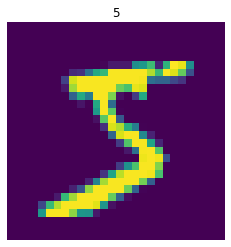

In [19]:
plt.imshow(x_train[0].astype("uint8"))
plt.title(y_train[0])
plt.axis("off")

In [3]:
train2_dir = 'C:/Users/Francisco Duran/Desktop/upc/project_notebooks/CNN-in-mobile-device/data/raw/Original/TRAIN'

In [4]:
cd "C:/Users/Francisco Duran/Desktop/upc/project_notebooks/CNN-in-mobile-device/data/raw/Original/final/train"

C:\Users\Francisco Duran\Desktop\upc\project_notebooks\CNN-in-mobile-device\data\raw\Original\final\train


In [5]:

def get_im(path):
    # Load as grayscale
    img = cv2.imread(path, 0)
    # Reduce size
    resized = cv2.resize(img, (img_width, img_height))
    return resized

def load_train():
    X_train = []
    y_train = []
    print('Read train images')
    for j in range(43):
        print('Load folder c{}'.format(j))
        if(j<10):
            path = os.path.join('..', 'train', '0000' + str(j), '*.jpg')
        else:
            path = os.path.join('..', 'train', '000' + str(j), '*.jpg')
        files = glob.glob(path)
        print(files)
        for fl in files:
            print(fl)
            img = get_im(fl)
            X_train.append(img)
            y_train.append(j)

    return X_train, y_train

In [6]:
img_width = 48
img_height = 48
x2_train, y2_train = load_train()

Read train images
Load folder c0
['..\\train\\00000\\prefix_00000_00000.jpg', '..\\train\\00000\\prefix_00000_00002.jpg', '..\\train\\00000\\prefix_00000_00003.jpg', '..\\train\\00000\\prefix_00000_00004.jpg', '..\\train\\00000\\prefix_00000_00005.jpg', '..\\train\\00000\\prefix_00000_00009.jpg', '..\\train\\00000\\prefix_00000_00010.jpg', '..\\train\\00000\\prefix_00000_00011.jpg', '..\\train\\00000\\prefix_00000_00012.jpg', '..\\train\\00000\\prefix_00000_00013.jpg', '..\\train\\00000\\prefix_00000_00014.jpg', '..\\train\\00000\\prefix_00000_00015.jpg', '..\\train\\00000\\prefix_00000_00016.jpg', '..\\train\\00000\\prefix_00000_00017.jpg', '..\\train\\00000\\prefix_00000_00018.jpg', '..\\train\\00000\\prefix_00000_00019.jpg', '..\\train\\00000\\prefix_00000_00020.jpg', '..\\train\\00000\\prefix_00000_00021.jpg', '..\\train\\00000\\prefix_00000_00024.jpg', '..\\train\\00000\\prefix_00000_00025.jpg', '..\\train\\00000\\prefix_00000_00027.jpg', '..\\train\\00000\\prefix_00000_00029.jpg'

..\train\00001\prefix_00002_00003.jpg
..\train\00001\prefix_00002_00004.jpg
..\train\00001\prefix_00002_00005.jpg
..\train\00001\prefix_00002_00006.jpg
..\train\00001\prefix_00002_00007.jpg
..\train\00001\prefix_00002_00008.jpg
..\train\00001\prefix_00002_00009.jpg
..\train\00001\prefix_00002_00010.jpg
..\train\00001\prefix_00002_00011.jpg
..\train\00001\prefix_00002_00012.jpg
..\train\00001\prefix_00002_00014.jpg
..\train\00001\prefix_00002_00015.jpg
..\train\00001\prefix_00002_00016.jpg
..\train\00001\prefix_00002_00017.jpg
..\train\00001\prefix_00002_00018.jpg
..\train\00001\prefix_00002_00020.jpg
..\train\00001\prefix_00002_00022.jpg
..\train\00001\prefix_00002_00023.jpg
..\train\00001\prefix_00002_00024.jpg
..\train\00001\prefix_00002_00027.jpg
..\train\00001\prefix_00002_00028.jpg
..\train\00001\prefix_00002_00029.jpg
..\train\00001\prefix_00003_00001.jpg
..\train\00001\prefix_00003_00002.jpg
..\train\00001\prefix_00003_00003.jpg
..\train\00001\prefix_00003_00004.jpg
..\train\000

..\train\00001\prefix_00012_00018.jpg
..\train\00001\prefix_00012_00021.jpg
..\train\00001\prefix_00012_00022.jpg
..\train\00001\prefix_00012_00024.jpg
..\train\00001\prefix_00012_00025.jpg
..\train\00001\prefix_00012_00026.jpg
..\train\00001\prefix_00012_00027.jpg
..\train\00001\prefix_00013_00000.jpg
..\train\00001\prefix_00013_00001.jpg
..\train\00001\prefix_00013_00003.jpg
..\train\00001\prefix_00013_00004.jpg
..\train\00001\prefix_00013_00005.jpg
..\train\00001\prefix_00013_00007.jpg
..\train\00001\prefix_00013_00008.jpg
..\train\00001\prefix_00013_00009.jpg
..\train\00001\prefix_00013_00010.jpg
..\train\00001\prefix_00013_00011.jpg
..\train\00001\prefix_00013_00012.jpg
..\train\00001\prefix_00013_00013.jpg
..\train\00001\prefix_00013_00014.jpg
..\train\00001\prefix_00013_00015.jpg
..\train\00001\prefix_00013_00016.jpg
..\train\00001\prefix_00013_00017.jpg
..\train\00001\prefix_00013_00018.jpg
..\train\00001\prefix_00013_00019.jpg
..\train\00001\prefix_00013_00020.jpg
..\train\000

..\train\00001\prefix_00024_00010.jpg
..\train\00001\prefix_00024_00013.jpg
..\train\00001\prefix_00024_00014.jpg
..\train\00001\prefix_00024_00015.jpg
..\train\00001\prefix_00024_00016.jpg
..\train\00001\prefix_00024_00017.jpg
..\train\00001\prefix_00024_00018.jpg
..\train\00001\prefix_00024_00019.jpg
..\train\00001\prefix_00024_00020.jpg
..\train\00001\prefix_00024_00021.jpg
..\train\00001\prefix_00024_00022.jpg
..\train\00001\prefix_00024_00023.jpg
..\train\00001\prefix_00024_00024.jpg
..\train\00001\prefix_00024_00025.jpg
..\train\00001\prefix_00024_00027.jpg
..\train\00001\prefix_00024_00028.jpg
..\train\00001\prefix_00024_00029.jpg
..\train\00001\prefix_00025_00000.jpg
..\train\00001\prefix_00025_00001.jpg
..\train\00001\prefix_00025_00002.jpg
..\train\00001\prefix_00025_00003.jpg
..\train\00001\prefix_00025_00004.jpg
..\train\00001\prefix_00025_00005.jpg
..\train\00001\prefix_00025_00007.jpg
..\train\00001\prefix_00025_00008.jpg
..\train\00001\prefix_00025_00009.jpg
..\train\000

..\train\00001\prefix_00034_00021.jpg
..\train\00001\prefix_00034_00022.jpg
..\train\00001\prefix_00034_00023.jpg
..\train\00001\prefix_00034_00024.jpg
..\train\00001\prefix_00034_00025.jpg
..\train\00001\prefix_00034_00026.jpg
..\train\00001\prefix_00034_00027.jpg
..\train\00001\prefix_00034_00028.jpg
..\train\00001\prefix_00034_00029.jpg
..\train\00001\prefix_00035_00000.jpg
..\train\00001\prefix_00035_00001.jpg
..\train\00001\prefix_00035_00002.jpg
..\train\00001\prefix_00035_00003.jpg
..\train\00001\prefix_00035_00004.jpg
..\train\00001\prefix_00035_00005.jpg
..\train\00001\prefix_00035_00006.jpg
..\train\00001\prefix_00035_00007.jpg
..\train\00001\prefix_00035_00008.jpg
..\train\00001\prefix_00035_00009.jpg
..\train\00001\prefix_00035_00010.jpg
..\train\00001\prefix_00035_00011.jpg
..\train\00001\prefix_00035_00012.jpg
..\train\00001\prefix_00035_00013.jpg
..\train\00001\prefix_00035_00014.jpg
..\train\00001\prefix_00035_00015.jpg
..\train\00001\prefix_00035_00016.jpg
..\train\000

..\train\00001\prefix_00046_00011.jpg
..\train\00001\prefix_00046_00012.jpg
..\train\00001\prefix_00046_00014.jpg
..\train\00001\prefix_00046_00015.jpg
..\train\00001\prefix_00046_00017.jpg
..\train\00001\prefix_00046_00018.jpg
..\train\00001\prefix_00046_00019.jpg
..\train\00001\prefix_00046_00020.jpg
..\train\00001\prefix_00046_00021.jpg
..\train\00001\prefix_00046_00022.jpg
..\train\00001\prefix_00046_00023.jpg
..\train\00001\prefix_00046_00024.jpg
..\train\00001\prefix_00046_00025.jpg
..\train\00001\prefix_00046_00026.jpg
..\train\00001\prefix_00046_00029.jpg
..\train\00001\prefix_00047_00000.jpg
..\train\00001\prefix_00047_00001.jpg
..\train\00001\prefix_00047_00002.jpg
..\train\00001\prefix_00047_00003.jpg
..\train\00001\prefix_00047_00004.jpg
..\train\00001\prefix_00047_00006.jpg
..\train\00001\prefix_00047_00007.jpg
..\train\00001\prefix_00047_00008.jpg
..\train\00001\prefix_00047_00009.jpg
..\train\00001\prefix_00047_00010.jpg
..\train\00001\prefix_00047_00011.jpg
..\train\000

..\train\00001\prefix_00056_00003.jpg
..\train\00001\prefix_00056_00004.jpg
..\train\00001\prefix_00056_00005.jpg
..\train\00001\prefix_00056_00006.jpg
..\train\00001\prefix_00056_00007.jpg
..\train\00001\prefix_00056_00008.jpg
..\train\00001\prefix_00056_00009.jpg
..\train\00001\prefix_00056_00010.jpg
..\train\00001\prefix_00056_00011.jpg
..\train\00001\prefix_00056_00012.jpg
..\train\00001\prefix_00056_00013.jpg
..\train\00001\prefix_00056_00014.jpg
..\train\00001\prefix_00056_00015.jpg
..\train\00001\prefix_00056_00016.jpg
..\train\00001\prefix_00056_00017.jpg
..\train\00001\prefix_00056_00019.jpg
..\train\00001\prefix_00056_00020.jpg
..\train\00001\prefix_00056_00021.jpg
..\train\00001\prefix_00056_00022.jpg
..\train\00001\prefix_00056_00023.jpg
..\train\00001\prefix_00056_00024.jpg
..\train\00001\prefix_00056_00025.jpg
..\train\00001\prefix_00056_00026.jpg
..\train\00001\prefix_00056_00028.jpg
..\train\00001\prefix_00057_00000.jpg
..\train\00001\prefix_00057_00001.jpg
..\train\000

..\train\00001\prefix_00066_00020.jpg
..\train\00001\prefix_00066_00022.jpg
..\train\00001\prefix_00066_00023.jpg
..\train\00001\prefix_00066_00024.jpg
..\train\00001\prefix_00066_00025.jpg
..\train\00001\prefix_00066_00026.jpg
..\train\00001\prefix_00066_00027.jpg
..\train\00001\prefix_00066_00028.jpg
..\train\00001\prefix_00066_00029.jpg
..\train\00001\prefix_00067_00000.jpg
..\train\00001\prefix_00067_00002.jpg
..\train\00001\prefix_00067_00003.jpg
..\train\00001\prefix_00067_00004.jpg
..\train\00001\prefix_00067_00007.jpg
..\train\00001\prefix_00067_00008.jpg
..\train\00001\prefix_00067_00009.jpg
..\train\00001\prefix_00067_00010.jpg
..\train\00001\prefix_00067_00012.jpg
..\train\00001\prefix_00067_00013.jpg
..\train\00001\prefix_00067_00014.jpg
..\train\00001\prefix_00067_00015.jpg
..\train\00001\prefix_00067_00016.jpg
..\train\00001\prefix_00067_00018.jpg
..\train\00001\prefix_00067_00019.jpg
..\train\00001\prefix_00067_00020.jpg
..\train\00001\prefix_00067_00021.jpg
..\train\000

..\train\00002\prefix_00003_00006.jpg
..\train\00002\prefix_00003_00007.jpg
..\train\00002\prefix_00003_00008.jpg
..\train\00002\prefix_00003_00009.jpg
..\train\00002\prefix_00003_00010.jpg
..\train\00002\prefix_00003_00011.jpg
..\train\00002\prefix_00003_00015.jpg
..\train\00002\prefix_00003_00016.jpg
..\train\00002\prefix_00003_00017.jpg
..\train\00002\prefix_00003_00019.jpg
..\train\00002\prefix_00003_00020.jpg
..\train\00002\prefix_00003_00021.jpg
..\train\00002\prefix_00003_00022.jpg
..\train\00002\prefix_00003_00023.jpg
..\train\00002\prefix_00003_00024.jpg
..\train\00002\prefix_00003_00025.jpg
..\train\00002\prefix_00003_00028.jpg
..\train\00002\prefix_00004_00001.jpg
..\train\00002\prefix_00004_00003.jpg
..\train\00002\prefix_00004_00005.jpg
..\train\00002\prefix_00004_00006.jpg
..\train\00002\prefix_00004_00007.jpg
..\train\00002\prefix_00004_00009.jpg
..\train\00002\prefix_00004_00012.jpg
..\train\00002\prefix_00004_00013.jpg
..\train\00002\prefix_00004_00014.jpg
..\train\000

..\train\00002\prefix_00015_00012.jpg
..\train\00002\prefix_00015_00013.jpg
..\train\00002\prefix_00015_00014.jpg
..\train\00002\prefix_00015_00015.jpg
..\train\00002\prefix_00015_00016.jpg
..\train\00002\prefix_00015_00017.jpg
..\train\00002\prefix_00015_00018.jpg
..\train\00002\prefix_00015_00020.jpg
..\train\00002\prefix_00015_00021.jpg
..\train\00002\prefix_00015_00022.jpg
..\train\00002\prefix_00015_00023.jpg
..\train\00002\prefix_00015_00024.jpg
..\train\00002\prefix_00015_00025.jpg
..\train\00002\prefix_00015_00026.jpg
..\train\00002\prefix_00015_00027.jpg
..\train\00002\prefix_00015_00028.jpg
..\train\00002\prefix_00015_00029.jpg
..\train\00002\prefix_00016_00000.jpg
..\train\00002\prefix_00016_00002.jpg
..\train\00002\prefix_00016_00003.jpg
..\train\00002\prefix_00016_00005.jpg
..\train\00002\prefix_00016_00006.jpg
..\train\00002\prefix_00016_00007.jpg
..\train\00002\prefix_00016_00009.jpg
..\train\00002\prefix_00016_00010.jpg
..\train\00002\prefix_00016_00011.jpg
..\train\000

..\train\00002\prefix_00026_00017.jpg
..\train\00002\prefix_00026_00018.jpg
..\train\00002\prefix_00026_00020.jpg
..\train\00002\prefix_00026_00021.jpg
..\train\00002\prefix_00026_00022.jpg
..\train\00002\prefix_00026_00023.jpg
..\train\00002\prefix_00026_00024.jpg
..\train\00002\prefix_00026_00025.jpg
..\train\00002\prefix_00026_00026.jpg
..\train\00002\prefix_00026_00027.jpg
..\train\00002\prefix_00026_00028.jpg
..\train\00002\prefix_00026_00029.jpg
..\train\00002\prefix_00027_00001.jpg
..\train\00002\prefix_00027_00002.jpg
..\train\00002\prefix_00027_00003.jpg
..\train\00002\prefix_00027_00005.jpg
..\train\00002\prefix_00027_00006.jpg
..\train\00002\prefix_00027_00007.jpg
..\train\00002\prefix_00027_00008.jpg
..\train\00002\prefix_00027_00009.jpg
..\train\00002\prefix_00027_00010.jpg
..\train\00002\prefix_00027_00012.jpg
..\train\00002\prefix_00027_00014.jpg
..\train\00002\prefix_00027_00015.jpg
..\train\00002\prefix_00027_00017.jpg
..\train\00002\prefix_00027_00018.jpg
..\train\000

..\train\00002\prefix_00038_00002.jpg
..\train\00002\prefix_00038_00003.jpg
..\train\00002\prefix_00038_00004.jpg
..\train\00002\prefix_00038_00005.jpg
..\train\00002\prefix_00038_00007.jpg
..\train\00002\prefix_00038_00009.jpg
..\train\00002\prefix_00038_00010.jpg
..\train\00002\prefix_00038_00011.jpg
..\train\00002\prefix_00038_00012.jpg
..\train\00002\prefix_00038_00014.jpg
..\train\00002\prefix_00038_00015.jpg
..\train\00002\prefix_00038_00016.jpg
..\train\00002\prefix_00038_00018.jpg
..\train\00002\prefix_00038_00019.jpg
..\train\00002\prefix_00038_00020.jpg
..\train\00002\prefix_00038_00021.jpg
..\train\00002\prefix_00038_00022.jpg
..\train\00002\prefix_00038_00023.jpg
..\train\00002\prefix_00038_00024.jpg
..\train\00002\prefix_00038_00025.jpg
..\train\00002\prefix_00038_00027.jpg
..\train\00002\prefix_00038_00028.jpg
..\train\00002\prefix_00038_00029.jpg
..\train\00002\prefix_00039_00000.jpg
..\train\00002\prefix_00039_00001.jpg
..\train\00002\prefix_00039_00002.jpg
..\train\000

..\train\00002\prefix_00049_00013.jpg
..\train\00002\prefix_00049_00014.jpg
..\train\00002\prefix_00049_00015.jpg
..\train\00002\prefix_00049_00017.jpg
..\train\00002\prefix_00049_00018.jpg
..\train\00002\prefix_00049_00019.jpg
..\train\00002\prefix_00049_00020.jpg
..\train\00002\prefix_00049_00021.jpg
..\train\00002\prefix_00049_00022.jpg
..\train\00002\prefix_00049_00023.jpg
..\train\00002\prefix_00049_00025.jpg
..\train\00002\prefix_00049_00027.jpg
..\train\00002\prefix_00049_00028.jpg
..\train\00002\prefix_00049_00029.jpg
..\train\00002\prefix_00050_00000.jpg
..\train\00002\prefix_00050_00001.jpg
..\train\00002\prefix_00050_00002.jpg
..\train\00002\prefix_00050_00003.jpg
..\train\00002\prefix_00050_00004.jpg
..\train\00002\prefix_00050_00005.jpg
..\train\00002\prefix_00050_00007.jpg
..\train\00002\prefix_00050_00009.jpg
..\train\00002\prefix_00050_00010.jpg
..\train\00002\prefix_00050_00011.jpg
..\train\00002\prefix_00050_00012.jpg
..\train\00002\prefix_00050_00013.jpg
..\train\000

..\train\00002\prefix_00061_00023.jpg
..\train\00002\prefix_00061_00025.jpg
..\train\00002\prefix_00061_00026.jpg
..\train\00002\prefix_00062_00000.jpg
..\train\00002\prefix_00062_00001.jpg
..\train\00002\prefix_00062_00002.jpg
..\train\00002\prefix_00062_00003.jpg
..\train\00002\prefix_00062_00004.jpg
..\train\00002\prefix_00062_00005.jpg
..\train\00002\prefix_00062_00006.jpg
..\train\00002\prefix_00062_00007.jpg
..\train\00002\prefix_00062_00008.jpg
..\train\00002\prefix_00062_00009.jpg
..\train\00002\prefix_00062_00010.jpg
..\train\00002\prefix_00062_00011.jpg
..\train\00002\prefix_00062_00012.jpg
..\train\00002\prefix_00062_00013.jpg
..\train\00002\prefix_00062_00014.jpg
..\train\00002\prefix_00062_00015.jpg
..\train\00002\prefix_00062_00016.jpg
..\train\00002\prefix_00062_00017.jpg
..\train\00002\prefix_00062_00018.jpg
..\train\00002\prefix_00062_00020.jpg
..\train\00002\prefix_00062_00023.jpg
..\train\00002\prefix_00062_00024.jpg
..\train\00002\prefix_00062_00025.jpg
..\train\000

..\train\00002\prefix_00074_00001.jpg
..\train\00002\prefix_00074_00002.jpg
..\train\00002\prefix_00074_00005.jpg
..\train\00002\prefix_00074_00006.jpg
..\train\00002\prefix_00074_00007.jpg
..\train\00002\prefix_00074_00008.jpg
..\train\00002\prefix_00074_00009.jpg
..\train\00002\prefix_00074_00011.jpg
..\train\00002\prefix_00074_00015.jpg
..\train\00002\prefix_00074_00016.jpg
..\train\00002\prefix_00074_00017.jpg
..\train\00002\prefix_00074_00018.jpg
..\train\00002\prefix_00074_00019.jpg
..\train\00002\prefix_00074_00021.jpg
..\train\00002\prefix_00074_00022.jpg
..\train\00002\prefix_00074_00023.jpg
..\train\00002\prefix_00074_00025.jpg
..\train\00002\prefix_00074_00026.jpg
..\train\00002\prefix_00074_00027.jpg
Load folder c3
['..\\train\\00003\\prefix_00000_00000.jpg', '..\\train\\00003\\prefix_00000_00002.jpg', '..\\train\\00003\\prefix_00000_00003.jpg', '..\\train\\00003\\prefix_00000_00005.jpg', '..\\train\\00003\\prefix_00000_00007.jpg', '..\\train\\00003\\prefix_00000_00008.jpg'

..\train\00003\prefix_00009_00028.jpg
..\train\00003\prefix_00009_00029.jpg
..\train\00003\prefix_00010_00000.jpg
..\train\00003\prefix_00010_00001.jpg
..\train\00003\prefix_00010_00002.jpg
..\train\00003\prefix_00010_00003.jpg
..\train\00003\prefix_00010_00004.jpg
..\train\00003\prefix_00010_00005.jpg
..\train\00003\prefix_00010_00006.jpg
..\train\00003\prefix_00010_00007.jpg
..\train\00003\prefix_00010_00008.jpg
..\train\00003\prefix_00010_00009.jpg
..\train\00003\prefix_00010_00010.jpg
..\train\00003\prefix_00010_00011.jpg
..\train\00003\prefix_00010_00012.jpg
..\train\00003\prefix_00010_00014.jpg
..\train\00003\prefix_00010_00015.jpg
..\train\00003\prefix_00010_00016.jpg
..\train\00003\prefix_00010_00019.jpg
..\train\00003\prefix_00010_00020.jpg
..\train\00003\prefix_00010_00021.jpg
..\train\00003\prefix_00010_00022.jpg
..\train\00003\prefix_00010_00024.jpg
..\train\00003\prefix_00010_00025.jpg
..\train\00003\prefix_00010_00028.jpg
..\train\00003\prefix_00010_00029.jpg
..\train\000

..\train\00003\prefix_00021_00025.jpg
..\train\00003\prefix_00021_00026.jpg
..\train\00003\prefix_00021_00027.jpg
..\train\00003\prefix_00021_00028.jpg
..\train\00003\prefix_00021_00029.jpg
..\train\00003\prefix_00022_00000.jpg
..\train\00003\prefix_00022_00001.jpg
..\train\00003\prefix_00022_00002.jpg
..\train\00003\prefix_00022_00005.jpg
..\train\00003\prefix_00022_00006.jpg
..\train\00003\prefix_00022_00007.jpg
..\train\00003\prefix_00022_00008.jpg
..\train\00003\prefix_00022_00009.jpg
..\train\00003\prefix_00022_00010.jpg
..\train\00003\prefix_00022_00011.jpg
..\train\00003\prefix_00022_00012.jpg
..\train\00003\prefix_00022_00013.jpg
..\train\00003\prefix_00022_00014.jpg
..\train\00003\prefix_00022_00015.jpg
..\train\00003\prefix_00022_00017.jpg
..\train\00003\prefix_00022_00018.jpg
..\train\00003\prefix_00022_00019.jpg
..\train\00003\prefix_00022_00020.jpg
..\train\00003\prefix_00022_00021.jpg
..\train\00003\prefix_00022_00022.jpg
..\train\00003\prefix_00022_00023.jpg
..\train\000

..\train\00003\prefix_00033_00009.jpg
..\train\00003\prefix_00033_00011.jpg
..\train\00003\prefix_00033_00012.jpg
..\train\00003\prefix_00033_00013.jpg
..\train\00003\prefix_00033_00014.jpg
..\train\00003\prefix_00033_00015.jpg
..\train\00003\prefix_00033_00016.jpg
..\train\00003\prefix_00033_00017.jpg
..\train\00003\prefix_00033_00018.jpg
..\train\00003\prefix_00033_00019.jpg
..\train\00003\prefix_00033_00021.jpg
..\train\00003\prefix_00033_00022.jpg
..\train\00003\prefix_00033_00023.jpg
..\train\00003\prefix_00033_00024.jpg
..\train\00003\prefix_00033_00025.jpg
..\train\00003\prefix_00033_00026.jpg
..\train\00003\prefix_00033_00027.jpg
..\train\00003\prefix_00033_00028.jpg
..\train\00003\prefix_00033_00029.jpg
..\train\00003\prefix_00034_00000.jpg
..\train\00003\prefix_00034_00001.jpg
..\train\00003\prefix_00034_00003.jpg
..\train\00003\prefix_00034_00004.jpg
..\train\00003\prefix_00034_00006.jpg
..\train\00003\prefix_00034_00007.jpg
..\train\00003\prefix_00034_00008.jpg
..\train\000

..\train\00003\prefix_00044_00027.jpg
..\train\00003\prefix_00044_00028.jpg
..\train\00003\prefix_00044_00029.jpg
..\train\00003\prefix_00045_00000.jpg
..\train\00003\prefix_00045_00001.jpg
..\train\00003\prefix_00045_00003.jpg
..\train\00003\prefix_00045_00004.jpg
..\train\00003\prefix_00045_00005.jpg
..\train\00003\prefix_00045_00006.jpg
..\train\00003\prefix_00045_00007.jpg
..\train\00003\prefix_00045_00009.jpg
..\train\00003\prefix_00045_00010.jpg
..\train\00003\prefix_00045_00012.jpg
..\train\00003\prefix_00045_00013.jpg
..\train\00003\prefix_00045_00014.jpg
..\train\00003\prefix_00045_00015.jpg
..\train\00003\prefix_00045_00016.jpg
..\train\00003\prefix_00045_00017.jpg
..\train\00003\prefix_00045_00020.jpg
..\train\00003\prefix_00045_00021.jpg
..\train\00003\prefix_00045_00022.jpg
..\train\00003\prefix_00045_00023.jpg
..\train\00003\prefix_00045_00024.jpg
..\train\00003\prefix_00045_00027.jpg
..\train\00003\prefix_00045_00028.jpg
..\train\00003\prefix_00045_00029.jpg
..\train\000

..\train\00004\prefix_00010_00004.jpg
..\train\00004\prefix_00010_00005.jpg
..\train\00004\prefix_00010_00006.jpg
..\train\00004\prefix_00010_00007.jpg
..\train\00004\prefix_00010_00008.jpg
..\train\00004\prefix_00010_00009.jpg
..\train\00004\prefix_00010_00010.jpg
..\train\00004\prefix_00010_00011.jpg
..\train\00004\prefix_00010_00012.jpg
..\train\00004\prefix_00010_00014.jpg
..\train\00004\prefix_00010_00015.jpg
..\train\00004\prefix_00010_00016.jpg
..\train\00004\prefix_00010_00019.jpg
..\train\00004\prefix_00010_00020.jpg
..\train\00004\prefix_00010_00021.jpg
..\train\00004\prefix_00010_00024.jpg
..\train\00004\prefix_00010_00025.jpg
..\train\00004\prefix_00010_00028.jpg
..\train\00004\prefix_00010_00029.jpg
..\train\00004\prefix_00011_00001.jpg
..\train\00004\prefix_00011_00002.jpg
..\train\00004\prefix_00011_00005.jpg
..\train\00004\prefix_00011_00006.jpg
..\train\00004\prefix_00011_00009.jpg
..\train\00004\prefix_00011_00011.jpg
..\train\00004\prefix_00011_00012.jpg
..\train\000

..\train\00004\prefix_00022_00019.jpg
..\train\00004\prefix_00022_00020.jpg
..\train\00004\prefix_00022_00021.jpg
..\train\00004\prefix_00022_00022.jpg
..\train\00004\prefix_00022_00023.jpg
..\train\00004\prefix_00022_00024.jpg
..\train\00004\prefix_00022_00025.jpg
..\train\00004\prefix_00022_00026.jpg
..\train\00004\prefix_00022_00027.jpg
..\train\00004\prefix_00022_00028.jpg
..\train\00004\prefix_00023_00000.jpg
..\train\00004\prefix_00023_00001.jpg
..\train\00004\prefix_00023_00003.jpg
..\train\00004\prefix_00023_00005.jpg
..\train\00004\prefix_00023_00007.jpg
..\train\00004\prefix_00023_00008.jpg
..\train\00004\prefix_00023_00009.jpg
..\train\00004\prefix_00023_00010.jpg
..\train\00004\prefix_00023_00011.jpg
..\train\00004\prefix_00023_00012.jpg
..\train\00004\prefix_00023_00013.jpg
..\train\00004\prefix_00023_00015.jpg
..\train\00004\prefix_00023_00016.jpg
..\train\00004\prefix_00023_00017.jpg
..\train\00004\prefix_00023_00018.jpg
..\train\00004\prefix_00023_00019.jpg
..\train\000

..\train\00004\prefix_00035_00004.jpg
..\train\00004\prefix_00035_00005.jpg
..\train\00004\prefix_00035_00006.jpg
..\train\00004\prefix_00035_00007.jpg
..\train\00004\prefix_00035_00008.jpg
..\train\00004\prefix_00035_00010.jpg
..\train\00004\prefix_00035_00011.jpg
..\train\00004\prefix_00035_00012.jpg
..\train\00004\prefix_00035_00013.jpg
..\train\00004\prefix_00035_00014.jpg
..\train\00004\prefix_00035_00015.jpg
..\train\00004\prefix_00035_00016.jpg
..\train\00004\prefix_00035_00017.jpg
..\train\00004\prefix_00035_00018.jpg
..\train\00004\prefix_00035_00019.jpg
..\train\00004\prefix_00035_00020.jpg
..\train\00004\prefix_00035_00021.jpg
..\train\00004\prefix_00035_00022.jpg
..\train\00004\prefix_00035_00023.jpg
..\train\00004\prefix_00035_00024.jpg
..\train\00004\prefix_00035_00025.jpg
..\train\00004\prefix_00035_00026.jpg
..\train\00004\prefix_00035_00027.jpg
..\train\00004\prefix_00035_00028.jpg
..\train\00004\prefix_00035_00029.jpg
..\train\00004\prefix_00036_00001.jpg
..\train\000

..\train\00004\prefix_00045_00024.jpg
..\train\00004\prefix_00045_00026.jpg
..\train\00004\prefix_00045_00027.jpg
..\train\00004\prefix_00045_00028.jpg
..\train\00004\prefix_00046_00000.jpg
..\train\00004\prefix_00046_00001.jpg
..\train\00004\prefix_00046_00002.jpg
..\train\00004\prefix_00046_00003.jpg
..\train\00004\prefix_00046_00004.jpg
..\train\00004\prefix_00046_00006.jpg
..\train\00004\prefix_00046_00007.jpg
..\train\00004\prefix_00046_00008.jpg
..\train\00004\prefix_00046_00009.jpg
..\train\00004\prefix_00046_00010.jpg
..\train\00004\prefix_00046_00011.jpg
..\train\00004\prefix_00046_00012.jpg
..\train\00004\prefix_00046_00014.jpg
..\train\00004\prefix_00046_00015.jpg
..\train\00004\prefix_00046_00017.jpg
..\train\00004\prefix_00046_00018.jpg
..\train\00004\prefix_00046_00020.jpg
..\train\00004\prefix_00046_00021.jpg
..\train\00004\prefix_00046_00023.jpg
..\train\00004\prefix_00046_00024.jpg
..\train\00004\prefix_00046_00025.jpg
..\train\00004\prefix_00046_00026.jpg
..\train\000

..\train\00004\prefix_00056_00019.jpg
..\train\00004\prefix_00056_00020.jpg
..\train\00004\prefix_00056_00021.jpg
..\train\00004\prefix_00056_00022.jpg
..\train\00004\prefix_00056_00024.jpg
..\train\00004\prefix_00056_00025.jpg
..\train\00004\prefix_00056_00026.jpg
..\train\00004\prefix_00056_00027.jpg
..\train\00004\prefix_00056_00029.jpg
..\train\00004\prefix_00057_00000.jpg
..\train\00004\prefix_00057_00001.jpg
..\train\00004\prefix_00057_00002.jpg
..\train\00004\prefix_00057_00003.jpg
..\train\00004\prefix_00057_00004.jpg
..\train\00004\prefix_00057_00005.jpg
..\train\00004\prefix_00057_00006.jpg
..\train\00004\prefix_00057_00007.jpg
..\train\00004\prefix_00057_00008.jpg
..\train\00004\prefix_00057_00009.jpg
..\train\00004\prefix_00057_00010.jpg
..\train\00004\prefix_00057_00012.jpg
..\train\00004\prefix_00057_00014.jpg
..\train\00004\prefix_00057_00015.jpg
..\train\00004\prefix_00057_00017.jpg
..\train\00004\prefix_00057_00018.jpg
..\train\00004\prefix_00057_00019.jpg
..\train\000

..\train\00005\prefix_00000_00026.jpg
..\train\00005\prefix_00000_00027.jpg
..\train\00005\prefix_00000_00028.jpg
..\train\00005\prefix_00000_00029.jpg
..\train\00005\prefix_00001_00001.jpg
..\train\00005\prefix_00001_00002.jpg
..\train\00005\prefix_00001_00003.jpg
..\train\00005\prefix_00001_00004.jpg
..\train\00005\prefix_00001_00005.jpg
..\train\00005\prefix_00001_00006.jpg
..\train\00005\prefix_00001_00007.jpg
..\train\00005\prefix_00001_00008.jpg
..\train\00005\prefix_00001_00010.jpg
..\train\00005\prefix_00001_00011.jpg
..\train\00005\prefix_00001_00012.jpg
..\train\00005\prefix_00001_00014.jpg
..\train\00005\prefix_00001_00015.jpg
..\train\00005\prefix_00001_00016.jpg
..\train\00005\prefix_00001_00017.jpg
..\train\00005\prefix_00001_00018.jpg
..\train\00005\prefix_00001_00019.jpg
..\train\00005\prefix_00001_00020.jpg
..\train\00005\prefix_00001_00022.jpg
..\train\00005\prefix_00001_00023.jpg
..\train\00005\prefix_00001_00025.jpg
..\train\00005\prefix_00001_00026.jpg
..\train\000

..\train\00005\prefix_00012_00007.jpg
..\train\00005\prefix_00012_00008.jpg
..\train\00005\prefix_00012_00009.jpg
..\train\00005\prefix_00012_00010.jpg
..\train\00005\prefix_00012_00011.jpg
..\train\00005\prefix_00012_00012.jpg
..\train\00005\prefix_00012_00013.jpg
..\train\00005\prefix_00012_00014.jpg
..\train\00005\prefix_00012_00016.jpg
..\train\00005\prefix_00012_00017.jpg
..\train\00005\prefix_00012_00018.jpg
..\train\00005\prefix_00012_00019.jpg
..\train\00005\prefix_00012_00020.jpg
..\train\00005\prefix_00012_00021.jpg
..\train\00005\prefix_00012_00022.jpg
..\train\00005\prefix_00012_00023.jpg
..\train\00005\prefix_00012_00024.jpg
..\train\00005\prefix_00012_00025.jpg
..\train\00005\prefix_00012_00026.jpg
..\train\00005\prefix_00012_00027.jpg
..\train\00005\prefix_00013_00000.jpg
..\train\00005\prefix_00013_00001.jpg
..\train\00005\prefix_00013_00004.jpg
..\train\00005\prefix_00013_00005.jpg
..\train\00005\prefix_00013_00006.jpg
..\train\00005\prefix_00013_00007.jpg
..\train\000

..\train\00005\prefix_00022_00025.jpg
..\train\00005\prefix_00022_00026.jpg
..\train\00005\prefix_00022_00027.jpg
..\train\00005\prefix_00022_00028.jpg
..\train\00005\prefix_00023_00000.jpg
..\train\00005\prefix_00023_00001.jpg
..\train\00005\prefix_00023_00003.jpg
..\train\00005\prefix_00023_00005.jpg
..\train\00005\prefix_00023_00007.jpg
..\train\00005\prefix_00023_00008.jpg
..\train\00005\prefix_00023_00009.jpg
..\train\00005\prefix_00023_00010.jpg
..\train\00005\prefix_00023_00011.jpg
..\train\00005\prefix_00023_00012.jpg
..\train\00005\prefix_00023_00013.jpg
..\train\00005\prefix_00023_00015.jpg
..\train\00005\prefix_00023_00016.jpg
..\train\00005\prefix_00023_00017.jpg
..\train\00005\prefix_00023_00018.jpg
..\train\00005\prefix_00023_00019.jpg
..\train\00005\prefix_00023_00020.jpg
..\train\00005\prefix_00023_00021.jpg
..\train\00005\prefix_00023_00022.jpg
..\train\00005\prefix_00023_00023.jpg
..\train\00005\prefix_00023_00024.jpg
..\train\00005\prefix_00023_00025.jpg
..\train\000

..\train\00005\prefix_00034_00003.jpg
..\train\00005\prefix_00034_00004.jpg
..\train\00005\prefix_00034_00006.jpg
..\train\00005\prefix_00034_00007.jpg
..\train\00005\prefix_00034_00008.jpg
..\train\00005\prefix_00034_00009.jpg
..\train\00005\prefix_00034_00010.jpg
..\train\00005\prefix_00034_00011.jpg
..\train\00005\prefix_00034_00012.jpg
..\train\00005\prefix_00034_00013.jpg
..\train\00005\prefix_00034_00015.jpg
..\train\00005\prefix_00034_00016.jpg
..\train\00005\prefix_00034_00017.jpg
..\train\00005\prefix_00034_00018.jpg
..\train\00005\prefix_00034_00020.jpg
..\train\00005\prefix_00034_00021.jpg
..\train\00005\prefix_00034_00022.jpg
..\train\00005\prefix_00034_00024.jpg
..\train\00005\prefix_00034_00025.jpg
..\train\00005\prefix_00034_00026.jpg
..\train\00005\prefix_00034_00027.jpg
..\train\00005\prefix_00034_00028.jpg
..\train\00005\prefix_00034_00029.jpg
..\train\00005\prefix_00035_00000.jpg
..\train\00005\prefix_00035_00001.jpg
..\train\00005\prefix_00035_00003.jpg
..\train\000

..\train\00005\prefix_00045_00014.jpg
..\train\00005\prefix_00045_00015.jpg
..\train\00005\prefix_00045_00016.jpg
..\train\00005\prefix_00045_00017.jpg
..\train\00005\prefix_00045_00018.jpg
..\train\00005\prefix_00045_00019.jpg
..\train\00005\prefix_00045_00021.jpg
..\train\00005\prefix_00045_00023.jpg
..\train\00005\prefix_00045_00024.jpg
..\train\00005\prefix_00045_00026.jpg
..\train\00005\prefix_00045_00027.jpg
..\train\00005\prefix_00045_00028.jpg
..\train\00005\prefix_00046_00000.jpg
..\train\00005\prefix_00046_00001.jpg
..\train\00005\prefix_00046_00002.jpg
..\train\00005\prefix_00046_00003.jpg
..\train\00005\prefix_00046_00004.jpg
..\train\00005\prefix_00046_00006.jpg
..\train\00005\prefix_00046_00007.jpg
..\train\00005\prefix_00046_00008.jpg
..\train\00005\prefix_00046_00009.jpg
..\train\00005\prefix_00046_00010.jpg
..\train\00005\prefix_00046_00011.jpg
..\train\00005\prefix_00046_00012.jpg
..\train\00005\prefix_00046_00014.jpg
..\train\00005\prefix_00046_00015.jpg
..\train\000

..\train\00006\prefix_00000_00025.jpg
..\train\00006\prefix_00000_00026.jpg
..\train\00006\prefix_00000_00027.jpg
..\train\00006\prefix_00000_00028.jpg
..\train\00006\prefix_00000_00029.jpg
..\train\00006\prefix_00001_00000.jpg
..\train\00006\prefix_00001_00001.jpg
..\train\00006\prefix_00001_00002.jpg
..\train\00006\prefix_00001_00003.jpg
..\train\00006\prefix_00001_00004.jpg
..\train\00006\prefix_00001_00006.jpg
..\train\00006\prefix_00001_00007.jpg
..\train\00006\prefix_00001_00008.jpg
..\train\00006\prefix_00001_00009.jpg
..\train\00006\prefix_00001_00011.jpg
..\train\00006\prefix_00001_00012.jpg
..\train\00006\prefix_00001_00013.jpg
..\train\00006\prefix_00001_00015.jpg
..\train\00006\prefix_00001_00016.jpg
..\train\00006\prefix_00001_00018.jpg
..\train\00006\prefix_00001_00020.jpg
..\train\00006\prefix_00001_00023.jpg
..\train\00006\prefix_00001_00024.jpg
..\train\00006\prefix_00001_00025.jpg
..\train\00006\prefix_00001_00026.jpg
..\train\00006\prefix_00001_00028.jpg
..\train\000

..\train\00006\prefix_00011_00010.jpg
..\train\00006\prefix_00011_00011.jpg
..\train\00006\prefix_00011_00012.jpg
..\train\00006\prefix_00011_00013.jpg
..\train\00006\prefix_00011_00014.jpg
..\train\00006\prefix_00011_00015.jpg
..\train\00006\prefix_00011_00016.jpg
..\train\00006\prefix_00011_00018.jpg
..\train\00006\prefix_00011_00019.jpg
..\train\00006\prefix_00011_00020.jpg
..\train\00006\prefix_00011_00021.jpg
..\train\00006\prefix_00011_00022.jpg
..\train\00006\prefix_00011_00023.jpg
..\train\00006\prefix_00011_00024.jpg
..\train\00006\prefix_00011_00025.jpg
..\train\00006\prefix_00011_00026.jpg
..\train\00006\prefix_00011_00027.jpg
..\train\00006\prefix_00011_00029.jpg
..\train\00006\prefix_00012_00001.jpg
..\train\00006\prefix_00012_00003.jpg
..\train\00006\prefix_00012_00004.jpg
..\train\00006\prefix_00012_00005.jpg
..\train\00006\prefix_00012_00006.jpg
..\train\00006\prefix_00012_00008.jpg
..\train\00006\prefix_00012_00009.jpg
..\train\00006\prefix_00012_00010.jpg
..\train\000

..\train\00007\prefix_00008_00001.jpg
..\train\00007\prefix_00008_00002.jpg
..\train\00007\prefix_00008_00003.jpg
..\train\00007\prefix_00008_00004.jpg
..\train\00007\prefix_00008_00005.jpg
..\train\00007\prefix_00008_00006.jpg
..\train\00007\prefix_00008_00008.jpg
..\train\00007\prefix_00008_00009.jpg
..\train\00007\prefix_00008_00010.jpg
..\train\00007\prefix_00008_00011.jpg
..\train\00007\prefix_00008_00012.jpg
..\train\00007\prefix_00008_00013.jpg
..\train\00007\prefix_00008_00014.jpg
..\train\00007\prefix_00008_00016.jpg
..\train\00007\prefix_00008_00018.jpg
..\train\00007\prefix_00008_00019.jpg
..\train\00007\prefix_00008_00020.jpg
..\train\00007\prefix_00008_00021.jpg
..\train\00007\prefix_00008_00023.jpg
..\train\00007\prefix_00008_00024.jpg
..\train\00007\prefix_00008_00025.jpg
..\train\00007\prefix_00008_00026.jpg
..\train\00007\prefix_00008_00027.jpg
..\train\00007\prefix_00008_00028.jpg
..\train\00007\prefix_00008_00029.jpg
..\train\00007\prefix_00009_00001.jpg
..\train\000

..\train\00007\prefix_00019_00005.jpg
..\train\00007\prefix_00019_00006.jpg
..\train\00007\prefix_00019_00007.jpg
..\train\00007\prefix_00019_00008.jpg
..\train\00007\prefix_00019_00009.jpg
..\train\00007\prefix_00019_00010.jpg
..\train\00007\prefix_00019_00011.jpg
..\train\00007\prefix_00019_00012.jpg
..\train\00007\prefix_00019_00013.jpg
..\train\00007\prefix_00019_00015.jpg
..\train\00007\prefix_00019_00016.jpg
..\train\00007\prefix_00019_00017.jpg
..\train\00007\prefix_00019_00018.jpg
..\train\00007\prefix_00019_00019.jpg
..\train\00007\prefix_00019_00020.jpg
..\train\00007\prefix_00019_00021.jpg
..\train\00007\prefix_00019_00023.jpg
..\train\00007\prefix_00019_00024.jpg
..\train\00007\prefix_00019_00025.jpg
..\train\00007\prefix_00019_00026.jpg
..\train\00007\prefix_00019_00027.jpg
..\train\00007\prefix_00019_00028.jpg
..\train\00007\prefix_00019_00029.jpg
..\train\00007\prefix_00020_00002.jpg
..\train\00007\prefix_00020_00003.jpg
..\train\00007\prefix_00020_00004.jpg
..\train\000

..\train\00007\prefix_00029_00021.jpg
..\train\00007\prefix_00029_00022.jpg
..\train\00007\prefix_00029_00023.jpg
..\train\00007\prefix_00029_00024.jpg
..\train\00007\prefix_00029_00025.jpg
..\train\00007\prefix_00029_00026.jpg
..\train\00007\prefix_00029_00028.jpg
..\train\00007\prefix_00029_00029.jpg
..\train\00007\prefix_00030_00000.jpg
..\train\00007\prefix_00030_00001.jpg
..\train\00007\prefix_00030_00002.jpg
..\train\00007\prefix_00030_00003.jpg
..\train\00007\prefix_00030_00004.jpg
..\train\00007\prefix_00030_00005.jpg
..\train\00007\prefix_00030_00006.jpg
..\train\00007\prefix_00030_00008.jpg
..\train\00007\prefix_00030_00009.jpg
..\train\00007\prefix_00030_00010.jpg
..\train\00007\prefix_00030_00011.jpg
..\train\00007\prefix_00030_00012.jpg
..\train\00007\prefix_00030_00013.jpg
..\train\00007\prefix_00030_00014.jpg
..\train\00007\prefix_00030_00015.jpg
..\train\00007\prefix_00030_00016.jpg
..\train\00007\prefix_00030_00017.jpg
..\train\00007\prefix_00030_00020.jpg
..\train\000

..\train\00007\prefix_00040_00012.jpg
..\train\00007\prefix_00040_00013.jpg
..\train\00007\prefix_00040_00014.jpg
..\train\00007\prefix_00040_00015.jpg
..\train\00007\prefix_00040_00016.jpg
..\train\00007\prefix_00040_00019.jpg
..\train\00007\prefix_00040_00022.jpg
..\train\00007\prefix_00040_00023.jpg
..\train\00007\prefix_00040_00024.jpg
..\train\00007\prefix_00040_00025.jpg
..\train\00007\prefix_00040_00028.jpg
..\train\00007\prefix_00040_00029.jpg
..\train\00007\prefix_00041_00000.jpg
..\train\00007\prefix_00041_00001.jpg
..\train\00007\prefix_00041_00003.jpg
..\train\00007\prefix_00041_00004.jpg
..\train\00007\prefix_00041_00005.jpg
..\train\00007\prefix_00041_00007.jpg
..\train\00007\prefix_00041_00008.jpg
..\train\00007\prefix_00041_00009.jpg
..\train\00007\prefix_00041_00010.jpg
..\train\00007\prefix_00041_00011.jpg
..\train\00007\prefix_00041_00013.jpg
..\train\00007\prefix_00041_00014.jpg
..\train\00007\prefix_00041_00015.jpg
..\train\00007\prefix_00041_00016.jpg
..\train\000

..\train\00008\prefix_00003_00002.jpg
..\train\00008\prefix_00003_00004.jpg
..\train\00008\prefix_00003_00005.jpg
..\train\00008\prefix_00003_00007.jpg
..\train\00008\prefix_00003_00008.jpg
..\train\00008\prefix_00003_00009.jpg
..\train\00008\prefix_00003_00010.jpg
..\train\00008\prefix_00003_00011.jpg
..\train\00008\prefix_00003_00012.jpg
..\train\00008\prefix_00003_00014.jpg
..\train\00008\prefix_00003_00015.jpg
..\train\00008\prefix_00003_00016.jpg
..\train\00008\prefix_00003_00017.jpg
..\train\00008\prefix_00003_00018.jpg
..\train\00008\prefix_00003_00019.jpg
..\train\00008\prefix_00003_00021.jpg
..\train\00008\prefix_00003_00022.jpg
..\train\00008\prefix_00003_00023.jpg
..\train\00008\prefix_00003_00025.jpg
..\train\00008\prefix_00003_00026.jpg
..\train\00008\prefix_00003_00027.jpg
..\train\00008\prefix_00004_00001.jpg
..\train\00008\prefix_00004_00002.jpg
..\train\00008\prefix_00004_00003.jpg
..\train\00008\prefix_00004_00005.jpg
..\train\00008\prefix_00004_00006.jpg
..\train\000

..\train\00008\prefix_00014_00006.jpg
..\train\00008\prefix_00014_00007.jpg
..\train\00008\prefix_00014_00008.jpg
..\train\00008\prefix_00014_00010.jpg
..\train\00008\prefix_00014_00011.jpg
..\train\00008\prefix_00014_00014.jpg
..\train\00008\prefix_00014_00016.jpg
..\train\00008\prefix_00014_00019.jpg
..\train\00008\prefix_00014_00021.jpg
..\train\00008\prefix_00014_00022.jpg
..\train\00008\prefix_00014_00023.jpg
..\train\00008\prefix_00014_00024.jpg
..\train\00008\prefix_00014_00026.jpg
..\train\00008\prefix_00014_00028.jpg
..\train\00008\prefix_00015_00000.jpg
..\train\00008\prefix_00015_00002.jpg
..\train\00008\prefix_00015_00003.jpg
..\train\00008\prefix_00015_00004.jpg
..\train\00008\prefix_00015_00005.jpg
..\train\00008\prefix_00015_00006.jpg
..\train\00008\prefix_00015_00008.jpg
..\train\00008\prefix_00015_00009.jpg
..\train\00008\prefix_00015_00011.jpg
..\train\00008\prefix_00015_00012.jpg
..\train\00008\prefix_00015_00013.jpg
..\train\00008\prefix_00015_00014.jpg
..\train\000

..\train\00008\prefix_00027_00001.jpg
..\train\00008\prefix_00027_00002.jpg
..\train\00008\prefix_00027_00003.jpg
..\train\00008\prefix_00027_00004.jpg
..\train\00008\prefix_00027_00005.jpg
..\train\00008\prefix_00027_00006.jpg
..\train\00008\prefix_00027_00008.jpg
..\train\00008\prefix_00027_00009.jpg
..\train\00008\prefix_00027_00010.jpg
..\train\00008\prefix_00027_00012.jpg
..\train\00008\prefix_00027_00013.jpg
..\train\00008\prefix_00027_00015.jpg
..\train\00008\prefix_00027_00016.jpg
..\train\00008\prefix_00027_00017.jpg
..\train\00008\prefix_00027_00018.jpg
..\train\00008\prefix_00027_00019.jpg
..\train\00008\prefix_00027_00020.jpg
..\train\00008\prefix_00027_00021.jpg
..\train\00008\prefix_00027_00024.jpg
..\train\00008\prefix_00027_00025.jpg
..\train\00008\prefix_00027_00026.jpg
..\train\00008\prefix_00027_00027.jpg
..\train\00008\prefix_00027_00028.jpg
..\train\00008\prefix_00027_00029.jpg
..\train\00008\prefix_00028_00000.jpg
..\train\00008\prefix_00028_00002.jpg
..\train\000

..\train\00008\prefix_00040_00012.jpg
..\train\00008\prefix_00040_00013.jpg
..\train\00008\prefix_00040_00014.jpg
..\train\00008\prefix_00040_00015.jpg
..\train\00008\prefix_00040_00016.jpg
..\train\00008\prefix_00040_00017.jpg
..\train\00008\prefix_00040_00018.jpg
..\train\00008\prefix_00040_00019.jpg
..\train\00008\prefix_00040_00023.jpg
..\train\00008\prefix_00040_00025.jpg
..\train\00008\prefix_00040_00027.jpg
..\train\00008\prefix_00040_00028.jpg
..\train\00008\prefix_00040_00029.jpg
..\train\00008\prefix_00041_00000.jpg
..\train\00008\prefix_00041_00001.jpg
..\train\00008\prefix_00041_00003.jpg
..\train\00008\prefix_00041_00004.jpg
..\train\00008\prefix_00041_00005.jpg
..\train\00008\prefix_00041_00007.jpg
..\train\00008\prefix_00041_00008.jpg
..\train\00008\prefix_00041_00009.jpg
..\train\00008\prefix_00041_00010.jpg
..\train\00008\prefix_00041_00011.jpg
..\train\00008\prefix_00041_00012.jpg
..\train\00008\prefix_00041_00013.jpg
..\train\00008\prefix_00041_00014.jpg
..\train\000

..\train\00009\prefix_00007_00004.jpg
..\train\00009\prefix_00007_00005.jpg
..\train\00009\prefix_00007_00006.jpg
..\train\00009\prefix_00007_00008.jpg
..\train\00009\prefix_00007_00009.jpg
..\train\00009\prefix_00007_00010.jpg
..\train\00009\prefix_00007_00011.jpg
..\train\00009\prefix_00007_00012.jpg
..\train\00009\prefix_00007_00015.jpg
..\train\00009\prefix_00007_00016.jpg
..\train\00009\prefix_00007_00017.jpg
..\train\00009\prefix_00007_00020.jpg
..\train\00009\prefix_00007_00021.jpg
..\train\00009\prefix_00007_00022.jpg
..\train\00009\prefix_00007_00023.jpg
..\train\00009\prefix_00007_00025.jpg
..\train\00009\prefix_00007_00026.jpg
..\train\00009\prefix_00007_00027.jpg
..\train\00009\prefix_00007_00028.jpg
..\train\00009\prefix_00007_00029.jpg
..\train\00009\prefix_00008_00000.jpg
..\train\00009\prefix_00008_00001.jpg
..\train\00009\prefix_00008_00002.jpg
..\train\00009\prefix_00008_00003.jpg
..\train\00009\prefix_00008_00004.jpg
..\train\00009\prefix_00008_00005.jpg
..\train\000

..\train\00009\prefix_00020_00016.jpg
..\train\00009\prefix_00020_00017.jpg
..\train\00009\prefix_00020_00018.jpg
..\train\00009\prefix_00020_00019.jpg
..\train\00009\prefix_00020_00020.jpg
..\train\00009\prefix_00020_00021.jpg
..\train\00009\prefix_00020_00022.jpg
..\train\00009\prefix_00020_00023.jpg
..\train\00009\prefix_00020_00024.jpg
..\train\00009\prefix_00020_00025.jpg
..\train\00009\prefix_00020_00026.jpg
..\train\00009\prefix_00020_00027.jpg
..\train\00009\prefix_00020_00028.jpg
..\train\00009\prefix_00021_00000.jpg
..\train\00009\prefix_00021_00001.jpg
..\train\00009\prefix_00021_00002.jpg
..\train\00009\prefix_00021_00003.jpg
..\train\00009\prefix_00021_00004.jpg
..\train\00009\prefix_00021_00005.jpg
..\train\00009\prefix_00021_00006.jpg
..\train\00009\prefix_00021_00007.jpg
..\train\00009\prefix_00021_00009.jpg
..\train\00009\prefix_00021_00010.jpg
..\train\00009\prefix_00021_00011.jpg
..\train\00009\prefix_00021_00012.jpg
..\train\00009\prefix_00021_00013.jpg
..\train\000

..\train\00009\prefix_00033_00001.jpg
..\train\00009\prefix_00033_00002.jpg
..\train\00009\prefix_00033_00003.jpg
..\train\00009\prefix_00033_00007.jpg
..\train\00009\prefix_00033_00008.jpg
..\train\00009\prefix_00033_00009.jpg
..\train\00009\prefix_00033_00011.jpg
..\train\00009\prefix_00033_00012.jpg
..\train\00009\prefix_00033_00013.jpg
..\train\00009\prefix_00033_00014.jpg
..\train\00009\prefix_00033_00015.jpg
..\train\00009\prefix_00033_00016.jpg
..\train\00009\prefix_00033_00017.jpg
..\train\00009\prefix_00033_00018.jpg
..\train\00009\prefix_00033_00019.jpg
..\train\00009\prefix_00033_00021.jpg
..\train\00009\prefix_00033_00022.jpg
..\train\00009\prefix_00033_00023.jpg
..\train\00009\prefix_00033_00024.jpg
..\train\00009\prefix_00033_00025.jpg
..\train\00009\prefix_00033_00026.jpg
..\train\00009\prefix_00033_00027.jpg
..\train\00009\prefix_00033_00028.jpg
..\train\00009\prefix_00033_00029.jpg
..\train\00009\prefix_00034_00000.jpg
..\train\00009\prefix_00034_00001.jpg
..\train\000

..\train\00009\prefix_00046_00028.jpg
..\train\00009\prefix_00046_00029.jpg
..\train\00009\prefix_00047_00000.jpg
..\train\00009\prefix_00047_00001.jpg
..\train\00009\prefix_00047_00002.jpg
..\train\00009\prefix_00047_00003.jpg
..\train\00009\prefix_00047_00004.jpg
..\train\00009\prefix_00047_00005.jpg
..\train\00009\prefix_00047_00007.jpg
..\train\00009\prefix_00047_00008.jpg
..\train\00009\prefix_00047_00010.jpg
..\train\00009\prefix_00047_00011.jpg
..\train\00009\prefix_00047_00012.jpg
..\train\00009\prefix_00047_00014.jpg
..\train\00009\prefix_00047_00015.jpg
..\train\00009\prefix_00047_00018.jpg
..\train\00009\prefix_00047_00020.jpg
..\train\00009\prefix_00047_00021.jpg
..\train\00009\prefix_00047_00022.jpg
..\train\00009\prefix_00047_00025.jpg
..\train\00009\prefix_00047_00027.jpg
..\train\00009\prefix_00047_00028.jpg
..\train\00009\prefix_00048_00000.jpg
..\train\00009\prefix_00048_00001.jpg
..\train\00009\prefix_00048_00003.jpg
..\train\00009\prefix_00048_00004.jpg
..\train\000

..\train\00010\prefix_00010_00010.jpg
..\train\00010\prefix_00010_00011.jpg
..\train\00010\prefix_00010_00012.jpg
..\train\00010\prefix_00010_00014.jpg
..\train\00010\prefix_00010_00015.jpg
..\train\00010\prefix_00010_00016.jpg
..\train\00010\prefix_00010_00019.jpg
..\train\00010\prefix_00010_00020.jpg
..\train\00010\prefix_00010_00021.jpg
..\train\00010\prefix_00010_00024.jpg
..\train\00010\prefix_00010_00025.jpg
..\train\00010\prefix_00010_00028.jpg
..\train\00010\prefix_00010_00029.jpg
..\train\00010\prefix_00011_00001.jpg
..\train\00010\prefix_00011_00002.jpg
..\train\00010\prefix_00011_00005.jpg
..\train\00010\prefix_00011_00006.jpg
..\train\00010\prefix_00011_00009.jpg
..\train\00010\prefix_00011_00011.jpg
..\train\00010\prefix_00011_00012.jpg
..\train\00010\prefix_00011_00013.jpg
..\train\00010\prefix_00011_00014.jpg
..\train\00010\prefix_00011_00015.jpg
..\train\00010\prefix_00011_00016.jpg
..\train\00010\prefix_00011_00017.jpg
..\train\00010\prefix_00011_00018.jpg
..\train\000

..\train\00010\prefix_00021_00024.jpg
..\train\00010\prefix_00021_00025.jpg
..\train\00010\prefix_00021_00026.jpg
..\train\00010\prefix_00021_00027.jpg
..\train\00010\prefix_00021_00028.jpg
..\train\00010\prefix_00021_00029.jpg
..\train\00010\prefix_00022_00000.jpg
..\train\00010\prefix_00022_00001.jpg
..\train\00010\prefix_00022_00002.jpg
..\train\00010\prefix_00022_00005.jpg
..\train\00010\prefix_00022_00006.jpg
..\train\00010\prefix_00022_00007.jpg
..\train\00010\prefix_00022_00008.jpg
..\train\00010\prefix_00022_00009.jpg
..\train\00010\prefix_00022_00010.jpg
..\train\00010\prefix_00022_00011.jpg
..\train\00010\prefix_00022_00012.jpg
..\train\00010\prefix_00022_00013.jpg
..\train\00010\prefix_00022_00014.jpg
..\train\00010\prefix_00022_00015.jpg
..\train\00010\prefix_00022_00017.jpg
..\train\00010\prefix_00022_00018.jpg
..\train\00010\prefix_00022_00019.jpg
..\train\00010\prefix_00022_00020.jpg
..\train\00010\prefix_00022_00021.jpg
..\train\00010\prefix_00022_00022.jpg
..\train\000

..\train\00010\prefix_00035_00026.jpg
..\train\00010\prefix_00035_00027.jpg
..\train\00010\prefix_00035_00028.jpg
..\train\00010\prefix_00035_00029.jpg
..\train\00010\prefix_00036_00001.jpg
..\train\00010\prefix_00036_00002.jpg
..\train\00010\prefix_00036_00004.jpg
..\train\00010\prefix_00036_00005.jpg
..\train\00010\prefix_00036_00008.jpg
..\train\00010\prefix_00036_00009.jpg
..\train\00010\prefix_00036_00011.jpg
..\train\00010\prefix_00036_00012.jpg
..\train\00010\prefix_00036_00014.jpg
..\train\00010\prefix_00036_00015.jpg
..\train\00010\prefix_00036_00016.jpg
..\train\00010\prefix_00036_00017.jpg
..\train\00010\prefix_00036_00020.jpg
..\train\00010\prefix_00036_00021.jpg
..\train\00010\prefix_00036_00022.jpg
..\train\00010\prefix_00036_00025.jpg
..\train\00010\prefix_00036_00026.jpg
..\train\00010\prefix_00036_00028.jpg
..\train\00010\prefix_00036_00029.jpg
..\train\00010\prefix_00037_00001.jpg
..\train\00010\prefix_00037_00002.jpg
..\train\00010\prefix_00037_00003.jpg
..\train\000

..\train\00010\prefix_00048_00003.jpg
..\train\00010\prefix_00048_00004.jpg
..\train\00010\prefix_00048_00005.jpg
..\train\00010\prefix_00048_00006.jpg
..\train\00010\prefix_00048_00007.jpg
..\train\00010\prefix_00048_00008.jpg
..\train\00010\prefix_00048_00010.jpg
..\train\00010\prefix_00048_00011.jpg
..\train\00010\prefix_00048_00012.jpg
..\train\00010\prefix_00048_00013.jpg
..\train\00010\prefix_00048_00014.jpg
..\train\00010\prefix_00048_00015.jpg
..\train\00010\prefix_00048_00016.jpg
..\train\00010\prefix_00048_00017.jpg
..\train\00010\prefix_00048_00018.jpg
..\train\00010\prefix_00048_00019.jpg
..\train\00010\prefix_00048_00021.jpg
..\train\00010\prefix_00048_00022.jpg
..\train\00010\prefix_00048_00023.jpg
..\train\00010\prefix_00048_00024.jpg
..\train\00010\prefix_00048_00025.jpg
..\train\00010\prefix_00048_00027.jpg
..\train\00010\prefix_00048_00028.jpg
..\train\00010\prefix_00048_00029.jpg
..\train\00010\prefix_00049_00002.jpg
..\train\00010\prefix_00049_00004.jpg
..\train\000

..\train\00010\prefix_00062_00009.jpg
..\train\00010\prefix_00062_00013.jpg
..\train\00010\prefix_00062_00014.jpg
..\train\00010\prefix_00062_00015.jpg
..\train\00010\prefix_00062_00016.jpg
..\train\00010\prefix_00062_00018.jpg
..\train\00010\prefix_00062_00019.jpg
..\train\00010\prefix_00062_00020.jpg
..\train\00010\prefix_00062_00021.jpg
..\train\00010\prefix_00062_00022.jpg
..\train\00010\prefix_00062_00023.jpg
..\train\00010\prefix_00062_00024.jpg
..\train\00010\prefix_00062_00025.jpg
..\train\00010\prefix_00062_00026.jpg
..\train\00010\prefix_00062_00027.jpg
..\train\00010\prefix_00063_00000.jpg
..\train\00010\prefix_00063_00001.jpg
..\train\00010\prefix_00063_00002.jpg
..\train\00010\prefix_00063_00003.jpg
..\train\00010\prefix_00063_00004.jpg
..\train\00010\prefix_00063_00005.jpg
..\train\00010\prefix_00063_00006.jpg
..\train\00010\prefix_00063_00007.jpg
..\train\00010\prefix_00063_00009.jpg
..\train\00010\prefix_00063_00010.jpg
..\train\00010\prefix_00063_00011.jpg
..\train\000

..\train\00011\prefix_00008_00016.jpg
..\train\00011\prefix_00008_00018.jpg
..\train\00011\prefix_00008_00019.jpg
..\train\00011\prefix_00008_00020.jpg
..\train\00011\prefix_00008_00021.jpg
..\train\00011\prefix_00008_00023.jpg
..\train\00011\prefix_00008_00024.jpg
..\train\00011\prefix_00008_00025.jpg
..\train\00011\prefix_00008_00026.jpg
..\train\00011\prefix_00008_00027.jpg
..\train\00011\prefix_00008_00028.jpg
..\train\00011\prefix_00008_00029.jpg
..\train\00011\prefix_00009_00001.jpg
..\train\00011\prefix_00009_00002.jpg
..\train\00011\prefix_00009_00003.jpg
..\train\00011\prefix_00009_00004.jpg
..\train\00011\prefix_00009_00005.jpg
..\train\00011\prefix_00009_00006.jpg
..\train\00011\prefix_00009_00007.jpg
..\train\00011\prefix_00009_00008.jpg
..\train\00011\prefix_00009_00009.jpg
..\train\00011\prefix_00009_00010.jpg
..\train\00011\prefix_00009_00011.jpg
..\train\00011\prefix_00009_00012.jpg
..\train\00011\prefix_00009_00014.jpg
..\train\00011\prefix_00009_00016.jpg
..\train\000

..\train\00011\prefix_00021_00007.jpg
..\train\00011\prefix_00021_00009.jpg
..\train\00011\prefix_00021_00010.jpg
..\train\00011\prefix_00021_00011.jpg
..\train\00011\prefix_00021_00013.jpg
..\train\00011\prefix_00021_00015.jpg
..\train\00011\prefix_00021_00017.jpg
..\train\00011\prefix_00021_00018.jpg
..\train\00011\prefix_00021_00019.jpg
..\train\00011\prefix_00021_00020.jpg
..\train\00011\prefix_00021_00021.jpg
..\train\00011\prefix_00021_00022.jpg
..\train\00011\prefix_00021_00023.jpg
..\train\00011\prefix_00021_00024.jpg
..\train\00011\prefix_00021_00025.jpg
..\train\00011\prefix_00021_00026.jpg
..\train\00011\prefix_00021_00027.jpg
..\train\00011\prefix_00021_00028.jpg
..\train\00011\prefix_00021_00029.jpg
..\train\00011\prefix_00022_00000.jpg
..\train\00011\prefix_00022_00001.jpg
..\train\00011\prefix_00022_00002.jpg
..\train\00011\prefix_00022_00005.jpg
..\train\00011\prefix_00022_00006.jpg
..\train\00011\prefix_00022_00007.jpg
..\train\00011\prefix_00022_00008.jpg
..\train\000

..\train\00011\prefix_00032_00023.jpg
..\train\00011\prefix_00032_00024.jpg
..\train\00011\prefix_00032_00026.jpg
..\train\00011\prefix_00032_00027.jpg
..\train\00011\prefix_00032_00028.jpg
..\train\00011\prefix_00032_00029.jpg
..\train\00011\prefix_00033_00000.jpg
..\train\00011\prefix_00033_00001.jpg
..\train\00011\prefix_00033_00002.jpg
..\train\00011\prefix_00033_00003.jpg
..\train\00011\prefix_00033_00007.jpg
..\train\00011\prefix_00033_00008.jpg
..\train\00011\prefix_00033_00009.jpg
..\train\00011\prefix_00033_00011.jpg
..\train\00011\prefix_00033_00012.jpg
..\train\00011\prefix_00033_00013.jpg
..\train\00011\prefix_00033_00014.jpg
..\train\00011\prefix_00033_00015.jpg
..\train\00011\prefix_00033_00016.jpg
..\train\00011\prefix_00033_00017.jpg
..\train\00011\prefix_00033_00018.jpg
..\train\00011\prefix_00033_00019.jpg
..\train\00011\prefix_00033_00021.jpg
..\train\00011\prefix_00033_00022.jpg
..\train\00011\prefix_00033_00023.jpg
..\train\00011\prefix_00033_00024.jpg
..\train\000

..\train\00012\prefix_00001_00006.jpg
..\train\00012\prefix_00001_00007.jpg
..\train\00012\prefix_00001_00008.jpg
..\train\00012\prefix_00001_00010.jpg
..\train\00012\prefix_00001_00011.jpg
..\train\00012\prefix_00001_00012.jpg
..\train\00012\prefix_00001_00014.jpg
..\train\00012\prefix_00001_00015.jpg
..\train\00012\prefix_00001_00016.jpg
..\train\00012\prefix_00001_00017.jpg
..\train\00012\prefix_00001_00018.jpg
..\train\00012\prefix_00001_00019.jpg
..\train\00012\prefix_00001_00020.jpg
..\train\00012\prefix_00001_00021.jpg
..\train\00012\prefix_00001_00022.jpg
..\train\00012\prefix_00001_00023.jpg
..\train\00012\prefix_00001_00024.jpg
..\train\00012\prefix_00001_00025.jpg
..\train\00012\prefix_00001_00026.jpg
..\train\00012\prefix_00001_00027.jpg
..\train\00012\prefix_00001_00028.jpg
..\train\00012\prefix_00001_00029.jpg
..\train\00012\prefix_00002_00000.jpg
..\train\00012\prefix_00002_00001.jpg
..\train\00012\prefix_00002_00002.jpg
..\train\00012\prefix_00002_00003.jpg
..\train\000

..\train\00012\prefix_00015_00002.jpg
..\train\00012\prefix_00015_00003.jpg
..\train\00012\prefix_00015_00004.jpg
..\train\00012\prefix_00015_00005.jpg
..\train\00012\prefix_00015_00007.jpg
..\train\00012\prefix_00015_00008.jpg
..\train\00012\prefix_00015_00009.jpg
..\train\00012\prefix_00015_00011.jpg
..\train\00012\prefix_00015_00012.jpg
..\train\00012\prefix_00015_00013.jpg
..\train\00012\prefix_00015_00014.jpg
..\train\00012\prefix_00015_00015.jpg
..\train\00012\prefix_00015_00016.jpg
..\train\00012\prefix_00015_00017.jpg
..\train\00012\prefix_00015_00020.jpg
..\train\00012\prefix_00015_00022.jpg
..\train\00012\prefix_00015_00023.jpg
..\train\00012\prefix_00015_00024.jpg
..\train\00012\prefix_00015_00025.jpg
..\train\00012\prefix_00015_00026.jpg
..\train\00012\prefix_00015_00027.jpg
..\train\00012\prefix_00015_00028.jpg
..\train\00012\prefix_00015_00029.jpg
..\train\00012\prefix_00016_00000.jpg
..\train\00012\prefix_00016_00002.jpg
..\train\00012\prefix_00016_00003.jpg
..\train\000

..\train\00012\prefix_00029_00000.jpg
..\train\00012\prefix_00029_00001.jpg
..\train\00012\prefix_00029_00002.jpg
..\train\00012\prefix_00029_00003.jpg
..\train\00012\prefix_00029_00004.jpg
..\train\00012\prefix_00029_00005.jpg
..\train\00012\prefix_00029_00006.jpg
..\train\00012\prefix_00029_00008.jpg
..\train\00012\prefix_00029_00009.jpg
..\train\00012\prefix_00029_00010.jpg
..\train\00012\prefix_00029_00013.jpg
..\train\00012\prefix_00029_00014.jpg
..\train\00012\prefix_00029_00015.jpg
..\train\00012\prefix_00029_00016.jpg
..\train\00012\prefix_00029_00017.jpg
..\train\00012\prefix_00029_00018.jpg
..\train\00012\prefix_00029_00019.jpg
..\train\00012\prefix_00029_00021.jpg
..\train\00012\prefix_00029_00022.jpg
..\train\00012\prefix_00029_00023.jpg
..\train\00012\prefix_00029_00024.jpg
..\train\00012\prefix_00029_00026.jpg
..\train\00012\prefix_00029_00028.jpg
..\train\00012\prefix_00029_00029.jpg
..\train\00012\prefix_00030_00000.jpg
..\train\00012\prefix_00030_00001.jpg
..\train\000

..\train\00012\prefix_00043_00001.jpg
..\train\00012\prefix_00043_00003.jpg
..\train\00012\prefix_00043_00004.jpg
..\train\00012\prefix_00043_00005.jpg
..\train\00012\prefix_00043_00006.jpg
..\train\00012\prefix_00043_00007.jpg
..\train\00012\prefix_00043_00008.jpg
..\train\00012\prefix_00043_00009.jpg
..\train\00012\prefix_00043_00012.jpg
..\train\00012\prefix_00043_00013.jpg
..\train\00012\prefix_00043_00014.jpg
..\train\00012\prefix_00043_00015.jpg
..\train\00012\prefix_00043_00016.jpg
..\train\00012\prefix_00043_00017.jpg
..\train\00012\prefix_00043_00019.jpg
..\train\00012\prefix_00043_00021.jpg
..\train\00012\prefix_00043_00023.jpg
..\train\00012\prefix_00043_00024.jpg
..\train\00012\prefix_00043_00025.jpg
..\train\00012\prefix_00043_00027.jpg
..\train\00012\prefix_00043_00028.jpg
..\train\00012\prefix_00043_00029.jpg
..\train\00012\prefix_00044_00000.jpg
..\train\00012\prefix_00044_00002.jpg
..\train\00012\prefix_00044_00004.jpg
..\train\00012\prefix_00044_00005.jpg
..\train\000

..\train\00012\prefix_00057_00000.jpg
..\train\00012\prefix_00057_00001.jpg
..\train\00012\prefix_00057_00003.jpg
..\train\00012\prefix_00057_00004.jpg
..\train\00012\prefix_00057_00005.jpg
..\train\00012\prefix_00057_00006.jpg
..\train\00012\prefix_00057_00007.jpg
..\train\00012\prefix_00057_00009.jpg
..\train\00012\prefix_00057_00010.jpg
..\train\00012\prefix_00057_00011.jpg
..\train\00012\prefix_00057_00012.jpg
..\train\00012\prefix_00057_00014.jpg
..\train\00012\prefix_00057_00015.jpg
..\train\00012\prefix_00057_00017.jpg
..\train\00012\prefix_00057_00019.jpg
..\train\00012\prefix_00057_00020.jpg
..\train\00012\prefix_00057_00022.jpg
..\train\00012\prefix_00057_00023.jpg
..\train\00012\prefix_00057_00024.jpg
..\train\00012\prefix_00057_00025.jpg
..\train\00012\prefix_00057_00026.jpg
..\train\00012\prefix_00057_00027.jpg
..\train\00012\prefix_00057_00029.jpg
..\train\00012\prefix_00058_00000.jpg
..\train\00012\prefix_00058_00001.jpg
..\train\00012\prefix_00058_00002.jpg
..\train\000

..\train\00013\prefix_00000_00002.jpg
..\train\00013\prefix_00000_00003.jpg
..\train\00013\prefix_00000_00005.jpg
..\train\00013\prefix_00000_00007.jpg
..\train\00013\prefix_00000_00008.jpg
..\train\00013\prefix_00000_00009.jpg
..\train\00013\prefix_00000_00010.jpg
..\train\00013\prefix_00000_00011.jpg
..\train\00013\prefix_00000_00012.jpg
..\train\00013\prefix_00000_00013.jpg
..\train\00013\prefix_00000_00015.jpg
..\train\00013\prefix_00000_00017.jpg
..\train\00013\prefix_00000_00018.jpg
..\train\00013\prefix_00000_00020.jpg
..\train\00013\prefix_00000_00021.jpg
..\train\00013\prefix_00000_00022.jpg
..\train\00013\prefix_00000_00023.jpg
..\train\00013\prefix_00000_00024.jpg
..\train\00013\prefix_00000_00025.jpg
..\train\00013\prefix_00000_00027.jpg
..\train\00013\prefix_00000_00028.jpg
..\train\00013\prefix_00000_00029.jpg
..\train\00013\prefix_00001_00001.jpg
..\train\00013\prefix_00001_00002.jpg
..\train\00013\prefix_00001_00003.jpg
..\train\00013\prefix_00001_00004.jpg
..\train\000

..\train\00013\prefix_00011_00028.jpg
..\train\00013\prefix_00011_00029.jpg
..\train\00013\prefix_00012_00000.jpg
..\train\00013\prefix_00012_00001.jpg
..\train\00013\prefix_00012_00002.jpg
..\train\00013\prefix_00012_00003.jpg
..\train\00013\prefix_00012_00004.jpg
..\train\00013\prefix_00012_00006.jpg
..\train\00013\prefix_00012_00007.jpg
..\train\00013\prefix_00012_00008.jpg
..\train\00013\prefix_00012_00009.jpg
..\train\00013\prefix_00012_00010.jpg
..\train\00013\prefix_00012_00011.jpg
..\train\00013\prefix_00012_00013.jpg
..\train\00013\prefix_00012_00014.jpg
..\train\00013\prefix_00012_00016.jpg
..\train\00013\prefix_00012_00017.jpg
..\train\00013\prefix_00012_00018.jpg
..\train\00013\prefix_00012_00021.jpg
..\train\00013\prefix_00012_00022.jpg
..\train\00013\prefix_00012_00024.jpg
..\train\00013\prefix_00012_00025.jpg
..\train\00013\prefix_00012_00026.jpg
..\train\00013\prefix_00012_00027.jpg
..\train\00013\prefix_00013_00000.jpg
..\train\00013\prefix_00013_00001.jpg
..\train\000

..\train\00013\prefix_00025_00001.jpg
..\train\00013\prefix_00025_00002.jpg
..\train\00013\prefix_00025_00003.jpg
..\train\00013\prefix_00025_00004.jpg
..\train\00013\prefix_00025_00005.jpg
..\train\00013\prefix_00025_00007.jpg
..\train\00013\prefix_00025_00008.jpg
..\train\00013\prefix_00025_00009.jpg
..\train\00013\prefix_00025_00010.jpg
..\train\00013\prefix_00025_00011.jpg
..\train\00013\prefix_00025_00012.jpg
..\train\00013\prefix_00025_00013.jpg
..\train\00013\prefix_00025_00016.jpg
..\train\00013\prefix_00025_00017.jpg
..\train\00013\prefix_00025_00018.jpg
..\train\00013\prefix_00025_00019.jpg
..\train\00013\prefix_00025_00020.jpg
..\train\00013\prefix_00025_00021.jpg
..\train\00013\prefix_00025_00022.jpg
..\train\00013\prefix_00025_00023.jpg
..\train\00013\prefix_00025_00024.jpg
..\train\00013\prefix_00025_00025.jpg
..\train\00013\prefix_00025_00027.jpg
..\train\00013\prefix_00025_00028.jpg
..\train\00013\prefix_00025_00029.jpg
..\train\00013\prefix_00026_00000.jpg
..\train\000

..\train\00013\prefix_00039_00021.jpg
..\train\00013\prefix_00039_00022.jpg
..\train\00013\prefix_00039_00023.jpg
..\train\00013\prefix_00039_00024.jpg
..\train\00013\prefix_00039_00027.jpg
..\train\00013\prefix_00039_00028.jpg
..\train\00013\prefix_00039_00029.jpg
..\train\00013\prefix_00040_00001.jpg
..\train\00013\prefix_00040_00003.jpg
..\train\00013\prefix_00040_00006.jpg
..\train\00013\prefix_00040_00007.jpg
..\train\00013\prefix_00040_00008.jpg
..\train\00013\prefix_00040_00009.jpg
..\train\00013\prefix_00040_00010.jpg
..\train\00013\prefix_00040_00011.jpg
..\train\00013\prefix_00040_00012.jpg
..\train\00013\prefix_00040_00013.jpg
..\train\00013\prefix_00040_00014.jpg
..\train\00013\prefix_00040_00015.jpg
..\train\00013\prefix_00040_00016.jpg
..\train\00013\prefix_00040_00019.jpg
..\train\00013\prefix_00040_00020.jpg
..\train\00013\prefix_00040_00021.jpg
..\train\00013\prefix_00040_00022.jpg
..\train\00013\prefix_00040_00023.jpg
..\train\00013\prefix_00040_00024.jpg
..\train\000

..\train\00013\prefix_00053_00009.jpg
..\train\00013\prefix_00053_00010.jpg
..\train\00013\prefix_00053_00011.jpg
..\train\00013\prefix_00053_00012.jpg
..\train\00013\prefix_00053_00013.jpg
..\train\00013\prefix_00053_00018.jpg
..\train\00013\prefix_00053_00019.jpg
..\train\00013\prefix_00053_00020.jpg
..\train\00013\prefix_00053_00021.jpg
..\train\00013\prefix_00053_00022.jpg
..\train\00013\prefix_00053_00023.jpg
..\train\00013\prefix_00053_00024.jpg
..\train\00013\prefix_00053_00025.jpg
..\train\00013\prefix_00053_00026.jpg
..\train\00013\prefix_00053_00027.jpg
..\train\00013\prefix_00053_00028.jpg
..\train\00013\prefix_00053_00029.jpg
..\train\00013\prefix_00054_00001.jpg
..\train\00013\prefix_00054_00002.jpg
..\train\00013\prefix_00054_00003.jpg
..\train\00013\prefix_00054_00004.jpg
..\train\00013\prefix_00054_00005.jpg
..\train\00013\prefix_00054_00006.jpg
..\train\00013\prefix_00054_00007.jpg
..\train\00013\prefix_00054_00008.jpg
..\train\00013\prefix_00054_00009.jpg
..\train\000

..\train\00013\prefix_00064_00018.jpg
..\train\00013\prefix_00064_00020.jpg
..\train\00013\prefix_00064_00021.jpg
..\train\00013\prefix_00064_00022.jpg
..\train\00013\prefix_00064_00024.jpg
..\train\00013\prefix_00064_00025.jpg
..\train\00013\prefix_00064_00027.jpg
..\train\00013\prefix_00064_00028.jpg
..\train\00013\prefix_00064_00029.jpg
..\train\00013\prefix_00065_00000.jpg
..\train\00013\prefix_00065_00001.jpg
..\train\00013\prefix_00065_00004.jpg
..\train\00013\prefix_00065_00005.jpg
..\train\00013\prefix_00065_00006.jpg
..\train\00013\prefix_00065_00007.jpg
..\train\00013\prefix_00065_00008.jpg
..\train\00013\prefix_00065_00009.jpg
..\train\00013\prefix_00065_00010.jpg
..\train\00013\prefix_00065_00011.jpg
..\train\00013\prefix_00065_00013.jpg
..\train\00013\prefix_00065_00014.jpg
..\train\00013\prefix_00065_00016.jpg
..\train\00013\prefix_00065_00017.jpg
..\train\00013\prefix_00065_00018.jpg
..\train\00013\prefix_00065_00019.jpg
..\train\00013\prefix_00065_00020.jpg
..\train\000

..\train\00014\prefix_00004_00017.jpg
..\train\00014\prefix_00004_00018.jpg
..\train\00014\prefix_00004_00019.jpg
..\train\00014\prefix_00004_00020.jpg
..\train\00014\prefix_00004_00023.jpg
..\train\00014\prefix_00004_00024.jpg
..\train\00014\prefix_00004_00025.jpg
..\train\00014\prefix_00004_00027.jpg
..\train\00014\prefix_00004_00028.jpg
..\train\00014\prefix_00004_00029.jpg
..\train\00014\prefix_00005_00000.jpg
..\train\00014\prefix_00005_00001.jpg
..\train\00014\prefix_00005_00002.jpg
..\train\00014\prefix_00005_00003.jpg
..\train\00014\prefix_00005_00004.jpg
..\train\00014\prefix_00005_00005.jpg
..\train\00014\prefix_00005_00007.jpg
..\train\00014\prefix_00005_00008.jpg
..\train\00014\prefix_00005_00010.jpg
..\train\00014\prefix_00005_00012.jpg
..\train\00014\prefix_00005_00014.jpg
..\train\00014\prefix_00005_00015.jpg
..\train\00014\prefix_00005_00018.jpg
..\train\00014\prefix_00005_00019.jpg
..\train\00014\prefix_00005_00020.jpg
..\train\00014\prefix_00005_00021.jpg
..\train\000

..\train\00014\prefix_00017_00005.jpg
..\train\00014\prefix_00017_00006.jpg
..\train\00014\prefix_00017_00008.jpg
..\train\00014\prefix_00017_00009.jpg
..\train\00014\prefix_00017_00010.jpg
..\train\00014\prefix_00017_00012.jpg
..\train\00014\prefix_00017_00013.jpg
..\train\00014\prefix_00017_00014.jpg
..\train\00014\prefix_00017_00015.jpg
..\train\00014\prefix_00017_00016.jpg
..\train\00014\prefix_00017_00017.jpg
..\train\00014\prefix_00017_00018.jpg
..\train\00014\prefix_00017_00019.jpg
..\train\00014\prefix_00017_00020.jpg
..\train\00014\prefix_00017_00021.jpg
..\train\00014\prefix_00017_00022.jpg
..\train\00014\prefix_00017_00023.jpg
..\train\00014\prefix_00017_00024.jpg
..\train\00014\prefix_00017_00025.jpg
..\train\00014\prefix_00017_00026.jpg
..\train\00014\prefix_00017_00027.jpg
..\train\00014\prefix_00017_00028.jpg
..\train\00014\prefix_00017_00029.jpg
..\train\00014\prefix_00018_00000.jpg
..\train\00014\prefix_00018_00002.jpg
..\train\00014\prefix_00018_00003.jpg
..\train\000

..\train\00015\prefix_00003_00015.jpg
..\train\00015\prefix_00003_00016.jpg
..\train\00015\prefix_00003_00017.jpg
..\train\00015\prefix_00003_00018.jpg
..\train\00015\prefix_00003_00019.jpg
..\train\00015\prefix_00003_00020.jpg
..\train\00015\prefix_00003_00021.jpg
..\train\00015\prefix_00003_00023.jpg
..\train\00015\prefix_00003_00025.jpg
..\train\00015\prefix_00003_00026.jpg
..\train\00015\prefix_00003_00028.jpg
..\train\00015\prefix_00003_00029.jpg
..\train\00015\prefix_00004_00000.jpg
..\train\00015\prefix_00004_00001.jpg
..\train\00015\prefix_00004_00002.jpg
..\train\00015\prefix_00004_00003.jpg
..\train\00015\prefix_00004_00004.jpg
..\train\00015\prefix_00004_00005.jpg
..\train\00015\prefix_00004_00006.jpg
..\train\00015\prefix_00004_00008.jpg
..\train\00015\prefix_00004_00009.jpg
..\train\00015\prefix_00004_00010.jpg
..\train\00015\prefix_00004_00011.jpg
..\train\00015\prefix_00004_00012.jpg
..\train\00015\prefix_00004_00013.jpg
..\train\00015\prefix_00004_00014.jpg
..\train\000

..\train\00015\prefix_00017_00015.jpg
..\train\00015\prefix_00017_00016.jpg
..\train\00015\prefix_00017_00017.jpg
..\train\00015\prefix_00017_00018.jpg
..\train\00015\prefix_00017_00019.jpg
..\train\00015\prefix_00017_00020.jpg
..\train\00015\prefix_00017_00021.jpg
..\train\00015\prefix_00017_00022.jpg
..\train\00015\prefix_00017_00023.jpg
..\train\00015\prefix_00017_00024.jpg
..\train\00015\prefix_00017_00025.jpg
..\train\00015\prefix_00017_00026.jpg
..\train\00015\prefix_00017_00027.jpg
..\train\00015\prefix_00017_00028.jpg
..\train\00015\prefix_00017_00029.jpg
..\train\00015\prefix_00018_00000.jpg
..\train\00015\prefix_00018_00001.jpg
..\train\00015\prefix_00018_00002.jpg
..\train\00015\prefix_00018_00003.jpg
..\train\00015\prefix_00018_00004.jpg
..\train\00015\prefix_00018_00005.jpg
..\train\00015\prefix_00018_00007.jpg
..\train\00015\prefix_00018_00008.jpg
..\train\00015\prefix_00018_00010.jpg
..\train\00015\prefix_00018_00011.jpg
..\train\00015\prefix_00018_00012.jpg
..\train\000

..\train\00016\prefix_00009_00022.jpg
..\train\00016\prefix_00009_00023.jpg
..\train\00016\prefix_00009_00024.jpg
..\train\00016\prefix_00009_00026.jpg
..\train\00016\prefix_00009_00027.jpg
..\train\00016\prefix_00009_00028.jpg
..\train\00016\prefix_00009_00029.jpg
..\train\00016\prefix_00010_00000.jpg
..\train\00016\prefix_00010_00003.jpg
..\train\00016\prefix_00010_00004.jpg
..\train\00016\prefix_00010_00005.jpg
..\train\00016\prefix_00010_00006.jpg
..\train\00016\prefix_00010_00007.jpg
..\train\00016\prefix_00010_00010.jpg
..\train\00016\prefix_00010_00011.jpg
..\train\00016\prefix_00010_00012.jpg
..\train\00016\prefix_00010_00013.jpg
..\train\00016\prefix_00010_00014.jpg
..\train\00016\prefix_00010_00015.jpg
..\train\00016\prefix_00010_00017.jpg
..\train\00016\prefix_00010_00018.jpg
..\train\00016\prefix_00010_00019.jpg
..\train\00016\prefix_00010_00020.jpg
..\train\00016\prefix_00010_00022.jpg
..\train\00016\prefix_00010_00023.jpg
..\train\00016\prefix_00010_00024.jpg
..\train\000

..\train\00017\prefix_00010_00006.jpg
..\train\00017\prefix_00010_00007.jpg
..\train\00017\prefix_00010_00008.jpg
..\train\00017\prefix_00010_00009.jpg
..\train\00017\prefix_00010_00010.jpg
..\train\00017\prefix_00010_00011.jpg
..\train\00017\prefix_00010_00012.jpg
..\train\00017\prefix_00010_00013.jpg
..\train\00017\prefix_00010_00015.jpg
..\train\00017\prefix_00010_00016.jpg
..\train\00017\prefix_00010_00017.jpg
..\train\00017\prefix_00010_00020.jpg
..\train\00017\prefix_00010_00021.jpg
..\train\00017\prefix_00010_00022.jpg
..\train\00017\prefix_00010_00023.jpg
..\train\00017\prefix_00010_00024.jpg
..\train\00017\prefix_00010_00025.jpg
..\train\00017\prefix_00010_00027.jpg
..\train\00017\prefix_00010_00028.jpg
..\train\00017\prefix_00010_00029.jpg
..\train\00017\prefix_00011_00000.jpg
..\train\00017\prefix_00011_00002.jpg
..\train\00017\prefix_00011_00005.jpg
..\train\00017\prefix_00011_00006.jpg
..\train\00017\prefix_00011_00007.jpg
..\train\00017\prefix_00011_00008.jpg
..\train\000

..\train\00017\prefix_00023_00023.jpg
..\train\00017\prefix_00023_00024.jpg
..\train\00017\prefix_00023_00025.jpg
..\train\00017\prefix_00023_00026.jpg
..\train\00017\prefix_00023_00027.jpg
..\train\00017\prefix_00023_00028.jpg
..\train\00017\prefix_00023_00029.jpg
..\train\00017\prefix_00024_00000.jpg
..\train\00017\prefix_00024_00001.jpg
..\train\00017\prefix_00024_00002.jpg
..\train\00017\prefix_00024_00003.jpg
..\train\00017\prefix_00024_00004.jpg
..\train\00017\prefix_00024_00005.jpg
..\train\00017\prefix_00024_00006.jpg
..\train\00017\prefix_00024_00008.jpg
..\train\00017\prefix_00024_00009.jpg
..\train\00017\prefix_00024_00011.jpg
..\train\00017\prefix_00024_00012.jpg
..\train\00017\prefix_00024_00013.jpg
..\train\00017\prefix_00024_00014.jpg
..\train\00017\prefix_00024_00017.jpg
..\train\00017\prefix_00024_00021.jpg
..\train\00017\prefix_00024_00022.jpg
..\train\00017\prefix_00024_00023.jpg
..\train\00017\prefix_00024_00024.jpg
..\train\00017\prefix_00024_00025.jpg
..\train\000

..\train\00017\prefix_00036_00017.jpg
..\train\00017\prefix_00036_00018.jpg
..\train\00017\prefix_00036_00019.jpg
..\train\00017\prefix_00036_00021.jpg
..\train\00017\prefix_00036_00022.jpg
..\train\00017\prefix_00036_00025.jpg
..\train\00017\prefix_00036_00027.jpg
..\train\00017\prefix_00036_00028.jpg
..\train\00017\prefix_00036_00029.jpg
Load folder c18
['..\\train\\00018\\prefix_00000_00000.jpg', '..\\train\\00018\\prefix_00000_00002.jpg', '..\\train\\00018\\prefix_00000_00003.jpg', '..\\train\\00018\\prefix_00000_00004.jpg', '..\\train\\00018\\prefix_00000_00005.jpg', '..\\train\\00018\\prefix_00000_00007.jpg', '..\\train\\00018\\prefix_00000_00008.jpg', '..\\train\\00018\\prefix_00000_00009.jpg', '..\\train\\00018\\prefix_00000_00010.jpg', '..\\train\\00018\\prefix_00000_00011.jpg', '..\\train\\00018\\prefix_00000_00012.jpg', '..\\train\\00018\\prefix_00000_00015.jpg', '..\\train\\00018\\prefix_00000_00016.jpg', '..\\train\\00018\\prefix_00000_00017.jpg', '..\\train\\00018\\prefix

..\train\00018\prefix_00008_00029.jpg
..\train\00018\prefix_00009_00000.jpg
..\train\00018\prefix_00009_00001.jpg
..\train\00018\prefix_00009_00002.jpg
..\train\00018\prefix_00009_00003.jpg
..\train\00018\prefix_00009_00004.jpg
..\train\00018\prefix_00009_00005.jpg
..\train\00018\prefix_00009_00006.jpg
..\train\00018\prefix_00009_00007.jpg
..\train\00018\prefix_00009_00008.jpg
..\train\00018\prefix_00009_00009.jpg
..\train\00018\prefix_00009_00010.jpg
..\train\00018\prefix_00009_00011.jpg
..\train\00018\prefix_00009_00012.jpg
..\train\00018\prefix_00009_00014.jpg
..\train\00018\prefix_00009_00016.jpg
..\train\00018\prefix_00009_00017.jpg
..\train\00018\prefix_00009_00018.jpg
..\train\00018\prefix_00009_00019.jpg
..\train\00018\prefix_00009_00020.jpg
..\train\00018\prefix_00009_00021.jpg
..\train\00018\prefix_00009_00023.jpg
..\train\00018\prefix_00009_00024.jpg
..\train\00018\prefix_00009_00025.jpg
..\train\00018\prefix_00009_00026.jpg
..\train\00018\prefix_00009_00027.jpg
..\train\000

..\train\00018\prefix_00021_00007.jpg
..\train\00018\prefix_00021_00009.jpg
..\train\00018\prefix_00021_00010.jpg
..\train\00018\prefix_00021_00011.jpg
..\train\00018\prefix_00021_00012.jpg
..\train\00018\prefix_00021_00013.jpg
..\train\00018\prefix_00021_00015.jpg
..\train\00018\prefix_00021_00017.jpg
..\train\00018\prefix_00021_00018.jpg
..\train\00018\prefix_00021_00019.jpg
..\train\00018\prefix_00021_00020.jpg
..\train\00018\prefix_00021_00021.jpg
..\train\00018\prefix_00021_00022.jpg
..\train\00018\prefix_00021_00023.jpg
..\train\00018\prefix_00021_00024.jpg
..\train\00018\prefix_00021_00025.jpg
..\train\00018\prefix_00021_00026.jpg
..\train\00018\prefix_00021_00027.jpg
..\train\00018\prefix_00021_00028.jpg
..\train\00018\prefix_00021_00029.jpg
..\train\00018\prefix_00022_00000.jpg
..\train\00018\prefix_00022_00002.jpg
..\train\00018\prefix_00022_00005.jpg
..\train\00018\prefix_00022_00006.jpg
..\train\00018\prefix_00022_00007.jpg
..\train\00018\prefix_00022_00008.jpg
..\train\000

..\train\00018\prefix_00035_00020.jpg
..\train\00018\prefix_00035_00021.jpg
..\train\00018\prefix_00035_00022.jpg
..\train\00018\prefix_00035_00024.jpg
..\train\00018\prefix_00035_00025.jpg
..\train\00018\prefix_00035_00026.jpg
..\train\00018\prefix_00035_00027.jpg
..\train\00018\prefix_00035_00028.jpg
..\train\00018\prefix_00035_00029.jpg
..\train\00018\prefix_00036_00000.jpg
..\train\00018\prefix_00036_00001.jpg
..\train\00018\prefix_00036_00002.jpg
..\train\00018\prefix_00036_00004.jpg
..\train\00018\prefix_00036_00005.jpg
..\train\00018\prefix_00036_00006.jpg
..\train\00018\prefix_00036_00007.jpg
..\train\00018\prefix_00036_00008.jpg
..\train\00018\prefix_00036_00009.jpg
..\train\00018\prefix_00036_00010.jpg
..\train\00018\prefix_00036_00011.jpg
..\train\00018\prefix_00036_00012.jpg
..\train\00018\prefix_00036_00014.jpg
..\train\00018\prefix_00036_00016.jpg
..\train\00018\prefix_00036_00019.jpg
..\train\00018\prefix_00036_00020.jpg
..\train\00018\prefix_00036_00021.jpg
..\train\000

..\train\00020\prefix_00004_00002.jpg
..\train\00020\prefix_00004_00003.jpg
..\train\00020\prefix_00004_00004.jpg
..\train\00020\prefix_00004_00006.jpg
..\train\00020\prefix_00004_00007.jpg
..\train\00020\prefix_00004_00008.jpg
..\train\00020\prefix_00004_00009.jpg
..\train\00020\prefix_00004_00010.jpg
..\train\00020\prefix_00004_00011.jpg
..\train\00020\prefix_00004_00012.jpg
..\train\00020\prefix_00004_00013.jpg
..\train\00020\prefix_00004_00014.jpg
..\train\00020\prefix_00004_00016.jpg
..\train\00020\prefix_00004_00017.jpg
..\train\00020\prefix_00004_00018.jpg
..\train\00020\prefix_00004_00019.jpg
..\train\00020\prefix_00004_00021.jpg
..\train\00020\prefix_00004_00023.jpg
..\train\00020\prefix_00004_00024.jpg
..\train\00020\prefix_00004_00025.jpg
..\train\00020\prefix_00004_00026.jpg
..\train\00020\prefix_00004_00027.jpg
..\train\00020\prefix_00004_00029.jpg
..\train\00020\prefix_00005_00001.jpg
..\train\00020\prefix_00005_00002.jpg
..\train\00020\prefix_00005_00003.jpg
..\train\000

..\train\00021\prefix_00007_00014.jpg
..\train\00021\prefix_00007_00015.jpg
..\train\00021\prefix_00007_00016.jpg
..\train\00021\prefix_00007_00017.jpg
..\train\00021\prefix_00007_00018.jpg
..\train\00021\prefix_00007_00020.jpg
..\train\00021\prefix_00007_00021.jpg
..\train\00021\prefix_00007_00023.jpg
..\train\00021\prefix_00007_00024.jpg
..\train\00021\prefix_00007_00026.jpg
..\train\00021\prefix_00007_00027.jpg
..\train\00021\prefix_00007_00028.jpg
..\train\00021\prefix_00007_00029.jpg
..\train\00021\prefix_00008_00000.jpg
..\train\00021\prefix_00008_00001.jpg
..\train\00021\prefix_00008_00002.jpg
..\train\00021\prefix_00008_00003.jpg
..\train\00021\prefix_00008_00004.jpg
..\train\00021\prefix_00008_00005.jpg
..\train\00021\prefix_00008_00006.jpg
..\train\00021\prefix_00008_00007.jpg
..\train\00021\prefix_00008_00008.jpg
..\train\00021\prefix_00008_00009.jpg
..\train\00021\prefix_00008_00010.jpg
..\train\00021\prefix_00008_00011.jpg
..\train\00021\prefix_00008_00012.jpg
..\train\000

..\train\00022\prefix_00011_00010.jpg
..\train\00022\prefix_00011_00011.jpg
..\train\00022\prefix_00011_00012.jpg
..\train\00022\prefix_00011_00013.jpg
..\train\00022\prefix_00011_00014.jpg
..\train\00022\prefix_00011_00015.jpg
..\train\00022\prefix_00011_00017.jpg
..\train\00022\prefix_00011_00018.jpg
..\train\00022\prefix_00011_00019.jpg
..\train\00022\prefix_00011_00020.jpg
..\train\00022\prefix_00011_00021.jpg
..\train\00022\prefix_00011_00023.jpg
..\train\00022\prefix_00011_00024.jpg
..\train\00022\prefix_00011_00025.jpg
..\train\00022\prefix_00011_00026.jpg
..\train\00022\prefix_00011_00028.jpg
..\train\00022\prefix_00012_00000.jpg
..\train\00022\prefix_00012_00001.jpg
..\train\00022\prefix_00012_00002.jpg
..\train\00022\prefix_00012_00003.jpg
..\train\00022\prefix_00012_00004.jpg
..\train\00022\prefix_00012_00005.jpg
..\train\00022\prefix_00012_00006.jpg
..\train\00022\prefix_00012_00007.jpg
..\train\00022\prefix_00012_00008.jpg
..\train\00022\prefix_00012_00009.jpg
..\train\000

..\train\00023\prefix_00012_00018.jpg
..\train\00023\prefix_00012_00020.jpg
..\train\00023\prefix_00012_00021.jpg
..\train\00023\prefix_00012_00022.jpg
..\train\00023\prefix_00012_00023.jpg
..\train\00023\prefix_00012_00024.jpg
..\train\00023\prefix_00012_00025.jpg
..\train\00023\prefix_00012_00026.jpg
..\train\00023\prefix_00012_00027.jpg
..\train\00023\prefix_00012_00029.jpg
..\train\00023\prefix_00013_00001.jpg
..\train\00023\prefix_00013_00002.jpg
..\train\00023\prefix_00013_00003.jpg
..\train\00023\prefix_00013_00004.jpg
..\train\00023\prefix_00013_00006.jpg
..\train\00023\prefix_00013_00007.jpg
..\train\00023\prefix_00013_00008.jpg
..\train\00023\prefix_00013_00009.jpg
..\train\00023\prefix_00013_00010.jpg
..\train\00023\prefix_00013_00011.jpg
..\train\00023\prefix_00013_00012.jpg
..\train\00023\prefix_00013_00013.jpg
..\train\00023\prefix_00013_00014.jpg
..\train\00023\prefix_00013_00015.jpg
..\train\00023\prefix_00013_00016.jpg
..\train\00023\prefix_00013_00017.jpg
..\train\000

..\train\00025\prefix_00000_00002.jpg
..\train\00025\prefix_00000_00003.jpg
..\train\00025\prefix_00000_00005.jpg
..\train\00025\prefix_00000_00007.jpg
..\train\00025\prefix_00000_00008.jpg
..\train\00025\prefix_00000_00009.jpg
..\train\00025\prefix_00000_00010.jpg
..\train\00025\prefix_00000_00011.jpg
..\train\00025\prefix_00000_00012.jpg
..\train\00025\prefix_00000_00015.jpg
..\train\00025\prefix_00000_00016.jpg
..\train\00025\prefix_00000_00017.jpg
..\train\00025\prefix_00000_00018.jpg
..\train\00025\prefix_00000_00019.jpg
..\train\00025\prefix_00000_00020.jpg
..\train\00025\prefix_00000_00021.jpg
..\train\00025\prefix_00000_00022.jpg
..\train\00025\prefix_00000_00024.jpg
..\train\00025\prefix_00000_00025.jpg
..\train\00025\prefix_00000_00026.jpg
..\train\00025\prefix_00000_00027.jpg
..\train\00025\prefix_00000_00028.jpg
..\train\00025\prefix_00000_00029.jpg
..\train\00025\prefix_00001_00001.jpg
..\train\00025\prefix_00001_00002.jpg
..\train\00025\prefix_00001_00003.jpg
..\train\000

..\train\00025\prefix_00013_00013.jpg
..\train\00025\prefix_00013_00014.jpg
..\train\00025\prefix_00013_00015.jpg
..\train\00025\prefix_00013_00016.jpg
..\train\00025\prefix_00013_00018.jpg
..\train\00025\prefix_00013_00019.jpg
..\train\00025\prefix_00013_00020.jpg
..\train\00025\prefix_00013_00022.jpg
..\train\00025\prefix_00013_00023.jpg
..\train\00025\prefix_00013_00024.jpg
..\train\00025\prefix_00013_00025.jpg
..\train\00025\prefix_00013_00026.jpg
..\train\00025\prefix_00013_00027.jpg
..\train\00025\prefix_00013_00028.jpg
..\train\00025\prefix_00013_00029.jpg
..\train\00025\prefix_00014_00000.jpg
..\train\00025\prefix_00014_00001.jpg
..\train\00025\prefix_00014_00002.jpg
..\train\00025\prefix_00014_00003.jpg
..\train\00025\prefix_00014_00004.jpg
..\train\00025\prefix_00014_00005.jpg
..\train\00025\prefix_00014_00006.jpg
..\train\00025\prefix_00014_00007.jpg
..\train\00025\prefix_00014_00008.jpg
..\train\00025\prefix_00014_00010.jpg
..\train\00025\prefix_00014_00011.jpg
..\train\000

..\train\00025\prefix_00024_00018.jpg
..\train\00025\prefix_00024_00019.jpg
..\train\00025\prefix_00024_00022.jpg
..\train\00025\prefix_00024_00024.jpg
..\train\00025\prefix_00024_00025.jpg
..\train\00025\prefix_00024_00026.jpg
..\train\00025\prefix_00024_00028.jpg
..\train\00025\prefix_00024_00029.jpg
..\train\00025\prefix_00025_00000.jpg
..\train\00025\prefix_00025_00001.jpg
..\train\00025\prefix_00025_00002.jpg
..\train\00025\prefix_00025_00003.jpg
..\train\00025\prefix_00025_00004.jpg
..\train\00025\prefix_00025_00005.jpg
..\train\00025\prefix_00025_00006.jpg
..\train\00025\prefix_00025_00007.jpg
..\train\00025\prefix_00025_00009.jpg
..\train\00025\prefix_00025_00010.jpg
..\train\00025\prefix_00025_00011.jpg
..\train\00025\prefix_00025_00012.jpg
..\train\00025\prefix_00025_00013.jpg
..\train\00025\prefix_00025_00016.jpg
..\train\00025\prefix_00025_00017.jpg
..\train\00025\prefix_00025_00018.jpg
..\train\00025\prefix_00025_00019.jpg
..\train\00025\prefix_00025_00020.jpg
..\train\000

..\train\00025\prefix_00037_00008.jpg
..\train\00025\prefix_00037_00009.jpg
..\train\00025\prefix_00037_00010.jpg
..\train\00025\prefix_00037_00011.jpg
..\train\00025\prefix_00037_00012.jpg
..\train\00025\prefix_00037_00013.jpg
..\train\00025\prefix_00037_00014.jpg
..\train\00025\prefix_00037_00016.jpg
..\train\00025\prefix_00037_00018.jpg
..\train\00025\prefix_00037_00019.jpg
..\train\00025\prefix_00037_00021.jpg
..\train\00025\prefix_00037_00022.jpg
..\train\00025\prefix_00037_00025.jpg
..\train\00025\prefix_00037_00026.jpg
..\train\00025\prefix_00037_00027.jpg
..\train\00025\prefix_00037_00029.jpg
..\train\00025\prefix_00038_00001.jpg
..\train\00025\prefix_00038_00002.jpg
..\train\00025\prefix_00038_00003.jpg
..\train\00025\prefix_00038_00004.jpg
..\train\00025\prefix_00038_00005.jpg
..\train\00025\prefix_00038_00006.jpg
..\train\00025\prefix_00038_00007.jpg
..\train\00025\prefix_00038_00008.jpg
..\train\00025\prefix_00038_00010.jpg
..\train\00025\prefix_00038_00011.jpg
..\train\000

..\train\00026\prefix_00000_00029.jpg
..\train\00026\prefix_00001_00001.jpg
..\train\00026\prefix_00001_00003.jpg
..\train\00026\prefix_00001_00004.jpg
..\train\00026\prefix_00001_00005.jpg
..\train\00026\prefix_00001_00006.jpg
..\train\00026\prefix_00001_00007.jpg
..\train\00026\prefix_00001_00008.jpg
..\train\00026\prefix_00001_00009.jpg
..\train\00026\prefix_00001_00010.jpg
..\train\00026\prefix_00001_00011.jpg
..\train\00026\prefix_00001_00012.jpg
..\train\00026\prefix_00001_00013.jpg
..\train\00026\prefix_00001_00015.jpg
..\train\00026\prefix_00001_00017.jpg
..\train\00026\prefix_00001_00018.jpg
..\train\00026\prefix_00001_00019.jpg
..\train\00026\prefix_00001_00020.jpg
..\train\00026\prefix_00001_00021.jpg
..\train\00026\prefix_00001_00022.jpg
..\train\00026\prefix_00001_00023.jpg
..\train\00026\prefix_00001_00024.jpg
..\train\00026\prefix_00001_00025.jpg
..\train\00026\prefix_00001_00028.jpg
..\train\00026\prefix_00001_00029.jpg
..\train\00026\prefix_00002_00000.jpg
..\train\000

..\train\00026\prefix_00015_00017.jpg
..\train\00026\prefix_00015_00018.jpg
..\train\00026\prefix_00015_00021.jpg
..\train\00026\prefix_00015_00022.jpg
..\train\00026\prefix_00015_00024.jpg
..\train\00026\prefix_00015_00025.jpg
..\train\00026\prefix_00015_00026.jpg
..\train\00026\prefix_00015_00027.jpg
..\train\00026\prefix_00015_00028.jpg
..\train\00026\prefix_00015_00029.jpg
..\train\00026\prefix_00016_00000.jpg
..\train\00026\prefix_00016_00001.jpg
..\train\00026\prefix_00016_00002.jpg
..\train\00026\prefix_00016_00003.jpg
..\train\00026\prefix_00016_00004.jpg
..\train\00026\prefix_00016_00005.jpg
..\train\00026\prefix_00016_00006.jpg
..\train\00026\prefix_00016_00007.jpg
..\train\00026\prefix_00016_00008.jpg
..\train\00026\prefix_00016_00009.jpg
..\train\00026\prefix_00016_00010.jpg
..\train\00026\prefix_00016_00011.jpg
..\train\00026\prefix_00016_00012.jpg
..\train\00026\prefix_00016_00013.jpg
..\train\00026\prefix_00016_00014.jpg
..\train\00026\prefix_00016_00015.jpg
..\train\000

..\train\00028\prefix_00001_00009.jpg
..\train\00028\prefix_00001_00011.jpg
..\train\00028\prefix_00001_00012.jpg
..\train\00028\prefix_00001_00013.jpg
..\train\00028\prefix_00001_00014.jpg
..\train\00028\prefix_00001_00015.jpg
..\train\00028\prefix_00001_00016.jpg
..\train\00028\prefix_00001_00018.jpg
..\train\00028\prefix_00001_00020.jpg
..\train\00028\prefix_00001_00023.jpg
..\train\00028\prefix_00001_00024.jpg
..\train\00028\prefix_00001_00025.jpg
..\train\00028\prefix_00001_00026.jpg
..\train\00028\prefix_00001_00027.jpg
..\train\00028\prefix_00001_00028.jpg
..\train\00028\prefix_00001_00029.jpg
..\train\00028\prefix_00002_00000.jpg
..\train\00028\prefix_00002_00001.jpg
..\train\00028\prefix_00002_00002.jpg
..\train\00028\prefix_00002_00004.jpg
..\train\00028\prefix_00002_00005.jpg
..\train\00028\prefix_00002_00006.jpg
..\train\00028\prefix_00002_00007.jpg
..\train\00028\prefix_00002_00008.jpg
..\train\00028\prefix_00002_00009.jpg
..\train\00028\prefix_00002_00010.jpg
..\train\000

..\train\00028\prefix_00015_00000.jpg
..\train\00028\prefix_00015_00001.jpg
..\train\00028\prefix_00015_00002.jpg
..\train\00028\prefix_00015_00004.jpg
..\train\00028\prefix_00015_00005.jpg
..\train\00028\prefix_00015_00006.jpg
..\train\00028\prefix_00015_00007.jpg
..\train\00028\prefix_00015_00008.jpg
..\train\00028\prefix_00015_00010.jpg
..\train\00028\prefix_00015_00011.jpg
..\train\00028\prefix_00015_00012.jpg
..\train\00028\prefix_00015_00013.jpg
..\train\00028\prefix_00015_00015.jpg
..\train\00028\prefix_00015_00016.jpg
..\train\00028\prefix_00015_00018.jpg
..\train\00028\prefix_00015_00019.jpg
..\train\00028\prefix_00015_00021.jpg
..\train\00028\prefix_00015_00023.jpg
..\train\00028\prefix_00015_00024.jpg
..\train\00028\prefix_00015_00025.jpg
..\train\00028\prefix_00015_00026.jpg
..\train\00028\prefix_00015_00027.jpg
..\train\00028\prefix_00015_00028.jpg
..\train\00028\prefix_00015_00029.jpg
..\train\00028\prefix_00016_00000.jpg
..\train\00028\prefix_00016_00001.jpg
..\train\000

..\train\00030\prefix_00002_00004.jpg
..\train\00030\prefix_00002_00005.jpg
..\train\00030\prefix_00002_00006.jpg
..\train\00030\prefix_00002_00007.jpg
..\train\00030\prefix_00002_00008.jpg
..\train\00030\prefix_00002_00009.jpg
..\train\00030\prefix_00002_00010.jpg
..\train\00030\prefix_00002_00012.jpg
..\train\00030\prefix_00002_00013.jpg
..\train\00030\prefix_00002_00014.jpg
..\train\00030\prefix_00002_00015.jpg
..\train\00030\prefix_00002_00016.jpg
..\train\00030\prefix_00002_00017.jpg
..\train\00030\prefix_00002_00018.jpg
..\train\00030\prefix_00002_00020.jpg
..\train\00030\prefix_00002_00022.jpg
..\train\00030\prefix_00002_00024.jpg
..\train\00030\prefix_00002_00025.jpg
..\train\00030\prefix_00002_00026.jpg
..\train\00030\prefix_00002_00027.jpg
..\train\00030\prefix_00002_00028.jpg
..\train\00030\prefix_00002_00029.jpg
..\train\00030\prefix_00003_00000.jpg
..\train\00030\prefix_00003_00001.jpg
..\train\00030\prefix_00003_00002.jpg
..\train\00030\prefix_00003_00003.jpg
..\train\000

..\train\00031\prefix_00001_00005.jpg
..\train\00031\prefix_00001_00006.jpg
..\train\00031\prefix_00001_00007.jpg
..\train\00031\prefix_00001_00008.jpg
..\train\00031\prefix_00001_00009.jpg
..\train\00031\prefix_00001_00010.jpg
..\train\00031\prefix_00001_00011.jpg
..\train\00031\prefix_00001_00012.jpg
..\train\00031\prefix_00001_00013.jpg
..\train\00031\prefix_00001_00015.jpg
..\train\00031\prefix_00001_00017.jpg
..\train\00031\prefix_00001_00019.jpg
..\train\00031\prefix_00001_00020.jpg
..\train\00031\prefix_00001_00021.jpg
..\train\00031\prefix_00001_00022.jpg
..\train\00031\prefix_00001_00023.jpg
..\train\00031\prefix_00001_00024.jpg
..\train\00031\prefix_00001_00025.jpg
..\train\00031\prefix_00001_00026.jpg
..\train\00031\prefix_00001_00028.jpg
..\train\00031\prefix_00001_00029.jpg
..\train\00031\prefix_00002_00000.jpg
..\train\00031\prefix_00002_00001.jpg
..\train\00031\prefix_00002_00002.jpg
..\train\00031\prefix_00002_00003.jpg
..\train\00031\prefix_00002_00004.jpg
..\train\000

..\train\00031\prefix_00016_00014.jpg
..\train\00031\prefix_00016_00015.jpg
..\train\00031\prefix_00016_00016.jpg
..\train\00031\prefix_00016_00017.jpg
..\train\00031\prefix_00016_00018.jpg
..\train\00031\prefix_00016_00019.jpg
..\train\00031\prefix_00016_00020.jpg
..\train\00031\prefix_00016_00021.jpg
..\train\00031\prefix_00016_00022.jpg
..\train\00031\prefix_00016_00023.jpg
..\train\00031\prefix_00016_00024.jpg
..\train\00031\prefix_00016_00026.jpg
..\train\00031\prefix_00016_00027.jpg
..\train\00031\prefix_00016_00028.jpg
..\train\00031\prefix_00016_00029.jpg
..\train\00031\prefix_00017_00000.jpg
..\train\00031\prefix_00017_00002.jpg
..\train\00031\prefix_00017_00003.jpg
..\train\00031\prefix_00017_00004.jpg
..\train\00031\prefix_00017_00005.jpg
..\train\00031\prefix_00017_00006.jpg
..\train\00031\prefix_00017_00008.jpg
..\train\00031\prefix_00017_00009.jpg
..\train\00031\prefix_00017_00010.jpg
..\train\00031\prefix_00017_00012.jpg
..\train\00031\prefix_00017_00013.jpg
..\train\000

..\train\00032\prefix_00005_00019.jpg
..\train\00032\prefix_00005_00020.jpg
..\train\00032\prefix_00005_00021.jpg
..\train\00032\prefix_00005_00022.jpg
..\train\00032\prefix_00005_00024.jpg
..\train\00032\prefix_00005_00025.jpg
..\train\00032\prefix_00005_00026.jpg
..\train\00032\prefix_00005_00027.jpg
..\train\00032\prefix_00006_00000.jpg
..\train\00032\prefix_00006_00001.jpg
..\train\00032\prefix_00006_00002.jpg
..\train\00032\prefix_00006_00004.jpg
..\train\00032\prefix_00006_00005.jpg
..\train\00032\prefix_00006_00006.jpg
..\train\00032\prefix_00006_00007.jpg
..\train\00032\prefix_00006_00010.jpg
..\train\00032\prefix_00006_00011.jpg
..\train\00032\prefix_00006_00012.jpg
..\train\00032\prefix_00006_00013.jpg
..\train\00032\prefix_00006_00016.jpg
..\train\00032\prefix_00006_00017.jpg
..\train\00032\prefix_00006_00018.jpg
..\train\00032\prefix_00006_00019.jpg
..\train\00032\prefix_00006_00020.jpg
..\train\00032\prefix_00006_00021.jpg
..\train\00032\prefix_00006_00022.jpg
..\train\000

..\train\00033\prefix_00010_00029.jpg
..\train\00033\prefix_00011_00000.jpg
..\train\00033\prefix_00011_00001.jpg
..\train\00033\prefix_00011_00003.jpg
..\train\00033\prefix_00011_00004.jpg
..\train\00033\prefix_00011_00005.jpg
..\train\00033\prefix_00011_00006.jpg
..\train\00033\prefix_00011_00007.jpg
..\train\00033\prefix_00011_00008.jpg
..\train\00033\prefix_00011_00009.jpg
..\train\00033\prefix_00011_00010.jpg
..\train\00033\prefix_00011_00011.jpg
..\train\00033\prefix_00011_00012.jpg
..\train\00033\prefix_00011_00013.jpg
..\train\00033\prefix_00011_00015.jpg
..\train\00033\prefix_00011_00016.jpg
..\train\00033\prefix_00011_00017.jpg
..\train\00033\prefix_00011_00019.jpg
..\train\00033\prefix_00011_00020.jpg
..\train\00033\prefix_00011_00021.jpg
..\train\00033\prefix_00011_00023.jpg
..\train\00033\prefix_00011_00024.jpg
..\train\00033\prefix_00011_00025.jpg
..\train\00033\prefix_00011_00026.jpg
..\train\00033\prefix_00011_00027.jpg
..\train\00033\prefix_00011_00028.jpg
..\train\000

..\train\00034\prefix_00001_00018.jpg
..\train\00034\prefix_00001_00020.jpg
..\train\00034\prefix_00001_00023.jpg
..\train\00034\prefix_00001_00024.jpg
..\train\00034\prefix_00001_00025.jpg
..\train\00034\prefix_00001_00026.jpg
..\train\00034\prefix_00001_00028.jpg
..\train\00034\prefix_00001_00029.jpg
..\train\00034\prefix_00002_00000.jpg
..\train\00034\prefix_00002_00001.jpg
..\train\00034\prefix_00002_00002.jpg
..\train\00034\prefix_00002_00004.jpg
..\train\00034\prefix_00002_00005.jpg
..\train\00034\prefix_00002_00006.jpg
..\train\00034\prefix_00002_00007.jpg
..\train\00034\prefix_00002_00008.jpg
..\train\00034\prefix_00002_00009.jpg
..\train\00034\prefix_00002_00010.jpg
..\train\00034\prefix_00002_00012.jpg
..\train\00034\prefix_00002_00013.jpg
..\train\00034\prefix_00002_00014.jpg
..\train\00034\prefix_00002_00015.jpg
..\train\00034\prefix_00002_00016.jpg
..\train\00034\prefix_00002_00017.jpg
..\train\00034\prefix_00002_00018.jpg
..\train\00034\prefix_00002_00020.jpg
..\train\000

..\train\00035\prefix_00002_00003.jpg
..\train\00035\prefix_00002_00006.jpg
..\train\00035\prefix_00002_00007.jpg
..\train\00035\prefix_00002_00008.jpg
..\train\00035\prefix_00002_00009.jpg
..\train\00035\prefix_00002_00010.jpg
..\train\00035\prefix_00002_00011.jpg
..\train\00035\prefix_00002_00012.jpg
..\train\00035\prefix_00002_00013.jpg
..\train\00035\prefix_00002_00014.jpg
..\train\00035\prefix_00002_00015.jpg
..\train\00035\prefix_00002_00016.jpg
..\train\00035\prefix_00002_00018.jpg
..\train\00035\prefix_00002_00019.jpg
..\train\00035\prefix_00002_00020.jpg
..\train\00035\prefix_00002_00021.jpg
..\train\00035\prefix_00002_00022.jpg
..\train\00035\prefix_00002_00023.jpg
..\train\00035\prefix_00002_00024.jpg
..\train\00035\prefix_00002_00025.jpg
..\train\00035\prefix_00002_00026.jpg
..\train\00035\prefix_00002_00027.jpg
..\train\00035\prefix_00002_00029.jpg
..\train\00035\prefix_00003_00000.jpg
..\train\00035\prefix_00003_00001.jpg
..\train\00035\prefix_00003_00002.jpg
..\train\000

..\train\00035\prefix_00016_00015.jpg
..\train\00035\prefix_00016_00016.jpg
..\train\00035\prefix_00016_00018.jpg
..\train\00035\prefix_00016_00019.jpg
..\train\00035\prefix_00016_00020.jpg
..\train\00035\prefix_00016_00022.jpg
..\train\00035\prefix_00016_00023.jpg
..\train\00035\prefix_00016_00024.jpg
..\train\00035\prefix_00016_00026.jpg
..\train\00035\prefix_00016_00028.jpg
..\train\00035\prefix_00016_00029.jpg
..\train\00035\prefix_00017_00000.jpg
..\train\00035\prefix_00017_00001.jpg
..\train\00035\prefix_00017_00002.jpg
..\train\00035\prefix_00017_00003.jpg
..\train\00035\prefix_00017_00005.jpg
..\train\00035\prefix_00017_00006.jpg
..\train\00035\prefix_00017_00007.jpg
..\train\00035\prefix_00017_00008.jpg
..\train\00035\prefix_00017_00009.jpg
..\train\00035\prefix_00017_00010.jpg
..\train\00035\prefix_00017_00011.jpg
..\train\00035\prefix_00017_00012.jpg
..\train\00035\prefix_00017_00013.jpg
..\train\00035\prefix_00017_00014.jpg
..\train\00035\prefix_00017_00015.jpg
..\train\000

..\train\00035\prefix_00029_00010.jpg
..\train\00035\prefix_00029_00011.jpg
..\train\00035\prefix_00029_00013.jpg
..\train\00035\prefix_00029_00015.jpg
..\train\00035\prefix_00029_00016.jpg
..\train\00035\prefix_00029_00017.jpg
..\train\00035\prefix_00029_00018.jpg
..\train\00035\prefix_00029_00019.jpg
..\train\00035\prefix_00029_00021.jpg
..\train\00035\prefix_00029_00022.jpg
..\train\00035\prefix_00029_00023.jpg
..\train\00035\prefix_00029_00024.jpg
..\train\00035\prefix_00029_00026.jpg
..\train\00035\prefix_00029_00028.jpg
..\train\00035\prefix_00029_00029.jpg
..\train\00035\prefix_00030_00000.jpg
..\train\00035\prefix_00030_00001.jpg
..\train\00035\prefix_00030_00002.jpg
..\train\00035\prefix_00030_00004.jpg
..\train\00035\prefix_00030_00005.jpg
..\train\00035\prefix_00030_00006.jpg
..\train\00035\prefix_00030_00007.jpg
..\train\00035\prefix_00030_00008.jpg
..\train\00035\prefix_00030_00009.jpg
..\train\00035\prefix_00030_00010.jpg
..\train\00035\prefix_00030_00011.jpg
..\train\000

..\train\00036\prefix_00003_00023.jpg
..\train\00036\prefix_00003_00025.jpg
..\train\00036\prefix_00003_00027.jpg
..\train\00036\prefix_00003_00028.jpg
..\train\00036\prefix_00004_00000.jpg
..\train\00036\prefix_00004_00001.jpg
..\train\00036\prefix_00004_00002.jpg
..\train\00036\prefix_00004_00003.jpg
..\train\00036\prefix_00004_00004.jpg
..\train\00036\prefix_00004_00006.jpg
..\train\00036\prefix_00004_00007.jpg
..\train\00036\prefix_00004_00008.jpg
..\train\00036\prefix_00004_00009.jpg
..\train\00036\prefix_00004_00010.jpg
..\train\00036\prefix_00004_00011.jpg
..\train\00036\prefix_00004_00012.jpg
..\train\00036\prefix_00004_00013.jpg
..\train\00036\prefix_00004_00014.jpg
..\train\00036\prefix_00004_00017.jpg
..\train\00036\prefix_00004_00018.jpg
..\train\00036\prefix_00004_00019.jpg
..\train\00036\prefix_00004_00021.jpg
..\train\00036\prefix_00004_00023.jpg
..\train\00036\prefix_00004_00024.jpg
..\train\00036\prefix_00004_00025.jpg
..\train\00036\prefix_00004_00026.jpg
..\train\000

..\train\00037\prefix_00004_00026.jpg
..\train\00037\prefix_00004_00027.jpg
..\train\00037\prefix_00004_00028.jpg
..\train\00037\prefix_00004_00029.jpg
..\train\00037\prefix_00005_00002.jpg
..\train\00037\prefix_00005_00003.jpg
..\train\00037\prefix_00005_00005.jpg
..\train\00037\prefix_00005_00006.jpg
..\train\00037\prefix_00005_00007.jpg
..\train\00037\prefix_00005_00008.jpg
..\train\00037\prefix_00005_00009.jpg
..\train\00037\prefix_00005_00010.jpg
..\train\00037\prefix_00005_00011.jpg
..\train\00037\prefix_00005_00012.jpg
..\train\00037\prefix_00005_00014.jpg
..\train\00037\prefix_00005_00015.jpg
..\train\00037\prefix_00005_00017.jpg
..\train\00037\prefix_00005_00018.jpg
..\train\00037\prefix_00005_00019.jpg
..\train\00037\prefix_00005_00020.jpg
..\train\00037\prefix_00005_00021.jpg
..\train\00037\prefix_00005_00022.jpg
..\train\00037\prefix_00005_00024.jpg
..\train\00037\prefix_00005_00026.jpg
..\train\00037\prefix_00005_00027.jpg
..\train\00037\prefix_00005_00028.jpg
..\train\000

..\train\00038\prefix_00012_00002.jpg
..\train\00038\prefix_00012_00003.jpg
..\train\00038\prefix_00012_00004.jpg
..\train\00038\prefix_00012_00006.jpg
..\train\00038\prefix_00012_00007.jpg
..\train\00038\prefix_00012_00008.jpg
..\train\00038\prefix_00012_00009.jpg
..\train\00038\prefix_00012_00010.jpg
..\train\00038\prefix_00012_00011.jpg
..\train\00038\prefix_00012_00012.jpg
..\train\00038\prefix_00012_00013.jpg
..\train\00038\prefix_00012_00014.jpg
..\train\00038\prefix_00012_00016.jpg
..\train\00038\prefix_00012_00017.jpg
..\train\00038\prefix_00012_00018.jpg
..\train\00038\prefix_00012_00019.jpg
..\train\00038\prefix_00012_00021.jpg
..\train\00038\prefix_00012_00022.jpg
..\train\00038\prefix_00012_00024.jpg
..\train\00038\prefix_00012_00025.jpg
..\train\00038\prefix_00012_00026.jpg
..\train\00038\prefix_00012_00027.jpg
..\train\00038\prefix_00013_00000.jpg
..\train\00038\prefix_00013_00001.jpg
..\train\00038\prefix_00013_00004.jpg
..\train\00038\prefix_00013_00005.jpg
..\train\000

..\train\00038\prefix_00026_00018.jpg
..\train\00038\prefix_00026_00020.jpg
..\train\00038\prefix_00026_00021.jpg
..\train\00038\prefix_00026_00022.jpg
..\train\00038\prefix_00026_00023.jpg
..\train\00038\prefix_00026_00024.jpg
..\train\00038\prefix_00026_00025.jpg
..\train\00038\prefix_00026_00026.jpg
..\train\00038\prefix_00026_00027.jpg
..\train\00038\prefix_00026_00028.jpg
..\train\00038\prefix_00026_00029.jpg
..\train\00038\prefix_00027_00001.jpg
..\train\00038\prefix_00027_00002.jpg
..\train\00038\prefix_00027_00003.jpg
..\train\00038\prefix_00027_00005.jpg
..\train\00038\prefix_00027_00006.jpg
..\train\00038\prefix_00027_00008.jpg
..\train\00038\prefix_00027_00009.jpg
..\train\00038\prefix_00027_00010.jpg
..\train\00038\prefix_00027_00012.jpg
..\train\00038\prefix_00027_00013.jpg
..\train\00038\prefix_00027_00015.jpg
..\train\00038\prefix_00027_00017.jpg
..\train\00038\prefix_00027_00018.jpg
..\train\00038\prefix_00027_00019.jpg
..\train\00038\prefix_00027_00020.jpg
..\train\000

..\train\00038\prefix_00038_00025.jpg
..\train\00038\prefix_00038_00027.jpg
..\train\00038\prefix_00038_00028.jpg
..\train\00038\prefix_00039_00000.jpg
..\train\00038\prefix_00039_00001.jpg
..\train\00038\prefix_00039_00002.jpg
..\train\00038\prefix_00039_00003.jpg
..\train\00038\prefix_00039_00004.jpg
..\train\00038\prefix_00039_00005.jpg
..\train\00038\prefix_00039_00006.jpg
..\train\00038\prefix_00039_00007.jpg
..\train\00038\prefix_00039_00008.jpg
..\train\00038\prefix_00039_00009.jpg
..\train\00038\prefix_00039_00011.jpg
..\train\00038\prefix_00039_00013.jpg
..\train\00038\prefix_00039_00014.jpg
..\train\00038\prefix_00039_00017.jpg
..\train\00038\prefix_00039_00018.jpg
..\train\00038\prefix_00039_00019.jpg
..\train\00038\prefix_00039_00020.jpg
..\train\00038\prefix_00039_00021.jpg
..\train\00038\prefix_00039_00022.jpg
..\train\00038\prefix_00039_00023.jpg
..\train\00038\prefix_00039_00024.jpg
..\train\00038\prefix_00039_00028.jpg
..\train\00038\prefix_00039_00029.jpg
..\train\000

..\train\00038\prefix_00052_00022.jpg
..\train\00038\prefix_00052_00024.jpg
..\train\00038\prefix_00052_00025.jpg
..\train\00038\prefix_00052_00026.jpg
..\train\00038\prefix_00052_00027.jpg
..\train\00038\prefix_00052_00028.jpg
..\train\00038\prefix_00053_00000.jpg
..\train\00038\prefix_00053_00001.jpg
..\train\00038\prefix_00053_00002.jpg
..\train\00038\prefix_00053_00003.jpg
..\train\00038\prefix_00053_00005.jpg
..\train\00038\prefix_00053_00006.jpg
..\train\00038\prefix_00053_00007.jpg
..\train\00038\prefix_00053_00008.jpg
..\train\00038\prefix_00053_00009.jpg
..\train\00038\prefix_00053_00010.jpg
..\train\00038\prefix_00053_00011.jpg
..\train\00038\prefix_00053_00012.jpg
..\train\00038\prefix_00053_00013.jpg
..\train\00038\prefix_00053_00018.jpg
..\train\00038\prefix_00053_00019.jpg
..\train\00038\prefix_00053_00020.jpg
..\train\00038\prefix_00053_00021.jpg
..\train\00038\prefix_00053_00022.jpg
..\train\00038\prefix_00053_00023.jpg
..\train\00038\prefix_00053_00024.jpg
..\train\000

..\train\00038\prefix_00066_00020.jpg
..\train\00038\prefix_00066_00021.jpg
..\train\00038\prefix_00066_00022.jpg
..\train\00038\prefix_00066_00023.jpg
..\train\00038\prefix_00066_00024.jpg
..\train\00038\prefix_00066_00025.jpg
..\train\00038\prefix_00066_00026.jpg
..\train\00038\prefix_00066_00027.jpg
..\train\00038\prefix_00066_00028.jpg
..\train\00038\prefix_00066_00029.jpg
..\train\00038\prefix_00067_00000.jpg
..\train\00038\prefix_00067_00001.jpg
..\train\00038\prefix_00067_00002.jpg
..\train\00038\prefix_00067_00003.jpg
..\train\00038\prefix_00067_00005.jpg
..\train\00038\prefix_00067_00006.jpg
..\train\00038\prefix_00067_00007.jpg
..\train\00038\prefix_00067_00008.jpg
..\train\00038\prefix_00067_00009.jpg
..\train\00038\prefix_00067_00010.jpg
..\train\00038\prefix_00067_00012.jpg
..\train\00038\prefix_00067_00013.jpg
..\train\00038\prefix_00067_00014.jpg
..\train\00038\prefix_00067_00015.jpg
..\train\00038\prefix_00067_00017.jpg
..\train\00038\prefix_00067_00019.jpg
..\train\000

..\train\00040\prefix_00002_00015.jpg
..\train\00040\prefix_00002_00016.jpg
..\train\00040\prefix_00002_00017.jpg
..\train\00040\prefix_00002_00018.jpg
..\train\00040\prefix_00002_00020.jpg
..\train\00040\prefix_00002_00022.jpg
..\train\00040\prefix_00002_00024.jpg
..\train\00040\prefix_00002_00025.jpg
..\train\00040\prefix_00002_00026.jpg
..\train\00040\prefix_00002_00027.jpg
..\train\00040\prefix_00002_00028.jpg
..\train\00040\prefix_00002_00029.jpg
..\train\00040\prefix_00003_00000.jpg
..\train\00040\prefix_00003_00001.jpg
..\train\00040\prefix_00003_00002.jpg
..\train\00040\prefix_00003_00003.jpg
..\train\00040\prefix_00003_00004.jpg
..\train\00040\prefix_00003_00005.jpg
..\train\00040\prefix_00003_00006.jpg
..\train\00040\prefix_00003_00007.jpg
..\train\00040\prefix_00003_00009.jpg
..\train\00040\prefix_00003_00010.jpg
..\train\00040\prefix_00003_00012.jpg
..\train\00040\prefix_00003_00013.jpg
..\train\00040\prefix_00003_00014.jpg
..\train\00040\prefix_00003_00015.jpg
..\train\000

..\train\00041\prefix_00005_00010.jpg
..\train\00041\prefix_00005_00011.jpg
..\train\00041\prefix_00005_00012.jpg
..\train\00041\prefix_00005_00014.jpg
..\train\00041\prefix_00005_00015.jpg
..\train\00041\prefix_00005_00017.jpg
..\train\00041\prefix_00005_00018.jpg
..\train\00041\prefix_00005_00019.jpg
..\train\00041\prefix_00005_00020.jpg
..\train\00041\prefix_00005_00021.jpg
..\train\00041\prefix_00005_00022.jpg
..\train\00041\prefix_00005_00024.jpg
..\train\00041\prefix_00005_00025.jpg
..\train\00041\prefix_00005_00026.jpg
..\train\00041\prefix_00005_00027.jpg
..\train\00041\prefix_00006_00000.jpg
..\train\00041\prefix_00006_00001.jpg
..\train\00041\prefix_00006_00002.jpg
..\train\00041\prefix_00006_00004.jpg
..\train\00041\prefix_00006_00005.jpg
..\train\00041\prefix_00006_00006.jpg
..\train\00041\prefix_00006_00007.jpg
..\train\00041\prefix_00006_00010.jpg
..\train\00041\prefix_00006_00011.jpg
..\train\00041\prefix_00006_00012.jpg
..\train\00041\prefix_00006_00013.jpg
..\train\000

In [7]:
x2_train = np.array(x2_train)
y2_train = np.array(y2_train)



In [8]:
print(x2_train.shape)
print(y2_train.shape)
print(x2_train[0].shape)
print(x2_train[0])
print(y2_train[0])

(31366, 48, 48)
(31366,)
(48, 48)
[[ 57  63  72 ...  66  67  68]
 [ 66  70  77 ...  71  72  72]
 [ 77  80  84 ...  78  78  78]
 ...
 [ 94  96  99 ... 102 101 101]
 [ 91  92  94 ... 100  98  96]
 [ 89  90  93 ...  98  94  92]]
0


In [31]:
cd "C:/Users/Francisco Duran/Desktop/upc/project_notebooks/CNN-in-mobile-device/data/raw/Original/final/test"

C:\Users\Francisco Duran\Desktop\upc\project_notebooks\CNN-in-mobile-device\data\raw\Original\final\test


In [29]:

def load_test():
    X_test = []
    y_test = []
    print('Read test images')
    for j in range(43):
        print('Load folder c{}'.format(j))
        if(j<10):
            path = os.path.join('..', 'test','0000' + str(j), '*.jpg')
        else:
            path = os.path.join('..', 'test', '000' + str(j), '*.jpg')
        print(path)
        files = glob.glob(path)
        print(files)
        for fl in files:
            print(fl)
            img = get_im(fl)
            X_test.append(img)
            y_test.append(j)

    return X_test, y_test

def load_val():
    X_val = []
    y_val = []
    print('Read test images')
    for j in range(43):
        print('Load folder c{}'.format(j))
        if(j<10):
            path = os.path.join('..', 'val','0000' + str(j), '*.jpg')
        else:
            path = os.path.join('..', 'val', '000' + str(j), '*.jpg')
        print(path)
        files = glob.glob(path)
        print(files)
        for fl in files:
            print(fl)
            img = get_im(fl)
            X_val.append(img)
            y_val.append(j)

    return X_val, y_val

In [32]:
x2_val, y2_val = load_val()

Read test images
Load folder c0
..\val\00000\*.jpg
['..\\val\\00000\\prefix_00000_00001.jpg', '..\\val\\00000\\prefix_00001_00009.jpg', '..\\val\\00000\\prefix_00001_00010.jpg', '..\\val\\00000\\prefix_00001_00020.jpg', '..\\val\\00000\\prefix_00001_00026.jpg', '..\\val\\00000\\prefix_00002_00011.jpg', '..\\val\\00000\\prefix_00002_00027.jpg', '..\\val\\00000\\prefix_00003_00017.jpg', '..\\val\\00000\\prefix_00003_00024.jpg', '..\\val\\00000\\prefix_00004_00009.jpg', '..\\val\\00000\\prefix_00004_00023.jpg', '..\\val\\00000\\prefix_00005_00000.jpg', '..\\val\\00000\\prefix_00005_00004.jpg', '..\\val\\00000\\prefix_00005_00016.jpg', '..\\val\\00000\\prefix_00005_00025.jpg', '..\\val\\00000\\prefix_00005_00029.jpg', '..\\val\\00000\\prefix_00006_00003.jpg', '..\\val\\00000\\prefix_00006_00010.jpg', '..\\val\\00000\\prefix_00006_00014.jpg', '..\\val\\00000\\prefix_00006_00017.jpg', '..\\val\\00000\\prefix_00006_00027.jpg']
..\val\00000\prefix_00000_00001.jpg
..\val\00000\prefix_00001_0000

..\val\00001\prefix_00066_00016.jpg
..\val\00001\prefix_00066_00019.jpg
..\val\00001\prefix_00067_00001.jpg
..\val\00001\prefix_00067_00006.jpg
..\val\00001\prefix_00067_00017.jpg
..\val\00001\prefix_00069_00013.jpg
..\val\00001\prefix_00069_00025.jpg
..\val\00001\prefix_00070_00007.jpg
..\val\00001\prefix_00070_00015.jpg
..\val\00001\prefix_00070_00028.jpg
..\val\00001\prefix_00071_00014.jpg
..\val\00001\prefix_00071_00019.jpg
..\val\00001\prefix_00071_00020.jpg
..\val\00001\prefix_00072_00001.jpg
..\val\00001\prefix_00072_00007.jpg
..\val\00001\prefix_00072_00012.jpg
..\val\00001\prefix_00072_00024.jpg
..\val\00001\prefix_00073_00000.jpg
..\val\00001\prefix_00073_00028.jpg
Load folder c2
..\val\00002\*.jpg
['..\\val\\00002\\prefix_00000_00004.jpg', '..\\val\\00002\\prefix_00000_00007.jpg', '..\\val\\00002\\prefix_00000_00016.jpg', '..\\val\\00002\\prefix_00000_00019.jpg', '..\\val\\00002\\prefix_00001_00020.jpg', '..\\val\\00002\\prefix_00002_00013.jpg', '..\\val\\00002\\prefix_00002

..\val\00003\prefix_00009_00000.jpg
..\val\00003\prefix_00009_00017.jpg
..\val\00003\prefix_00010_00017.jpg
..\val\00003\prefix_00010_00023.jpg
..\val\00003\prefix_00011_00000.jpg
..\val\00003\prefix_00011_00007.jpg
..\val\00003\prefix_00011_00008.jpg
..\val\00003\prefix_00011_00010.jpg
..\val\00003\prefix_00012_00005.jpg
..\val\00003\prefix_00012_00015.jpg
..\val\00003\prefix_00012_00028.jpg
..\val\00003\prefix_00012_00029.jpg
..\val\00003\prefix_00013_00002.jpg
..\val\00003\prefix_00013_00021.jpg
..\val\00003\prefix_00014_00013.jpg
..\val\00003\prefix_00014_00017.jpg
..\val\00003\prefix_00014_00018.jpg
..\val\00003\prefix_00014_00025.jpg
..\val\00003\prefix_00015_00010.jpg
..\val\00003\prefix_00015_00018.jpg
..\val\00003\prefix_00015_00021.jpg
..\val\00003\prefix_00016_00004.jpg
..\val\00003\prefix_00016_00007.jpg
..\val\00003\prefix_00016_00010.jpg
..\val\00003\prefix_00016_00013.jpg
..\val\00003\prefix_00016_00017.jpg
..\val\00003\prefix_00016_00027.jpg
..\val\00003\prefix_00016_00

..\val\00004\prefix_00059_00001.jpg
..\val\00004\prefix_00060_00005.jpg
..\val\00004\prefix_00060_00010.jpg
..\val\00004\prefix_00060_00021.jpg
..\val\00004\prefix_00061_00002.jpg
..\val\00004\prefix_00061_00014.jpg
..\val\00004\prefix_00061_00018.jpg
..\val\00004\prefix_00062_00009.jpg
..\val\00004\prefix_00062_00013.jpg
..\val\00004\prefix_00063_00022.jpg
..\val\00004\prefix_00063_00026.jpg
..\val\00004\prefix_00063_00028.jpg
..\val\00004\prefix_00064_00000.jpg
..\val\00004\prefix_00064_00006.jpg
..\val\00004\prefix_00064_00027.jpg
..\val\00004\prefix_00065_00001.jpg
..\val\00004\prefix_00065_00003.jpg
..\val\00004\prefix_00065_00010.jpg
Load folder c5
..\val\00005\*.jpg
['..\\val\\00005\\prefix_00000_00001.jpg', '..\\val\\00005\\prefix_00000_00004.jpg', '..\\val\\00005\\prefix_00000_00006.jpg', '..\\val\\00005\\prefix_00000_00014.jpg', '..\\val\\00005\\prefix_00001_00000.jpg', '..\\val\\00005\\prefix_00001_00009.jpg', '..\\val\\00005\\prefix_00001_00013.jpg', '..\\val\\00005\\prefix

..\val\00007\prefix_00000_00004.jpg
..\val\00007\prefix_00000_00006.jpg
..\val\00007\prefix_00000_00014.jpg
..\val\00007\prefix_00001_00000.jpg
..\val\00007\prefix_00001_00009.jpg
..\val\00007\prefix_00001_00013.jpg
..\val\00007\prefix_00002_00004.jpg
..\val\00007\prefix_00003_00013.jpg
..\val\00007\prefix_00003_00020.jpg
..\val\00007\prefix_00003_00028.jpg
..\val\00007\prefix_00003_00029.jpg
..\val\00007\prefix_00004_00000.jpg
..\val\00007\prefix_00004_00004.jpg
..\val\00007\prefix_00004_00011.jpg
..\val\00007\prefix_00004_00018.jpg
..\val\00007\prefix_00004_00021.jpg
..\val\00007\prefix_00004_00025.jpg
..\val\00007\prefix_00005_00004.jpg
..\val\00007\prefix_00005_00025.jpg
..\val\00007\prefix_00006_00013.jpg
..\val\00007\prefix_00006_00020.jpg
..\val\00007\prefix_00006_00021.jpg
..\val\00007\prefix_00007_00007.jpg
..\val\00007\prefix_00007_00013.jpg
..\val\00007\prefix_00007_00019.jpg
..\val\00007\prefix_00008_00007.jpg
..\val\00007\prefix_00008_00017.jpg
..\val\00007\prefix_00008_00

..\val\00008\prefix_00032_00013.jpg
..\val\00008\prefix_00032_00025.jpg
..\val\00008\prefix_00033_00004.jpg
..\val\00008\prefix_00033_00005.jpg
..\val\00008\prefix_00033_00006.jpg
..\val\00008\prefix_00033_00010.jpg
..\val\00008\prefix_00034_00005.jpg
..\val\00008\prefix_00034_00019.jpg
..\val\00008\prefix_00035_00002.jpg
..\val\00008\prefix_00035_00009.jpg
..\val\00008\prefix_00036_00000.jpg
..\val\00008\prefix_00036_00006.jpg
..\val\00008\prefix_00036_00010.jpg
..\val\00008\prefix_00036_00024.jpg
..\val\00008\prefix_00036_00027.jpg
..\val\00008\prefix_00037_00015.jpg
..\val\00008\prefix_00037_00017.jpg
..\val\00008\prefix_00037_00024.jpg
..\val\00008\prefix_00038_00029.jpg
..\val\00008\prefix_00039_00010.jpg
..\val\00008\prefix_00039_00016.jpg
..\val\00008\prefix_00039_00022.jpg
..\val\00008\prefix_00039_00023.jpg
..\val\00008\prefix_00040_00001.jpg
..\val\00008\prefix_00040_00002.jpg
..\val\00008\prefix_00040_00004.jpg
..\val\00008\prefix_00040_00005.jpg
..\val\00008\prefix_00040_00

..\val\00010\prefix_00004_00021.jpg
..\val\00010\prefix_00004_00025.jpg
..\val\00010\prefix_00005_00004.jpg
..\val\00010\prefix_00005_00025.jpg
..\val\00010\prefix_00006_00013.jpg
..\val\00010\prefix_00006_00020.jpg
..\val\00010\prefix_00006_00021.jpg
..\val\00010\prefix_00007_00007.jpg
..\val\00010\prefix_00007_00013.jpg
..\val\00010\prefix_00007_00019.jpg
..\val\00010\prefix_00008_00007.jpg
..\val\00010\prefix_00008_00017.jpg
..\val\00010\prefix_00008_00022.jpg
..\val\00010\prefix_00009_00000.jpg
..\val\00010\prefix_00009_00017.jpg
..\val\00010\prefix_00010_00017.jpg
..\val\00010\prefix_00010_00022.jpg
..\val\00010\prefix_00010_00023.jpg
..\val\00010\prefix_00011_00000.jpg
..\val\00010\prefix_00011_00007.jpg
..\val\00010\prefix_00011_00008.jpg
..\val\00010\prefix_00011_00010.jpg
..\val\00010\prefix_00012_00005.jpg
..\val\00010\prefix_00012_00015.jpg
..\val\00010\prefix_00012_00028.jpg
..\val\00010\prefix_00012_00029.jpg
..\val\00010\prefix_00013_00002.jpg
..\val\00010\prefix_00013_00

..\val\00011\prefix_00018_00003.jpg
..\val\00011\prefix_00019_00000.jpg
..\val\00011\prefix_00019_00014.jpg
..\val\00011\prefix_00020_00001.jpg
..\val\00011\prefix_00020_00007.jpg
..\val\00011\prefix_00020_00011.jpg
..\val\00011\prefix_00020_00029.jpg
..\val\00011\prefix_00021_00008.jpg
..\val\00011\prefix_00021_00012.jpg
..\val\00011\prefix_00022_00003.jpg
..\val\00011\prefix_00022_00016.jpg
..\val\00011\prefix_00023_00002.jpg
..\val\00011\prefix_00023_00004.jpg
..\val\00011\prefix_00024_00005.jpg
..\val\00011\prefix_00024_00023.jpg
..\val\00011\prefix_00025_00014.jpg
..\val\00011\prefix_00025_00015.jpg
..\val\00011\prefix_00025_00026.jpg
..\val\00011\prefix_00026_00019.jpg
..\val\00011\prefix_00027_00014.jpg
..\val\00011\prefix_00027_00022.jpg
..\val\00011\prefix_00027_00023.jpg
..\val\00011\prefix_00028_00001.jpg
..\val\00011\prefix_00028_00026.jpg
..\val\00011\prefix_00028_00027.jpg
..\val\00011\prefix_00029_00012.jpg
..\val\00011\prefix_00029_00020.jpg
..\val\00011\prefix_00029_00

..\val\00013\prefix_00003_00013.jpg
..\val\00013\prefix_00003_00020.jpg
..\val\00013\prefix_00003_00026.jpg
..\val\00013\prefix_00003_00027.jpg
..\val\00013\prefix_00003_00029.jpg
..\val\00013\prefix_00004_00000.jpg
..\val\00013\prefix_00004_00004.jpg
..\val\00013\prefix_00004_00018.jpg
..\val\00013\prefix_00004_00019.jpg
..\val\00013\prefix_00004_00020.jpg
..\val\00013\prefix_00004_00028.jpg
..\val\00013\prefix_00005_00000.jpg
..\val\00013\prefix_00005_00004.jpg
..\val\00013\prefix_00005_00014.jpg
..\val\00013\prefix_00005_00017.jpg
..\val\00013\prefix_00006_00011.jpg
..\val\00013\prefix_00006_00013.jpg
..\val\00013\prefix_00006_00018.jpg
..\val\00013\prefix_00006_00020.jpg
..\val\00013\prefix_00006_00021.jpg
..\val\00013\prefix_00006_00024.jpg
..\val\00013\prefix_00007_00002.jpg
..\val\00013\prefix_00007_00009.jpg
..\val\00013\prefix_00007_00013.jpg
..\val\00013\prefix_00007_00026.jpg
..\val\00013\prefix_00008_00005.jpg
..\val\00013\prefix_00008_00028.jpg
..\val\00013\prefix_00009_00

..\val\00014\prefix_00009_00001.jpg
..\val\00014\prefix_00009_00003.jpg
..\val\00014\prefix_00009_00004.jpg
..\val\00014\prefix_00009_00006.jpg
..\val\00014\prefix_00010_00022.jpg
..\val\00014\prefix_00010_00023.jpg
..\val\00014\prefix_00011_00002.jpg
..\val\00014\prefix_00012_00003.jpg
..\val\00014\prefix_00012_00019.jpg
..\val\00014\prefix_00012_00028.jpg
..\val\00014\prefix_00013_00000.jpg
..\val\00014\prefix_00013_00004.jpg
..\val\00014\prefix_00013_00015.jpg
..\val\00014\prefix_00013_00018.jpg
..\val\00014\prefix_00013_00020.jpg
..\val\00014\prefix_00014_00018.jpg
..\val\00014\prefix_00014_00025.jpg
..\val\00014\prefix_00015_00019.jpg
..\val\00014\prefix_00015_00023.jpg
..\val\00014\prefix_00015_00029.jpg
..\val\00014\prefix_00016_00025.jpg
..\val\00014\prefix_00017_00001.jpg
..\val\00014\prefix_00017_00011.jpg
..\val\00014\prefix_00018_00001.jpg
..\val\00014\prefix_00018_00006.jpg
..\val\00014\prefix_00018_00011.jpg
..\val\00014\prefix_00018_00026.jpg
..\val\00014\prefix_00019_00

..\val\00017\prefix_00025_00018.jpg
..\val\00017\prefix_00026_00000.jpg
..\val\00017\prefix_00026_00004.jpg
..\val\00017\prefix_00026_00007.jpg
..\val\00017\prefix_00026_00017.jpg
..\val\00017\prefix_00027_00016.jpg
..\val\00017\prefix_00027_00025.jpg
..\val\00017\prefix_00028_00011.jpg
..\val\00017\prefix_00028_00021.jpg
..\val\00017\prefix_00029_00021.jpg
..\val\00017\prefix_00029_00023.jpg
..\val\00017\prefix_00029_00026.jpg
..\val\00017\prefix_00029_00029.jpg
..\val\00017\prefix_00030_00006.jpg
..\val\00017\prefix_00031_00004.jpg
..\val\00017\prefix_00031_00007.jpg
..\val\00017\prefix_00031_00014.jpg
..\val\00017\prefix_00031_00019.jpg
..\val\00017\prefix_00031_00022.jpg
..\val\00017\prefix_00032_00004.jpg
..\val\00017\prefix_00032_00005.jpg
..\val\00017\prefix_00032_00006.jpg
..\val\00017\prefix_00032_00017.jpg
..\val\00017\prefix_00033_00009.jpg
..\val\00017\prefix_00033_00010.jpg
..\val\00017\prefix_00033_00012.jpg
..\val\00017\prefix_00033_00016.jpg
..\val\00017\prefix_00033_00

..\val\00021\*.jpg
['..\\val\\00021\\prefix_00000_00022.jpg', '..\\val\\00021\\prefix_00000_00023.jpg', '..\\val\\00021\\prefix_00001_00005.jpg', '..\\val\\00021\\prefix_00001_00010.jpg', '..\\val\\00021\\prefix_00001_00019.jpg', '..\\val\\00021\\prefix_00001_00021.jpg', '..\\val\\00021\\prefix_00002_00003.jpg', '..\\val\\00021\\prefix_00002_00019.jpg', '..\\val\\00021\\prefix_00002_00023.jpg', '..\\val\\00021\\prefix_00003_00008.jpg', '..\\val\\00021\\prefix_00003_00020.jpg', '..\\val\\00021\\prefix_00003_00026.jpg', '..\\val\\00021\\prefix_00004_00015.jpg', '..\\val\\00021\\prefix_00004_00028.jpg', '..\\val\\00021\\prefix_00005_00000.jpg', '..\\val\\00021\\prefix_00005_00022.jpg', '..\\val\\00021\\prefix_00005_00026.jpg', '..\\val\\00021\\prefix_00006_00001.jpg', '..\\val\\00021\\prefix_00006_00003.jpg', '..\\val\\00021\\prefix_00006_00005.jpg', '..\\val\\00021\\prefix_00006_00006.jpg', '..\\val\\00021\\prefix_00006_00009.jpg', '..\\val\\00021\\prefix_00006_00013.jpg', '..\\val\\0002

..\val\00025\prefix_00020_00001.jpg
..\val\00025\prefix_00020_00007.jpg
..\val\00025\prefix_00020_00011.jpg
..\val\00025\prefix_00020_00029.jpg
..\val\00025\prefix_00021_00008.jpg
..\val\00025\prefix_00022_00003.jpg
..\val\00025\prefix_00022_00016.jpg
..\val\00025\prefix_00023_00002.jpg
..\val\00025\prefix_00023_00004.jpg
..\val\00025\prefix_00024_00005.jpg
..\val\00025\prefix_00024_00023.jpg
..\val\00025\prefix_00025_00014.jpg
..\val\00025\prefix_00025_00015.jpg
..\val\00025\prefix_00025_00026.jpg
..\val\00025\prefix_00026_00019.jpg
..\val\00025\prefix_00027_00014.jpg
..\val\00025\prefix_00027_00022.jpg
..\val\00025\prefix_00027_00023.jpg
..\val\00025\prefix_00028_00001.jpg
..\val\00025\prefix_00028_00026.jpg
..\val\00025\prefix_00028_00027.jpg
..\val\00025\prefix_00029_00012.jpg
..\val\00025\prefix_00029_00020.jpg
..\val\00025\prefix_00029_00027.jpg
..\val\00025\prefix_00030_00007.jpg
..\val\00025\prefix_00030_00018.jpg
..\val\00025\prefix_00030_00024.jpg
..\val\00025\prefix_00030_00

..\val\00028\prefix_00015_00014.jpg
..\val\00028\prefix_00015_00017.jpg
..\val\00028\prefix_00015_00020.jpg
..\val\00028\prefix_00016_00013.jpg
..\val\00028\prefix_00016_00019.jpg
..\val\00028\prefix_00016_00028.jpg
..\val\00028\prefix_00017_00024.jpg
Load folder c29
..\val\00029\*.jpg
['..\\val\\00029\\prefix_00000_00001.jpg', '..\\val\\00029\\prefix_00000_00011.jpg', '..\\val\\00029\\prefix_00000_00023.jpg', '..\\val\\00029\\prefix_00000_00024.jpg', '..\\val\\00029\\prefix_00000_00026.jpg', '..\\val\\00029\\prefix_00001_00009.jpg', '..\\val\\00029\\prefix_00001_00010.jpg', '..\\val\\00029\\prefix_00001_00025.jpg', '..\\val\\00029\\prefix_00002_00007.jpg', '..\\val\\00029\\prefix_00002_00026.jpg', '..\\val\\00029\\prefix_00002_00027.jpg', '..\\val\\00029\\prefix_00002_00028.jpg', '..\\val\\00029\\prefix_00003_00001.jpg', '..\\val\\00029\\prefix_00003_00007.jpg', '..\\val\\00029\\prefix_00003_00018.jpg', '..\\val\\00029\\prefix_00003_00027.jpg', '..\\val\\00029\\prefix_00004_00017.jpg'

..\val\00033\prefix_00015_00029.jpg
..\val\00033\prefix_00016_00025.jpg
..\val\00033\prefix_00017_00001.jpg
..\val\00033\prefix_00017_00002.jpg
..\val\00033\prefix_00017_00011.jpg
..\val\00033\prefix_00018_00001.jpg
..\val\00033\prefix_00018_00006.jpg
..\val\00033\prefix_00018_00011.jpg
..\val\00033\prefix_00019_00000.jpg
..\val\00033\prefix_00019_00010.jpg
..\val\00033\prefix_00019_00014.jpg
..\val\00033\prefix_00020_00007.jpg
..\val\00033\prefix_00020_00023.jpg
..\val\00033\prefix_00021_00005.jpg
..\val\00033\prefix_00021_00007.jpg
..\val\00033\prefix_00021_00012.jpg
..\val\00033\prefix_00021_00027.jpg
..\val\00033\prefix_00021_00028.jpg
..\val\00033\prefix_00021_00029.jpg
..\val\00033\prefix_00022_00009.jpg
..\val\00033\prefix_00022_00011.jpg
..\val\00033\prefix_00022_00017.jpg
..\val\00033\prefix_00022_00023.jpg
..\val\00033\prefix_00022_00025.jpg
..\val\00033\prefix_00022_00028.jpg
Load folder c34
..\val\00034\*.jpg
['..\\val\\00034\\prefix_00000_00022.jpg', '..\\val\\00034\\prefi

..\val\00036\prefix_00012_00020.jpg
..\val\00036\prefix_00012_00026.jpg
Load folder c37
..\val\00037\*.jpg
['..\\val\\00037\\prefix_00000_00001.jpg', '..\\val\\00037\\prefix_00001_00009.jpg', '..\\val\\00037\\prefix_00001_00010.jpg', '..\\val\\00037\\prefix_00001_00020.jpg', '..\\val\\00037\\prefix_00001_00026.jpg', '..\\val\\00037\\prefix_00002_00011.jpg', '..\\val\\00037\\prefix_00002_00027.jpg', '..\\val\\00037\\prefix_00003_00017.jpg', '..\\val\\00037\\prefix_00003_00024.jpg', '..\\val\\00037\\prefix_00004_00009.jpg', '..\\val\\00037\\prefix_00004_00023.jpg', '..\\val\\00037\\prefix_00005_00000.jpg', '..\\val\\00037\\prefix_00005_00004.jpg', '..\\val\\00037\\prefix_00005_00016.jpg', '..\\val\\00037\\prefix_00005_00025.jpg', '..\\val\\00037\\prefix_00005_00029.jpg', '..\\val\\00037\\prefix_00006_00003.jpg', '..\\val\\00037\\prefix_00006_00010.jpg', '..\\val\\00037\\prefix_00006_00014.jpg', '..\\val\\00037\\prefix_00006_00017.jpg', '..\\val\\00037\\prefix_00006_00027.jpg']
..\val\000

..\val\00039\prefix_00000_00022.jpg
..\val\00039\prefix_00000_00025.jpg
..\val\00039\prefix_00001_00010.jpg
..\val\00039\prefix_00001_00019.jpg
..\val\00039\prefix_00001_00028.jpg
..\val\00039\prefix_00001_00029.jpg
..\val\00039\prefix_00002_00003.jpg
..\val\00039\prefix_00002_00014.jpg
..\val\00039\prefix_00003_00007.jpg
..\val\00039\prefix_00004_00015.jpg
..\val\00039\prefix_00004_00027.jpg
..\val\00039\prefix_00005_00000.jpg
..\val\00039\prefix_00005_00019.jpg
..\val\00039\prefix_00005_00022.jpg
..\val\00039\prefix_00005_00026.jpg
..\val\00039\prefix_00006_00000.jpg
..\val\00039\prefix_00006_00003.jpg
..\val\00039\prefix_00006_00005.jpg
..\val\00039\prefix_00006_00013.jpg
..\val\00039\prefix_00006_00014.jpg
..\val\00039\prefix_00006_00017.jpg
..\val\00039\prefix_00007_00008.jpg
..\val\00039\prefix_00007_00011.jpg
..\val\00039\prefix_00007_00025.jpg
..\val\00039\prefix_00008_00025.jpg
..\val\00039\prefix_00009_00017.jpg
..\val\00039\prefix_00009_00023.jpg
Load folder c40
..\val\00040

In [11]:
#x2_test, y2_test = load_test()
x2_test, y2_test = load_test()

Read test images
Load folder c0
..\test\00000\*.jpg
['..\\test\\00000\\prefix_00000_00006.jpg', '..\\test\\00000\\prefix_00000_00007.jpg', '..\\test\\00000\\prefix_00000_00008.jpg', '..\\test\\00000\\prefix_00000_00022.jpg', '..\\test\\00000\\prefix_00000_00023.jpg', '..\\test\\00000\\prefix_00000_00026.jpg', '..\\test\\00000\\prefix_00000_00028.jpg', '..\\test\\00000\\prefix_00001_00005.jpg', '..\\test\\00000\\prefix_00001_00025.jpg', '..\\test\\00000\\prefix_00001_00027.jpg', '..\\test\\00000\\prefix_00001_00029.jpg', '..\\test\\00000\\prefix_00002_00002.jpg', '..\\test\\00000\\prefix_00002_00010.jpg', '..\\test\\00000\\prefix_00003_00018.jpg', '..\\test\\00000\\prefix_00004_00019.jpg', '..\\test\\00000\\prefix_00005_00001.jpg', '..\\test\\00000\\prefix_00005_00013.jpg', '..\\test\\00000\\prefix_00005_00023.jpg', '..\\test\\00000\\prefix_00006_00008.jpg', '..\\test\\00000\\prefix_00006_00009.jpg', '..\\test\\00000\\prefix_00006_00026.jpg']
..\test\00000\prefix_00000_00006.jpg
..\test

..\test\00002\prefix_00007_00011.jpg
..\test\00002\prefix_00007_00019.jpg
..\test\00002\prefix_00007_00027.jpg
..\test\00002\prefix_00008_00001.jpg
..\test\00002\prefix_00008_00008.jpg
..\test\00002\prefix_00008_00020.jpg
..\test\00002\prefix_00008_00022.jpg
..\test\00002\prefix_00009_00001.jpg
..\test\00002\prefix_00009_00006.jpg
..\test\00002\prefix_00009_00013.jpg
..\test\00002\prefix_00009_00014.jpg
..\test\00002\prefix_00009_00020.jpg
..\test\00002\prefix_00009_00022.jpg
..\test\00002\prefix_00010_00022.jpg
..\test\00002\prefix_00010_00026.jpg
..\test\00002\prefix_00011_00010.jpg
..\test\00002\prefix_00011_00020.jpg
..\test\00002\prefix_00011_00026.jpg
..\test\00002\prefix_00012_00012.jpg
..\test\00002\prefix_00012_00019.jpg
..\test\00002\prefix_00012_00023.jpg
..\test\00002\prefix_00012_00026.jpg
..\test\00002\prefix_00013_00006.jpg
..\test\00002\prefix_00013_00007.jpg
..\test\00002\prefix_00013_00013.jpg
..\test\00002\prefix_00013_00023.jpg
..\test\00002\prefix_00013_00028.jpg
.

..\test\00004\prefix_00000_00023.jpg
..\test\00004\prefix_00001_00021.jpg
..\test\00004\prefix_00001_00024.jpg
..\test\00004\prefix_00002_00001.jpg
..\test\00004\prefix_00002_00005.jpg
..\test\00004\prefix_00002_00028.jpg
..\test\00004\prefix_00003_00003.jpg
..\test\00004\prefix_00003_00006.jpg
..\test\00004\prefix_00003_00024.jpg
..\test\00004\prefix_00004_00010.jpg
..\test\00004\prefix_00004_00015.jpg
..\test\00004\prefix_00004_00022.jpg
..\test\00004\prefix_00004_00026.jpg
..\test\00004\prefix_00005_00011.jpg
..\test\00004\prefix_00005_00013.jpg
..\test\00004\prefix_00005_00028.jpg
..\test\00004\prefix_00006_00006.jpg
..\test\00004\prefix_00006_00009.jpg
..\test\00004\prefix_00006_00011.jpg
..\test\00004\prefix_00006_00018.jpg
..\test\00004\prefix_00006_00026.jpg
..\test\00004\prefix_00006_00029.jpg
..\test\00004\prefix_00007_00014.jpg
..\test\00004\prefix_00007_00018.jpg
..\test\00004\prefix_00007_00024.jpg
..\test\00004\prefix_00008_00015.jpg
..\test\00004\prefix_00009_00013.jpg
.

..\test\00005\prefix_00058_00021.jpg
..\test\00005\prefix_00058_00024.jpg
..\test\00005\prefix_00059_00010.jpg
..\test\00005\prefix_00060_00007.jpg
..\test\00005\prefix_00060_00014.jpg
..\test\00005\prefix_00060_00024.jpg
..\test\00005\prefix_00060_00027.jpg
..\test\00005\prefix_00061_00004.jpg
..\test\00005\prefix_00061_00008.jpg
..\test\00005\prefix_00061_00012.jpg
..\test\00005\prefix_00061_00013.jpg
..\test\00005\prefix_00061_00016.jpg
..\test\00005\prefix_00061_00020.jpg
..\test\00005\prefix_00061_00022.jpg
..\test\00005\prefix_00061_00024.jpg
Load folder c6
..\test\00006\*.jpg
['..\\test\\00006\\prefix_00000_00003.jpg', '..\\test\\00006\\prefix_00000_00012.jpg', '..\\test\\00006\\prefix_00000_00013.jpg', '..\\test\\00006\\prefix_00000_00015.jpg', '..\\test\\00006\\prefix_00000_00016.jpg', '..\\test\\00006\\prefix_00001_00014.jpg', '..\\test\\00006\\prefix_00001_00017.jpg', '..\\test\\00006\\prefix_00001_00022.jpg', '..\\test\\00006\\prefix_00001_00027.jpg', '..\\test\\00006\\pref

..\test\00008\prefix_00046_00000.jpg
..\test\00008\prefix_00046_00005.jpg
..\test\00008\prefix_00046_00008.jpg
..\test\00008\prefix_00046_00012.jpg
..\test\00008\prefix_00046_00016.jpg
..\test\00008\prefix_00046_00017.jpg
..\test\00008\prefix_00046_00020.jpg
..\test\00008\prefix_00046_00022.jpg
..\test\00008\prefix_00046_00023.jpg
..\test\00008\prefix_00046_00025.jpg
Load folder c9
..\test\00009\*.jpg
['..\\test\\00009\\prefix_00000_00013.jpg', '..\\test\\00009\\prefix_00000_00023.jpg', '..\\test\\00009\\prefix_00001_00021.jpg', '..\\test\\00009\\prefix_00001_00024.jpg', '..\\test\\00009\\prefix_00002_00001.jpg', '..\\test\\00009\\prefix_00002_00005.jpg', '..\\test\\00009\\prefix_00002_00028.jpg', '..\\test\\00009\\prefix_00003_00003.jpg', '..\\test\\00009\\prefix_00003_00006.jpg', '..\\test\\00009\\prefix_00003_00024.jpg', '..\\test\\00009\\prefix_00004_00010.jpg', '..\\test\\00009\\prefix_00004_00015.jpg', '..\\test\\00009\\prefix_00004_00022.jpg', '..\\test\\00009\\prefix_00004_0002

..\test\00010\prefix_00057_00025.jpg
..\test\00010\prefix_00058_00011.jpg
..\test\00010\prefix_00058_00022.jpg
..\test\00010\prefix_00058_00023.jpg
..\test\00010\prefix_00058_00024.jpg
..\test\00010\prefix_00059_00004.jpg
..\test\00010\prefix_00059_00010.jpg
..\test\00010\prefix_00059_00024.jpg
..\test\00010\prefix_00060_00011.jpg
..\test\00010\prefix_00060_00012.jpg
..\test\00010\prefix_00060_00013.jpg
..\test\00010\prefix_00060_00027.jpg
..\test\00010\prefix_00061_00003.jpg
..\test\00010\prefix_00061_00008.jpg
..\test\00010\prefix_00062_00010.jpg
..\test\00010\prefix_00062_00028.jpg
..\test\00010\prefix_00062_00029.jpg
..\test\00010\prefix_00063_00017.jpg
..\test\00010\prefix_00065_00006.jpg
..\test\00010\prefix_00065_00010.jpg
..\test\00010\prefix_00065_00014.jpg
..\test\00010\prefix_00065_00015.jpg
..\test\00010\prefix_00065_00024.jpg
..\test\00010\prefix_00066_00004.jpg
..\test\00010\prefix_00066_00008.jpg
..\test\00010\prefix_00066_00012.jpg
..\test\00010\prefix_00066_00013.jpg
.

..\test\00012\prefix_00059_00029.jpg
..\test\00012\prefix_00060_00011.jpg
..\test\00012\prefix_00060_00012.jpg
..\test\00012\prefix_00061_00008.jpg
..\test\00012\prefix_00061_00009.jpg
..\test\00012\prefix_00062_00009.jpg
..\test\00012\prefix_00062_00010.jpg
..\test\00012\prefix_00062_00012.jpg
..\test\00012\prefix_00062_00021.jpg
..\test\00012\prefix_00062_00029.jpg
..\test\00012\prefix_00063_00005.jpg
..\test\00012\prefix_00063_00028.jpg
..\test\00012\prefix_00064_00001.jpg
..\test\00012\prefix_00064_00010.jpg
..\test\00012\prefix_00064_00011.jpg
..\test\00012\prefix_00065_00009.jpg
..\test\00012\prefix_00065_00013.jpg
..\test\00012\prefix_00067_00007.jpg
..\test\00012\prefix_00067_00021.jpg
..\test\00012\prefix_00067_00027.jpg
..\test\00012\prefix_00068_00022.jpg
..\test\00012\prefix_00068_00024.jpg
..\test\00012\prefix_00068_00026.jpg
..\test\00012\prefix_00068_00028.jpg
..\test\00012\prefix_00068_00029.jpg
..\test\00012\prefix_00069_00004.jpg
..\test\00012\prefix_00069_00005.jpg
.

..\test\00014\prefix_00021_00013.jpg
..\test\00014\prefix_00021_00020.jpg
..\test\00014\prefix_00021_00024.jpg
..\test\00014\prefix_00022_00005.jpg
..\test\00014\prefix_00022_00017.jpg
..\test\00014\prefix_00023_00002.jpg
..\test\00014\prefix_00023_00024.jpg
..\test\00014\prefix_00023_00028.jpg
..\test\00014\prefix_00024_00013.jpg
..\test\00014\prefix_00024_00019.jpg
..\test\00014\prefix_00024_00025.jpg
..\test\00014\prefix_00025_00003.jpg
..\test\00014\prefix_00025_00004.jpg
..\test\00014\prefix_00025_00008.jpg
..\test\00014\prefix_00025_00009.jpg
..\test\00014\prefix_00025_00014.jpg
..\test\00014\prefix_00025_00017.jpg
..\test\00014\prefix_00025_00020.jpg
..\test\00014\prefix_00025_00026.jpg
Load folder c15
..\test\00015\*.jpg
['..\\test\\00015\\prefix_00000_00006.jpg', '..\\test\\00015\\prefix_00000_00025.jpg', '..\\test\\00015\\prefix_00000_00027.jpg', '..\\test\\00015\\prefix_00001_00000.jpg', '..\\test\\00015\\prefix_00001_00002.jpg', '..\\test\\00015\\prefix_00001_00014.jpg', '.

..\test\00018\prefix_00017_00028.jpg
..\test\00018\prefix_00018_00001.jpg
..\test\00018\prefix_00018_00002.jpg
..\test\00018\prefix_00018_00006.jpg
..\test\00018\prefix_00018_00008.jpg
..\test\00018\prefix_00018_00012.jpg
..\test\00018\prefix_00018_00023.jpg
..\test\00018\prefix_00018_00029.jpg
..\test\00018\prefix_00019_00022.jpg
..\test\00018\prefix_00020_00000.jpg
..\test\00018\prefix_00020_00001.jpg
..\test\00018\prefix_00021_00014.jpg
..\test\00018\prefix_00021_00016.jpg
..\test\00018\prefix_00022_00004.jpg
..\test\00018\prefix_00022_00029.jpg
..\test\00018\prefix_00023_00006.jpg
..\test\00018\prefix_00023_00014.jpg
..\test\00018\prefix_00024_00007.jpg
..\test\00018\prefix_00024_00015.jpg
..\test\00018\prefix_00024_00020.jpg
..\test\00018\prefix_00024_00021.jpg
..\test\00018\prefix_00024_00027.jpg
..\test\00018\prefix_00025_00008.jpg
..\test\00018\prefix_00025_00025.jpg
..\test\00018\prefix_00025_00027.jpg
..\test\00018\prefix_00025_00028.jpg
..\test\00018\prefix_00026_00001.jpg
.

..\test\00025\prefix_00006_00029.jpg
..\test\00025\prefix_00007_00014.jpg
..\test\00025\prefix_00007_00018.jpg
..\test\00025\prefix_00007_00024.jpg
..\test\00025\prefix_00008_00015.jpg
..\test\00025\prefix_00009_00013.jpg
..\test\00025\prefix_00009_00015.jpg
..\test\00025\prefix_00009_00022.jpg
..\test\00025\prefix_00010_00013.jpg
..\test\00025\prefix_00010_00018.jpg
..\test\00025\prefix_00010_00026.jpg
..\test\00025\prefix_00010_00027.jpg
..\test\00025\prefix_00011_00003.jpg
..\test\00025\prefix_00011_00004.jpg
..\test\00025\prefix_00011_00020.jpg
..\test\00025\prefix_00013_00003.jpg
..\test\00025\prefix_00013_00017.jpg
..\test\00025\prefix_00014_00009.jpg
..\test\00025\prefix_00014_00012.jpg
..\test\00025\prefix_00014_00015.jpg
..\test\00025\prefix_00014_00020.jpg
..\test\00025\prefix_00014_00027.jpg
..\test\00025\prefix_00014_00029.jpg
..\test\00025\prefix_00015_00001.jpg
..\test\00025\prefix_00015_00007.jpg
..\test\00025\prefix_00015_00016.jpg
..\test\00025\prefix_00015_00019.jpg
.

..\test\00030\prefix_00012_00006.jpg
..\test\00030\prefix_00012_00017.jpg
..\test\00030\prefix_00012_00019.jpg
..\test\00030\prefix_00012_00028.jpg
..\test\00030\prefix_00013_00024.jpg
..\test\00030\prefix_00013_00025.jpg
..\test\00030\prefix_00014_00014.jpg
..\test\00030\prefix_00014_00017.jpg
..\test\00030\prefix_00014_00026.jpg
Load folder c31
..\test\00031\*.jpg
['..\\test\\00031\\prefix_00000_00006.jpg', '..\\test\\00031\\prefix_00000_00025.jpg', '..\\test\\00031\\prefix_00000_00027.jpg', '..\\test\\00031\\prefix_00001_00000.jpg', '..\\test\\00031\\prefix_00001_00002.jpg', '..\\test\\00031\\prefix_00001_00014.jpg', '..\\test\\00031\\prefix_00001_00016.jpg', '..\\test\\00031\\prefix_00002_00011.jpg', '..\\test\\00031\\prefix_00002_00020.jpg', '..\\test\\00031\\prefix_00002_00021.jpg', '..\\test\\00031\\prefix_00002_00029.jpg', '..\\test\\00031\\prefix_00003_00004.jpg', '..\\test\\00031\\prefix_00003_00005.jpg', '..\\test\\00031\\prefix_00003_00009.jpg', '..\\test\\00031\\prefix_000

..\test\00035\prefix_00025_00008.jpg
..\test\00035\prefix_00025_00025.jpg
..\test\00035\prefix_00025_00027.jpg
..\test\00035\prefix_00025_00028.jpg
..\test\00035\prefix_00026_00001.jpg
..\test\00035\prefix_00026_00008.jpg
..\test\00035\prefix_00027_00000.jpg
..\test\00035\prefix_00027_00007.jpg
..\test\00035\prefix_00027_00011.jpg
..\test\00035\prefix_00028_00019.jpg
..\test\00035\prefix_00028_00024.jpg
..\test\00035\prefix_00028_00025.jpg
..\test\00035\prefix_00029_00007.jpg
..\test\00035\prefix_00029_00020.jpg
..\test\00035\prefix_00030_00019.jpg
..\test\00035\prefix_00030_00028.jpg
..\test\00035\prefix_00031_00009.jpg
..\test\00035\prefix_00031_00010.jpg
..\test\00035\prefix_00031_00016.jpg
..\test\00035\prefix_00031_00028.jpg
..\test\00035\prefix_00033_00020.jpg
..\test\00035\prefix_00034_00002.jpg
..\test\00035\prefix_00034_00014.jpg
..\test\00035\prefix_00034_00023.jpg
..\test\00035\prefix_00036_00003.jpg
..\test\00035\prefix_00036_00013.jpg
..\test\00035\prefix_00036_00018.jpg
.

..\test\00038\prefix_00066_00001.jpg
..\test\00038\prefix_00066_00007.jpg
..\test\00038\prefix_00066_00012.jpg
..\test\00038\prefix_00067_00027.jpg
..\test\00038\prefix_00068_00005.jpg
..\test\00038\prefix_00068_00006.jpg
..\test\00038\prefix_00068_00020.jpg
Load folder c39
..\test\00039\*.jpg
['..\\test\\00039\\prefix_00000_00003.jpg', '..\\test\\00039\\prefix_00000_00012.jpg', '..\\test\\00039\\prefix_00000_00013.jpg', '..\\test\\00039\\prefix_00000_00015.jpg', '..\\test\\00039\\prefix_00000_00016.jpg', '..\\test\\00039\\prefix_00001_00014.jpg', '..\\test\\00039\\prefix_00001_00017.jpg', '..\\test\\00039\\prefix_00001_00022.jpg', '..\\test\\00039\\prefix_00001_00027.jpg', '..\\test\\00039\\prefix_00002_00011.jpg', '..\\test\\00039\\prefix_00002_00019.jpg', '..\\test\\00039\\prefix_00002_00021.jpg', '..\\test\\00039\\prefix_00003_00011.jpg', '..\\test\\00039\\prefix_00003_00020.jpg', '..\\test\\00039\\prefix_00003_00021.jpg', '..\\test\\00039\\prefix_00003_00022.jpg', '..\\test\\00039

In [79]:
x2_val = np.array(x2_val)
y2_val = np.array(y2_val)
print(x2_val.shape)
print(y2_val.shape)
print(x2_val[0].shape)
print(x2_val[0])
print(y2_val[0])

(3919, 48, 48)
(3919,)
(48, 48)
[[ 52  63  77 ...  74  71  70]
 [ 58  65  74 ...  77  74  71]
 [ 66  68  71 ...  83  77  73]
 ...
 [ 99 102 105 ...  87  94 100]
 [ 87  88  89 ...  89  97 102]
 [ 80  79  79 ...  91  98 103]]
0


In [80]:

x2_val = x2_val.reshape(-1, img_width, img_height, 1)

x2_val = x2_val.astype("float32")

x2_val = (x2_val / 255.0) 


y2_val = np_utils.to_categorical(y2_val, 43)


In [81]:
print(x2_val.shape)
print(y2_val.shape)
print(x2_val[0].shape)
print(x2_val[0])
print(y2_val[0])

(3919, 48, 48, 1)
(3919, 43)
(48, 48, 1)
[[[0.20392157]
  [0.24705882]
  [0.3019608 ]
  ...
  [0.2901961 ]
  [0.2784314 ]
  [0.27450982]]

 [[0.22745098]
  [0.25490198]
  [0.2901961 ]
  ...
  [0.3019608 ]
  [0.2901961 ]
  [0.2784314 ]]

 [[0.25882354]
  [0.26666668]
  [0.2784314 ]
  ...
  [0.3254902 ]
  [0.3019608 ]
  [0.28627452]]

 ...

 [[0.3882353 ]
  [0.4       ]
  [0.4117647 ]
  ...
  [0.34117648]
  [0.36862746]
  [0.39215687]]

 [[0.34117648]
  [0.34509805]
  [0.34901962]
  ...
  [0.34901962]
  [0.38039216]
  [0.4       ]]

 [[0.3137255 ]
  [0.30980393]
  [0.30980393]
  ...
  [0.35686275]
  [0.38431373]
  [0.40392157]]]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
x2_test = np.array(x2_test)
y2_test = np.array(y2_test)

In [13]:
print(x2_test.shape)
print(y2_test.shape)
print(x2_test[0].shape)
print(x2_test[0])
print(y2_test[0])

(3923, 48, 48)
(3923,)
(48, 48)
[[ 65  65  66 ...  65  65  66]
 [ 65  67  69 ...  69  69  70]
 [ 66  69  72 ...  74  73  73]
 ...
 [109 155 193 ...  68  69  72]
 [130 157 180 ...  70  69  71]
 [143 150 159 ...  73  69  70]]
0


In [14]:

x2_train = x2_train.reshape(-1, img_width, img_height, 1)
x2_test = x2_test.reshape(-1, img_width, img_height, 1)
x2_train = x2_train.astype("float32")
x2_test = x2_test.astype("float32")
x2_train = (x2_train / 255.0) 
x2_test = (x2_test / 255.0)

y2_train = np_utils.to_categorical(y2_train, 43)
y2_test = np_utils.to_categorical(y2_test, 43)

In [76]:
# other
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train = (x_train / 255.0)
x_test = (x_test / 255.0) 

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [81]:
# mine
x2_train = x2_train.astype("float32")
x2_test = x2_test.astype("float32")
x2_train = (x2_train / 255.0)
x2_test = (x2_test / 255.0) 

y2_train = np_utils.to_categorical(y2_train, 43)
y2_test = np_utils.to_categorical(y2_test, 43)

In [84]:
#mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Load pre-trained model.
model = load_model("./model/model_mnist.h5")
model.summary()

# You can select some layers you want to test.
# layer_names = ["activation_1"]
# layer_names = ["activation_2"]
layer_names = ["activation_3"]

# Load target set.
x_target = np.load("./adv/adv_mnist_{}.npy".format(args.target))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [86]:
x2_train = x2_train.reshape(-1, img_width, img_height, 1)
x2_test = x2_test.reshape(-1, img_width, img_height, 1)

In [89]:

model_dir = "C:/Users/Francisco Duran/Desktop/upc/project_notebooks/github_project/DL_notebooks/models/tf_model01_96"

model = keras.models.load_model(model_dir)

In [97]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 48, 48, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        3

In [98]:
layer_names = ["dense_1"]

In [16]:
cd "C:/Users/Francisco Duran/Desktop/upc/project_notebooks/sadl"


C:\Users\Francisco Duran\Desktop\upc\project_notebooks\sadl


In [17]:
import numpy as np
import time
import argparse

from tqdm import tqdm
from keras.datasets import mnist, cifar10
from keras.models import load_model, Model
from sa import fetch_dsa, fetch_lsa, get_sc
from utils import *

In [103]:
#x_target = np.load("./adv/adv_mnist_{}.npy".format("fgsm"))

In [108]:
#print(x_target[0])

In [113]:
args = argparse.Namespace(batch_size=128, d='mine',
                          dsa=False, is_classification=True,
                          lsa=True, n_bucket=1000, num_classes=43, 
                          save_path='./tmp/', target='test', upper_bound=2000, var_threshold=1e-05)


test_lsa = fetch_lsa(model, x2_train, x2_test, "test", layer_names, args)
#target_lsa = fetch_lsa(model, x_train, x_target, args.target, layer_names, args)
"""
target_cov = get_sc(
    np.amin(target_lsa), args.upper_bound, args.n_bucket, target_lsa
)"""

#auc = compute_roc_auc(test_lsa, target_lsa)
#print(infog("ROC-AUC: " + str(auc * 100)))

[train] Model serving


ValueError: in user code:

    C:\Users\Francisco Duran\anaconda3\lib\site-packages\keras\engine\training.py:1544 predict_function  *
        return step_function(self, iterator)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\keras\engine\training.py:1527 run_step  *
        outputs = model.predict_step(data)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\keras\engine\training.py:1500 predict_step  *
        return self(x, training=False)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\keras\engine\base_layer.py:1006 __call__  *
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\keras\engine\sequential.py:375 call  *
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\keras\engine\functional.py:416 call  *
        inputs, training=training, mask=mask)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\keras\engine\functional.py:551 _run_internal_graph  *
        outputs = node.layer(*args, **kwargs)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\keras\engine\base_layer.py:1006 __call__  *
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\keras\saving\saved_model\utils.py:68 return_outputs_and_add_losses  **
        outputs, losses = fn(*args, **kwargs)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\keras\saving\saved_model\utils.py:164 wrap_with_training_arg
        return control_flow_util.smart_cond(
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\keras\utils\control_flow_util.py:106 smart_cond
        return smart_module.smart_cond(
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\tensorflow\python\framework\smart_cond.py:56 smart_cond
        return false_fn()
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\keras\saving\saved_model\utils.py:166 <lambda>
        lambda: replace_training_and_call(False))
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\keras\saving\saved_model\utils.py:162 replace_training_and_call
        return wrapped_call(*args, **kwargs)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\tensorflow\python\eager\def_function.py:889 __call__
        result = self._call(*args, **kwds)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\tensorflow\python\eager\def_function.py:924 _call
        results = self._stateful_fn(*args, **kwds)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\tensorflow\python\eager\function.py:3022 __call__
        filtered_flat_args) = self._maybe_define_function(args, kwargs)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\tensorflow\python\eager\function.py:3444 _maybe_define_function
        graph_function = self._create_graph_function(args, kwargs)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\tensorflow\python\eager\function.py:3279 _create_graph_function
        func_graph_module.func_graph_from_py_func(
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py:999 func_graph_from_py_func
        func_outputs = python_func(*func_args, **func_kwargs)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\tensorflow\python\eager\def_function.py:672 wrapped_fn
        out = weak_wrapped_fn().__wrapped__(*args, **kwds)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\tensorflow\python\saved_model\function_deserialization.py:285 restored_function_body
        raise ValueError(

    ValueError: Could not find matching function to call loaded from the SavedModel. Got:
      Positional arguments (1 total):
        * Tensor("training:0", shape=(None, 48, 48, 1), dtype=float32)
      Keyword arguments: {'training': False}
    
    Expected these arguments to match one of the following 2 option(s):
    
    Option 1:
      Positional arguments (1 total):
        * TensorSpec(shape=(None, 48, 48, 3), dtype=tf.float32, name='args_0')
      Keyword arguments: {'training': False}
    
    Option 2:
      Positional arguments (1 total):
        * TensorSpec(shape=(None, 48, 48, 3), dtype=tf.float32, name='args_0')
      Keyword arguments: {'training': True}


In [115]:
y2_test[2]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [117]:
# Training because the model I trained was in 3 channels
#(x3_train, y3_train), (x3_test, y3_test) = (x2_train,y2_train),(x2_test,y2_test)
#x3_train = x3_train.reshape(-1, img_width, img_height, 1)
#x3_test = x3_test.reshape(-1, img_width, img_height, 1)

layers = [
    Conv2D(64, (3, 3), padding="valid", input_shape=(img_width, img_height, 1)),
    Activation("relu"),
    Conv2D(64, (3, 3)),
    Activation("relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(128),
    Activation("relu"),
    Dropout(0.5),
    Dense(43),
]

In [ ]:

history = model_2.fit(
    x2_train,
    y2_train,
    epochs=5,
    batch_size=64,
    shuffle=True,
    verbose=1,
    validation_data=(x2_test, y2_test),
)

Epoch 1/5
491/491 [==============================] - 224s 456ms/step - loss: 3.4956 - accuracy: 0.0541 - val_loss: 3.4874 - val_accuracy: 0.0574
Epoch 2/5
491/491 [==============================] - 222s 452ms/step - loss: 3.4921 - accuracy: 0.0548 - val_loss: 3.4866 - val_accuracy: 0.0574
Epoch 3/5
491/491 [==============================] - 226s 460ms/step - loss: 3.4903 - accuracy: 0.0548 - val_loss: 3.4865 - val_accuracy: 0.0574
Epoch 4/5
491/491 [==============================] - 243s 494ms/step - loss: 3.4900 - accuracy: 0.0569 - val_loss: 3.4862 - val_accuracy: 0.0574
Epoch 5/5
491/491 [==============================] - 231s 470ms/step - loss: 3.4896 - accuracy: 0.0570 - val_loss: 3.4863 - val_accuracy: 0.0574


In [18]:
from keras import models
from keras import layers
from keras.layers import experimental
model_2 = keras.models.Sequential([#delete rescaling from other script 
                                 keras.layers.Conv2D(32, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'), 
                                 keras.layers.Conv2D(32, kernel_size= (3, 3), padding= 'same', 
                                                     activation= 'relu'), 
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)),
                                 #keras.layers.BatchNormalization(),  
                                 keras.layers.Dropout(0.2), 

                                 keras.layers.Conv2D(64, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'), 
                                 keras.layers.Conv2D(64, kernel_size= (3, 3), padding= 'same', 
                                                     activation= 'relu'), 
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)), 
                                 #keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.2),

                                 keras.layers.Conv2D(128, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'), 
                                 keras.layers.Conv2D(128, kernel_size= (3, 3), padding= 'same', 
                                                     activation= 'relu'), 
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)), 
                                 #keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.2),

                                 keras.layers.Flatten(), 
                                 keras.layers.Dense(512, activation= 'relu'), 
                                 keras.layers.Dropout(0.5), 
                                 keras.layers.Dense(256, activation= 'relu'), 
                                 #keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.5), 
                                 keras.layers.Dense(43, activation = 'softmax')
])

In [21]:
model_2.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy']) #change adam

In [22]:
history = model_2.fit(
    x2_train,
    y2_train,
    epochs=30,
    batch_size=64,
    shuffle=True,
    verbose=1,
    validation_data=(x2_test, y2_test),
)

Epoch 1/30
491/491 [==============================] - 195s 362ms/step - loss: 3.4281 - accuracy: 0.0882 - val_loss: 1.1900 - val_accuracy: 0.6498
Epoch 2/30
491/491 [==============================] - 186s 379ms/step - loss: 0.9578 - accuracy: 0.7157 - val_loss: 0.1302 - val_accuracy: 0.9623
Epoch 3/30
491/491 [==============================] - 194s 395ms/step - loss: 0.2417 - accuracy: 0.9235 - val_loss: 0.0424 - val_accuracy: 0.9867
Epoch 4/30
491/491 [==============================] - 215s 438ms/step - loss: 0.1180 - accuracy: 0.9651 - val_loss: 0.0418 - val_accuracy: 0.9888
Epoch 5/30
491/491 [==============================] - 197s 402ms/step - loss: 0.0875 - accuracy: 0.9752 - val_loss: 0.0367 - val_accuracy: 0.9903
Epoch 6/30
491/491 [==============================] - 186s 379ms/step - loss: 0.0737 - accuracy: 0.9792 - val_loss: 0.0216 - val_accuracy: 0.9946
Epoch 7/30
491/491 [==============================] - 185s 377ms/step - loss: 0.0615 - accuracy: 0.9839 - val_loss: 0.0269 -

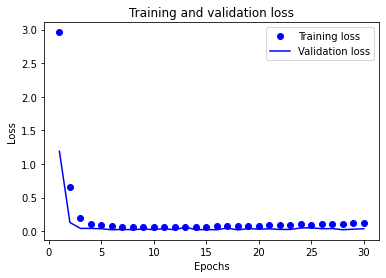

In [24]:
# plotting training and validation loss
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

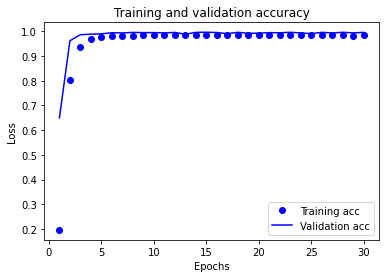

In [25]:
# Plotting training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
model_2.save("C:/Users/Francisco Duran/Desktop/upc/project_notebooks/github_project/DL_notebooks/models/tf_model_last_1c_")

#to save history see:
# https://stackoverflow.com/questions/49969006/save-and-load-keras-callbacks-history

INFO:tensorflow:Assets written to: C:/Users/Francisco Duran/Desktop/upc/project_notebooks/github_project/DL_notebooks/models/tf_model_last_1c_\assets


In [36]:
#cd "C:/Users/Francisco Duran/Desktop/upc/project_notebooks/CNN-in-mobile-device/data/raw/Original/final/val"
test_dir = "C:/Users/Francisco Duran/Desktop/upc/project_notebooks/CNN-in-mobile-device/data/raw/Original/final/val"

In [37]:
test_image_path = os.path.join(test_dir+'/00008/prefix_00015_00010.jpg')
test_handwritten = os.path.join("C:/Users/Francisco Duran/Desktop/upc/project_notebooks/handwritten_30_signal.jpg")

In [42]:

#test_image_path = os.path.join(test_dir+'/00001/prefix_00014_00029.jpg')

def visualize_image(image_path):
  test_image = keras.preprocessing.image.load_img(image_path, target_size = (img_height, img_width))
  plt.imshow(test_image)
  plt.title("Test image")
  plt.axis("off")
  plt.show()

def preproces_and_predict_image(image_path):
  test_image = keras.preprocessing.image.load_img(image_path, target_size = (img_height, img_width))
  image_array = keras.preprocessing.image.img_to_array(test_image)
  img_batch = tf.expand_dims(image_array, axis=0)
  predictions_list = model_2.predict(img_batch)
  prediction = np.argmax(predictions_list)
  print(prediction)
  plt.imshow(test_image)
  plt.title(prediction)
  plt.axis("off")
  plt.show()

  return predictions_list

In [52]:
test_image = keras.preprocessing.image.load_img(test_image_path, target_size = (img_height, img_width))
image_array = keras.preprocessing.image.img_to_array(test_image)
#img_batch = tf.expand_dims(image_array, axis=0)


In [54]:
#print(img_batch)
image_array = np.array(image_array)
image_array =image_array.reshape(-1, img_width, img_height, 1)
image_array= image_array.astype("float32")
image_array= (image_array/ 255.0) 
print(image_array)
"""
y2_test = np.array(y2_test)
x2_train = x2_train.reshape(-1, img_width, img_height, 1)
x2_test = x2_test.reshape(-1, img_width, img_height, 1)
x2_train = x2_train.astype("float32")
x2_test = x2_test.astype("float32")
x2_train = (x2_train / 255.0) 
x2_test = (x2_test / 255.0)

y2_train = np_utils.to_categorical(y2_train, 43)
y2_test = np_utils.to_categorical(y2_test, 43)
"""

[[[[3.0757402e-04]
   [9.2272203e-05]
   [3.5371011e-04]
   ...
   [3.9215689e-03]
   [3.7216456e-03]
   [3.5832373e-03]]

  [[3.8754325e-03]
   [3.9061899e-03]
   [3.8600538e-03]
   ...
   [1.9530950e-03]
   [1.8915802e-03]
   [1.7224145e-03]]

  [[3.4909651e-03]
   [2.9988466e-03]
   [2.6451366e-03]
   ...
   [0.0000000e+00]
   [2.7681663e-04]
   [4.7673972e-04]]

  ...

  [[2.3068051e-04]
   [1.0765091e-04]
   [4.3060363e-04]
   ...
   [6.6128414e-04]
   [3.2295272e-04]
   [1.2302962e-04]]

  [[1.1380239e-03]
   [5.0749717e-04]
   [5.9976935e-04]
   ...
   [2.6297579e-03]
   [1.5224913e-03]
   [1.5840061e-03]]

  [[2.0915035e-03]
   [1.1534026e-03]
   [1.1380239e-03]
   ...
   [2.3068051e-04]
   [2.3068051e-04]
   [2.6143793e-04]]]


 [[[2.4605924e-04]
   [1.9992310e-04]
   [3.6908881e-04]
   ...
   [1.3225683e-03]
   [6.9204153e-04]
   [6.6128414e-04]]

  [[2.3836987e-03]
   [1.2610535e-03]
   [1.5532487e-03]
   ...
   [2.5221070e-03]
   [9.6885813e-04]
   [1.0611304e-03]]

  [[2.4

'\ny2_test = np.array(y2_test)\nx2_train = x2_train.reshape(-1, img_width, img_height, 1)\nx2_test = x2_test.reshape(-1, img_width, img_height, 1)\nx2_train = x2_train.astype("float32")\nx2_test = x2_test.astype("float32")\nx2_train = (x2_train / 255.0) \nx2_test = (x2_test / 255.0)\n\ny2_train = np_utils.to_categorical(y2_train, 43)\ny2_test = np_utils.to_categorical(y2_test, 43)\n'

In [65]:
predictions_list = model_2.predict(image_array)
print(len(predictions_list[2]))

43


91


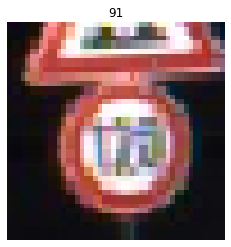

In [66]:
prediction = np.argmax(predictions_list)
print(prediction)
plt.imshow(test_image)
plt.title(prediction)
plt.axis("off")
plt.show()

In [43]:
from keras import preprocessing

predictions = preproces_and_predict_image(test_handwritten)
predictions = preproces_and_predict_image(test_image_path)

ValueError: in user code:

    C:\Users\Francisco Duran\anaconda3\lib\site-packages\keras\engine\training.py:1544 predict_function  *
        return step_function(self, iterator)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\keras\engine\training.py:1527 run_step  *
        outputs = model.predict_step(data)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\keras\engine\training.py:1500 predict_step  *
        return self(x, training=False)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\keras\engine\base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\keras\engine\input_spec.py:248 assert_input_compatibility  *
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape (None, 48, 48, 3)


In [ ]:
#################

In [125]:
layer_names = ["dense_1"]

In [67]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0

In [20]:
model_2.layers[-2].name

'dropout_4'

In [129]:
model_2.save("C:/Users/Francisco Duran/Desktop/upc/project_notebooks/github_project/DL_notebooks/models/tf_model_paco")


INFO:tensorflow:Assets written to: C:/Users/Francisco Duran/Desktop/upc/project_notebooks/github_project/DL_notebooks/models/tf_model_paco\assets


In [72]:
pwd

'C:\\Users\\Francisco Duran\\Desktop\\upc\\project_notebooks\\CNN-in-mobile-device\\data\\raw\\Original\\final\\val'

In [73]:
cd "C:/Users/Francisco Duran/Desktop/upc/project_notebooks/sadl"

C:\Users\Francisco Duran\Desktop\upc\project_notebooks\sadl


In [92]:
print(len(x2_val))
print(x2_val[0].shape)
print(x2_train[0].shape)

3919
(48, 48, 1)
(48, 48, 1)


In [95]:
# Next steps
layer_names = ['dense_1']

args = argparse.Namespace(batch_size=128, d='mine',
                          dsa=False, is_classification=True,
                          lsa=True, n_bucket=1000, num_classes=43, 
                          save_path='./tmp/', target='test', upper_bound=2000, var_threshold=1e-05)


test_lsa = fetch_lsa(model_2, x2_train, x2_val, "test", layer_names, args)
#target_lsa = fetch_lsa(model, x_train, x_target, args.target, layer_names, args)
"""
target_cov = get_sc(
    np.amin(target_lsa), args.upper_bound, args.n_bucket, target_lsa
)"""

#auc = compute_roc_auc(test_lsa, target_lsa)
#print(infog("ROC-AUC: " + str(auc * 100)))

[train] Model serving
246/246 [==============================] - 43s 175ms/step
[train] Processing ATs
Layer: dense_1
train ATs is saved at ./tmp/mine_train_dense_1_ats.npy
[test] Model serving
31/31 [==============================] - 6s 168ms/step
[test] Processing ATs
Layer: dense_1
test ATs is saved at ./tmp/mine_test_dense_1_ats.npy


 11%|████████▊                                                                    | 450/3919 [00:00<00:00, 4467.37it/s]

The number of removed columns: 249
[test] Fetching LSA


100%|████████████████████████████████████████████████████████████████████████████| 3919/3919 [00:00<00:00, 5239.88it/s]


'\ntarget_cov = get_sc(\n    np.amin(target_lsa), args.upper_bound, args.n_bucket, target_lsa\n)'

In [97]:
len(test_lsa)

3919

In [98]:
args = argparse.Namespace(batch_size=128, d='mine',
                          dsa=True, is_classification=True,
                          lsa=False, n_bucket=1000, num_classes=43, 
                          save_path='./tmp/', target='test', upper_bound=2000, var_threshold=1e-05)

test_dsa = fetch_dsa(model_2, x2_train, x2_val, "test", layer_names, args)

  0%|                                                                                 | 3/3919 [00:00<02:16, 28.64it/s]

Found saved train ATs, skip serving
Found saved test ATs, skip serving
[test] Fetching DSA


100%|██████████████████████████████████████████████████████████████████████████████| 3919/3919 [02:37<00:00, 24.89it/s]


In [113]:
len(test_dsa)
test_dsa
more_dsa = np.argmax(test_dsa)
more_dsa

3116

In [101]:
a = model_2.predict(x2_val)

In [103]:
len(a)

3919

In [114]:
a[0].

SyntaxError: invalid syntax (<ipython-input-114-459cc9957320>, line 1)

In [117]:
prediction = np.argmax(a[100])
prediction

1

In [118]:
y2_val[100]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)